In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from bosonStar import *
from util import *

from ctypes import *
file = "./testing.so"
my_func = CDLL(file)

#Middle
massInCU = 2e-77
aInCU = 1e-73
totalMassInCU = 0.1
#dtInCU = 1000.0
#bigT = 100000
dtInCU = 2500.0
bigT = 10000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


A2=  -0.3197640202007044  X= 20.65212130424261
A2=  -0.4847073570464445  X= 20.0997201994404
A2=  -0.4996237064856289  X= 40.0
A2=  -0.5019378672755319  X= 16.740033480066963
A2=  -0.5018381151828868  X= 18.401316802633605
A2=  -0.5018730652697496  X= 15.347950695901392
A2=  -0.5019295973148135  X= 22.058364116728235
A2=  -0.5019295973148135  X= 22.058364116728235
MU= 0.3181619365115217 MASS= 0.09999012221832808
FAR POINT: 156400 500000


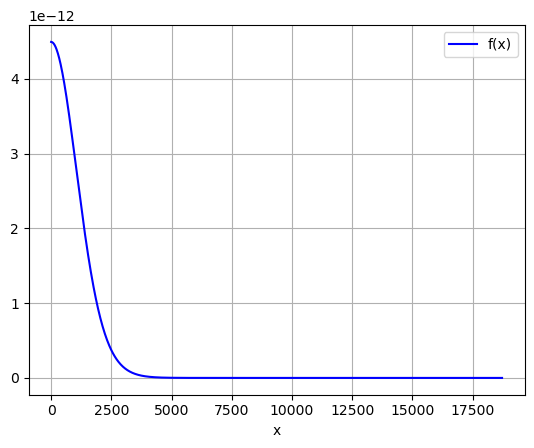

(1000,)


In [2]:
bosonStar = outputProfile(massInCU, aInCU, totalMassInCU, 500)
x = bosonStar["x"]
psi = bosonStar["profile"]

dx = x[1]-x[0]
for i in range(500):
    x = np.append(x, x[-1]+dx)
    psi = np.append(psi, psi[-1])

print(x.shape)

In [3]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 3.8684718785837514e+40
Omega: 3.656129092998465e-43
Epsilon (Should be 1): 1.0000000000000002
Delta: 14.839459489461666
New G: 1.180886665279879


In [4]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
normalization = scipy.integrate.simpson(4.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x=x)
psi = psi/normalization
psi = psi.astype(complex)

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA
dx = x[1]-x[0]

print(psi)
print("DT:", dt)
print("DX:", dx)

[5.83973278e-02+0.j 5.83608193e-02+0.j 5.82878809e-02+0.j
 5.81786701e-02+0.j 5.80334220e-02+0.j 5.78524489e-02+0.j
 5.76361390e-02+0.j 5.73849547e-02+0.j 5.70994308e-02+0.j
 5.67801731e-02+0.j 5.64278553e-02+0.j 5.60432170e-02+0.j
 5.56270607e-02+0.j 5.51802488e-02+0.j 5.47037006e-02+0.j
 5.41983885e-02+0.j 5.36653348e-02+0.j 5.31056077e-02+0.j
 5.25203178e-02+0.j 5.19106136e-02+0.j 5.12776778e-02+0.j
 5.06227230e-02+0.j 4.99469874e-02+0.j 4.92517308e-02+0.j
 4.85382301e-02+0.j 4.78077752e-02+0.j 4.70616646e-02+0.j
 4.63012016e-02+0.j 4.55276897e-02+0.j 4.47424291e-02+0.j
 4.39467125e-02+0.j 4.31418217e-02+0.j 4.23290234e-02+0.j
 4.15095664e-02+0.j 4.06846779e-02+0.j 3.98555608e-02+0.j
 3.90233903e-02+0.j 3.81893119e-02+0.j 3.73544384e-02+0.j
 3.65198479e-02+0.j 3.56865817e-02+0.j 3.48556428e-02+0.j
 3.40279940e-02+0.j 3.32045567e-02+0.j 3.23862100e-02+0.j
 3.15737893e-02+0.j 3.07680864e-02+0.j 2.99698484e-02+0.j
 2.91797778e-02+0.j 2.83985321e-02+0.j 2.76267244e-02+0.j
 2.68649234e-0

In [5]:
T = np.zeros((size,size)).astype(complex)
TSph = np.zeros((size,size)).astype(complex)
Q = np.zeros((size,size)).astype(complex)
V2Grav = np.zeros((size,size)).astype(complex)
I = np.identity(size).astype(complex)
phi = np.zeros((size))

In [6]:
def setupT():
    global T, TSph
    for i in range(size):
        if i==0:
            T[i][i] = (-49.0/18.0 + 3.0/2.0)*3
            T[i][i+1] = (3.0/2.0 - 3.0/20.0)*3
            T[i][i+2] = (-3.0/20.0 + 1.0/90.0)*3
            T[i][i+3] = (1.0/90.0)*3
        elif i==1:
            T[i][i-1] = (3.0/2.0 - 3.0/20.0)*3
            T[i][i] = (-49.0/18.0 + 1.0/90.0)*3
            T[i][i+1] = (3.0/2.0)*3
            T[i][i+2] = (-3.0/20.0)*3
            T[i][i+3] = (1.0/90.0)*3
        elif i==2:
            T[i][i-2] = -3.0/20.0 + 1.0/90.0
            T[i][i-1] = 3.0/2.0
            T[i][i] = -49.0/18.0
            T[i][i+1] = 3.0/2.0
            T[i][i+2] = -3.0/20.0
            T[i][i+3] = 1.0/90.0
            TSph[i][i-2] = 1.0/12.0/x[i]
            TSph[i][i-1] = -2.0/3.0/x[i]
            TSph[i][i+1] = 2.0/3.0/x[i]
            TSph[i][i+2] = -1.0/12.0/x[i]
        elif i==size-1:
            T[i][i-3] = 1.0/90.0
            T[i][i-2] = -3.0/20.0
            T[i][i-1] = 3.0/2.0
            T[i][i] = -49.0/18.0 + 3.0/2.0 - 3.0/20.0 + 1.0/90.0
            #TSph[i][i-1] = -1.0/2.0/x[i]
            #TSph[i][i] = 1.0/2.0/x[i]
            TSph[i][i-2] = 1.0/12.0/x[i]
            TSph[i][i-1] = -2.0/3.0/x[i]
            TSph[i][i] = (2.0/3.0 - 1.0/12.0)/x[i]
        elif i==size-2:
            T[i][i-3] = 1.0/90.0
            T[i][i-2] = -3.0/20.0
            T[i][i-1] = 3.0/2.0
            T[i][i] = -49.0/18.0
            T[i][i+1] = 3.0/2.0 - 3.0/20.0 + 1.0/90.0
            #TSph[i][i+1] = 1.0/2.0/x[i]
            #TSph[i][i-1] = -1.0/2.0/x[i]
            TSph[i][i-2] = 1.0/12.0/x[i]
            TSph[i][i-1] = -2.0/3.0/x[i]
            TSph[i][i+1] = (2.0/3.0 - 1.0/12.0)/x[i]
        elif i==size-3:
            T[i][i-3] = 1.0/90.0
            T[i][i-2] = -3.0/20.0
            T[i][i-1] = 3.0/2.0
            T[i][i] = -49.0/18.0
            T[i][i+1] = 3.0/2.0
            T[i][i+2] = -3.0/20.0 + 1.0/90.0
            TSph[i][i-2] = 1.0/12.0/x[i]
            TSph[i][i-1] = -2.0/3.0/x[i]
            TSph[i][i+1] = 2.0/3.0/x[i]
            TSph[i][i+2] = -1.0/12.0/x[i]
        else:
            T[i][i-3] = 1.0/90.0
            T[i][i-2] = -3.0/20.0
            T[i][i-1] = 3.0/2.0
            T[i][i] = -49.0/18.0
            T[i][i+1] = 3.0/2.0
            T[i][i+2] = -3.0/20.0
            T[i][i+3] = 1.0/90.0
            #TSph[i][i+1] = 1.0/2.0/x[i]
            #TSph[i][i-1] = -1.0/2.0/x[i]
            TSph[i][i-2] = 1.0/12.0/x[i]
            TSph[i][i-1] = -2.0/3.0/x[i]
            TSph[i][i+1] = 2.0/3.0/x[i]
            TSph[i][i+2] = -1.0/12.0/x[i]

    T = -1.0/2.0/dx/dx*T
    TSph = -1.0/dx*TSph

def setupQ():
    global Q
    for i in range(size):
        Q[i][i] = delta*np.absolute(psi[i])*np.absolute(psi[i])

def setupV2Grav():
    global V2Grav, phi, psi

    rho = np.absolute(psi)*np.absolute(psi)
    rho_c = (c_double * size)(*rho)
    phi_c = (c_double * size)(*np.absolute(phi))
    my_func.findGravRho(rho_c, phi_c, c_int(size), c_double(dx))
    for i in range(size):
        phi[i] = phi_c[i] * GM

    for i in range(size):
        V2Grav[i][i] = phi[i]

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0*(T+TSph+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0*(T+TSph+Q+V2Grav)

0 0.0 0.05839845253641788 1.0001279761573232


/tmp/ipykernel_201191/2420221537.py:72: RuntimeWarning: divide by zero encountered in divide
  quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)
/tmp/ipykernel_201191/2420221537.py:72: RuntimeWarning: invalid value encountered in divide
  quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)
/tmp/ipykernel_201191/2420221537.py:74: RuntimeWarning: invalid value encountered in divide
  plt.plot(x*Ra*1.616e-35*100*6.77193e-6, pressureGradients/rhoTemp)
/home/kklee/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/home/kklee/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f

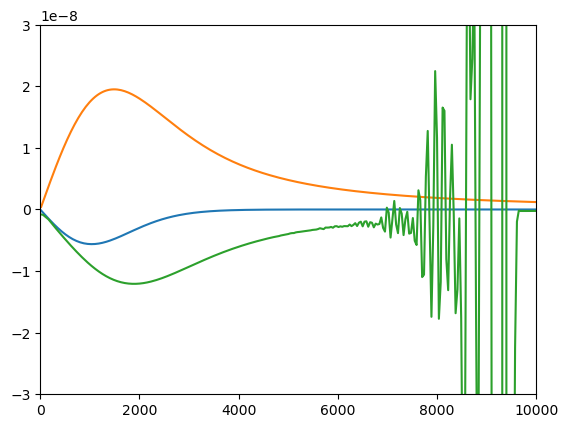

1 0.08351027137908527 0.05840155467544307 1.000127975761962
2 0.16702054275817055 0.05840666878655551 1.0001279757659671
3 0.2505308141372558 0.05841390233034782 1.0001279751933225
4 0.3340410855163411 0.05842309505766235 1.0001279749680307
5 0.4175513568954264 0.05843436977688916 1.0001279742520692
6 0.5010616282745116 0.058447600712280126 1.000127973782564
7 0.5845718996535969 0.058462844833912085 1.000127972934911
8 0.6680821710326822 0.05848002680258079 1.000127972221473
9 0.7515924424117675 0.0584991548346071 1.0001279712467201
10 0.8351027137908528 0.05852017736650923 1.0001279702966164
11 0.9186129851699381 0.05854308151173441 1.0001279691967613
12 1.0021232565490232 0.05856781936859456 1.0001279680196111
13 1.0856335279281086 0.05859437166384141 1.0001279667965033
14 1.1691437993071938 0.05862268773512206 1.0001279654037378
15 1.2526540706862792 0.058652745992173044 1.000127964057471
16 1.3361643420653644 0.05868449178514101 1.000127962463932
17 1.4196746134444496 0.05871790171

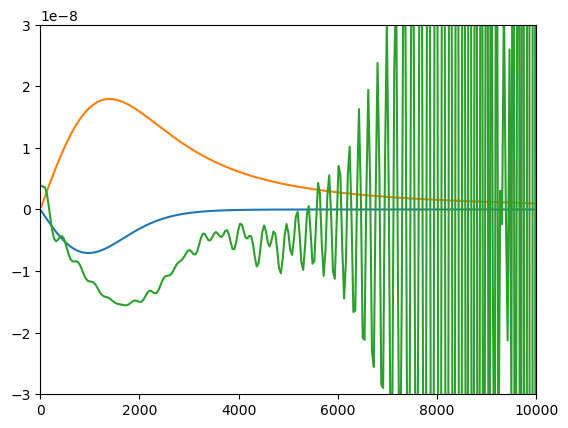

101 8.434537409287612 0.06336444032867629 1.0001277374228277
102 8.518047680666697 0.06338269371787897 1.000127736592185
103 8.601557952045784 0.06339196974791395 1.000127737977181
104 8.685068223424869 0.06341451838121667 1.0001277357321599
105 8.768578494803954 0.0634345425517294 1.000127733967892
106 8.852088766183039 0.06344336976850606 1.0001277356312666
107 8.935599037562124 0.06346398332960615 1.0001277335882424
108 9.019109308941209 0.0634847924811523 1.0001277315661667
109 9.102619580320296 0.0634930024478491 1.0001277330642184
110 9.18612985169938 0.06351111527543551 1.000127731519941
111 9.269640123078466 0.06353079029601304 1.0001277292488686
112 9.35315039445755 0.06353704933205089 1.0001277308852397
113 9.436660665836635 0.06355183668388391 1.000127729617929
114 9.52017093721572 0.06356859452826735 1.000127727453967
115 9.603681208594807 0.06357175681607455 1.0001277292583453
116 9.687191479973892 0.06358285662926201 1.000127728191387
117 9.770701751352977 0.0635958161508

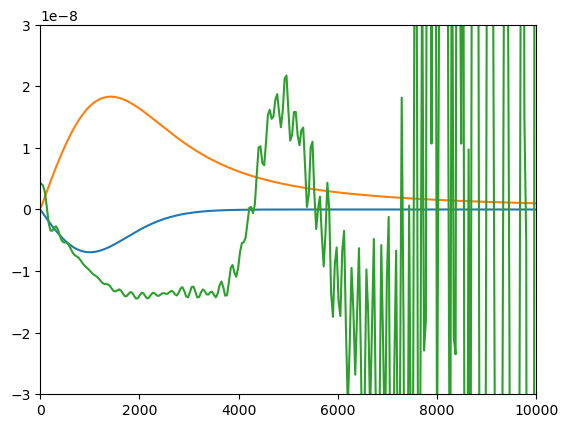

201 16.78556454719614 0.06334917123342812 1.0001277415705634
202 16.869074818575225 0.06333741486157113 1.0001277447448584
203 16.95258508995431 0.06333592928387327 1.0001277428125466
204 17.036095361333395 0.06332893376042119 1.000127743821028
205 17.11960563271248 0.06332012195836768 1.0001277451455428
206 17.203115904091568 0.06331939073821763 1.0001277432457356
207 17.28662617547065 0.06330755890407465 1.0001277459138616
208 17.370136446849738 0.06330484083572958 1.0001277448154116
209 17.45364671822882 0.06329852445443394 1.0001277449329469
210 17.537156989607908 0.06328851537078176 1.0001277470643068
211 17.62066726098699 0.06328756106572211 1.0001277446707397
212 17.704177532366078 0.06327562350650386 1.000127747576068
213 17.787687803745165 0.06327171321556332 1.0001277464990106
214 17.871198075124248 0.06326559115143872 1.000127746569559
215 17.954708346503335 0.06325463669826041 1.000127748738914
216 18.038218617882418 0.0632531372731207 1.0001277464780465
217 18.121728889261

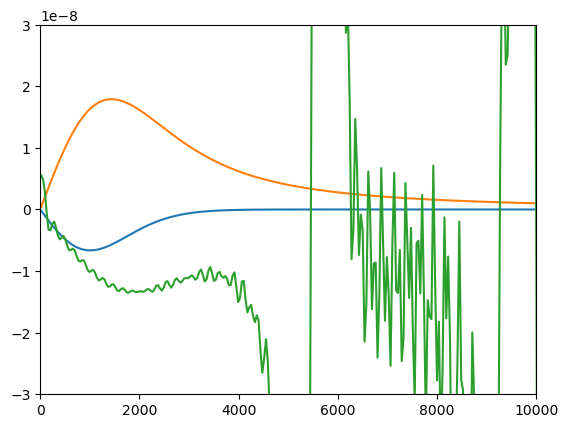

301 25.13659168510467 0.06230714518099273 1.0001277945201252
302 25.220101956483752 0.0622941709721074 1.0001277940834448
303 25.30361222786284 0.06227795260563633 1.0001277970404865
304 25.387122499241922 0.06226816746773563 1.000127794573583
305 25.47063277062101 0.06225020786152001 1.0001277986419777
306 25.554143042000092 0.06223993490640474 1.000127796218777
307 25.63765331337918 0.06222416395536199 1.0001277991589674
308 25.721163584758266 0.062210185133621976 1.0001277986553816
309 25.80467385613735 0.06219832250976801 1.0001277993931108
310 25.888184127516435 0.06218079953333409 1.0001278008486363
311 25.97169439889552 0.062170867065139815 1.000127800347597
312 26.055204670274605 0.06215307140749997 1.000127802078473
313 26.138714941653692 0.06214130878762989 1.0001278022993092
314 26.222225213032775 0.06212656641915941 1.0001278025615894
315 26.305735484411862 0.062110860426042254 1.0001278045961914
316 26.389245755790945 0.06209958036133252 1.0001278032273815
317 26.472756027

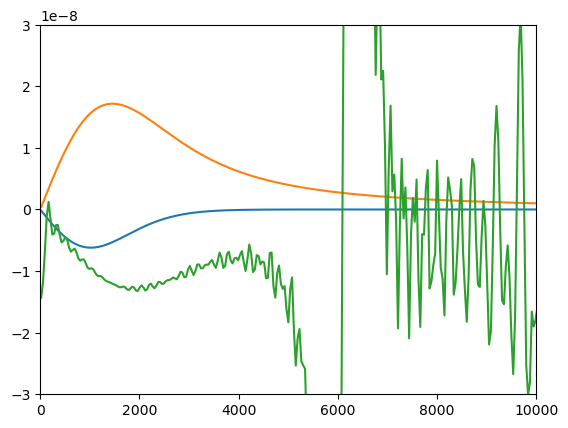

401 33.48761882301319 0.06062394959382844 1.0001278770665265
402 33.57112909439228 0.06060631649516788 1.000127872856428
403 33.65463936577137 0.060583836954077576 1.0001278781113534
404 33.73814963715045 0.0605639992302965 1.0001278759229153
405 33.82165990852953 0.060543898197724426 1.0001278787885464
406 33.90517017990862 0.06052139942637219 1.0001278791116437
407 33.988680451287706 0.06050328647434125 1.0001278796397925
408 34.07219072266679 0.060479294655361567 1.0001278819163597
409 34.15570099404588 0.060461436135437835 1.000127881044829
410 34.23921126542496 0.06043796214947154 1.000127884128762
411 34.322721536804046 0.06041841397547376 1.0001278830157736
412 34.406231808183136 0.060397022317024866 1.0001278859279645
413 34.48974207956222 0.06037485931933134 1.0001278852132156
414 34.5732523509413 0.06035570022739106 1.0001278877555666
415 34.656762622320386 0.06033156875763712 1.0001278871847123
416 34.740272893699476 0.06031332325424873 1.0001278899866877
417 34.823783165078

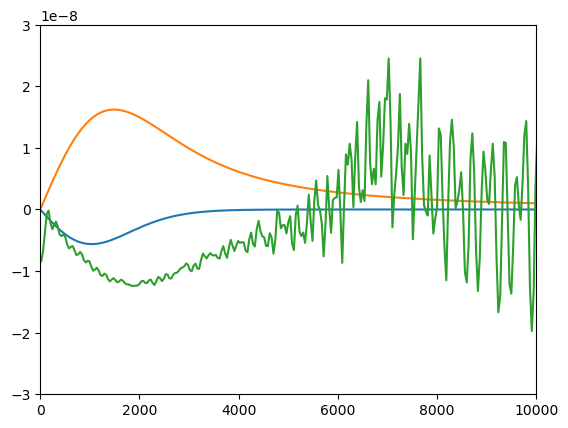

501 41.838645960921724 0.05833959812927275 1.0001279811483688
502 41.92215623230081 0.05831514988442251 1.0001279791252808
503 42.00566650367989 0.05828949167258316 1.000127982889307
504 42.08917677505898 0.05826592444490334 1.0001279825767013
505 42.172687046438064 0.05824503137556459 1.000127983103896
506 42.25619731781715 0.058213926514966666 1.0001279858979089
507 42.33970758919624 0.05818498037298894 1.0001279860472505
508 42.42321786057532 0.05815873528632224 1.0001279897059374
509 42.506728131954404 0.05814184049462672 1.0001279867701347
510 42.59023840333349 0.058119826017357365 1.0001279909646872
511 42.67374867471258 0.05809412122190775 1.0001279889132402
512 42.75725894609166 0.05807121207330104 1.0001279938385377
513 42.84076921747074 0.05804966740792046 1.0001279902271198
514 42.924279488849834 0.05802707251230849 1.000127995332073
515 43.00778976022892 0.05799386158547044 1.0001279930201574
516 43.091300031608 0.057966767750465865 1.0001279994777301
517 43.17481030298708 

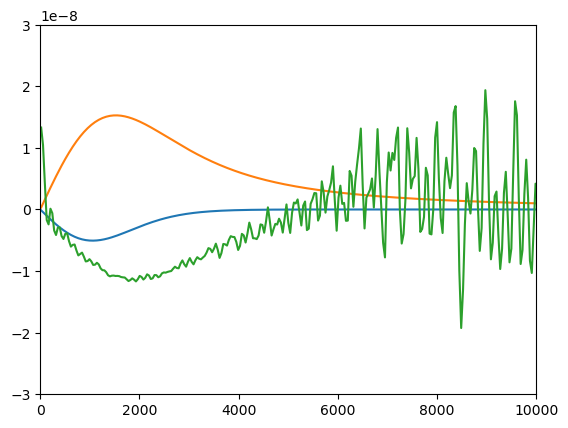

601 50.18967309883025 0.05599893025947518 1.0001280841484657
602 50.27318337020934 0.05597514016518199 1.0001280824703895
603 50.35669364158842 0.055948204473996 1.0001280869236218
604 50.440203912967505 0.055925375071531544 1.0001280858984245
605 50.52371418434659 0.0559078958113902 1.000128087870495
606 50.60722445572568 0.05589279020928259 1.0001280874954563
607 50.69073472710476 0.055879024532496616 1.0001280878504728
608 50.774244998483844 0.05586249702602472 1.0001280881141263
609 50.857755269862935 0.05582821403801825 1.0001280898120863
610 50.94126554124202 0.05579677674040554 1.0001280940338908
611 51.0247758126211 0.05577696324023678 1.0001280918173534
612 51.108286084000184 0.055766812907813365 1.0001280945671513
613 51.191796355379275 0.05574668204318199 1.0001280913006894
614 51.27530662675836 0.05572326376146868 1.0001280977673954
615 51.35881689813744 0.055698470539183406 1.0001280928815965
616 51.44232716951653 0.05567183087424507 1.0001281013293661
617 51.5258374408956

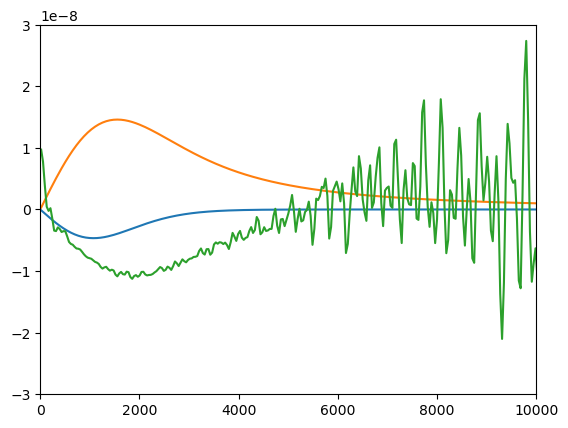

701 58.54070023673878 0.05423441625180333 1.0001281611251795
702 58.62421050811786 0.05422403435214203 1.0001281565687636
703 58.707720779496945 0.054211761124540944 1.0001281612413024
704 58.791231050876036 0.054198392455616466 1.0001281588383393
705 58.87474132225512 0.054191654412622914 1.0001281611320834
706 58.9582515936342 0.05418197320388529 1.000128159797485
707 59.04176186501329 0.054173896025789335 1.0001281609965276
708 59.125272136392375 0.054161310729188276 1.000128161056522
709 59.20878240777146 0.054147095485843275 1.000128162070162
710 59.29229267915054 0.054138160485930426 1.0001281626953271
711 59.37580295052963 0.054126259770776855 1.0001281615252549
712 59.459313221908715 0.054108606319105315 1.0001281651548266
713 59.5428234932878 0.054095190120780484 1.0001281632784553
714 59.62633376466689 0.05409162846254362 1.0001281654395429
715 59.70984403604597 0.054076140443090344 1.0001281628219136
716 59.793354307425055 0.05406210729181103 1.0001281686645278
717 59.876864

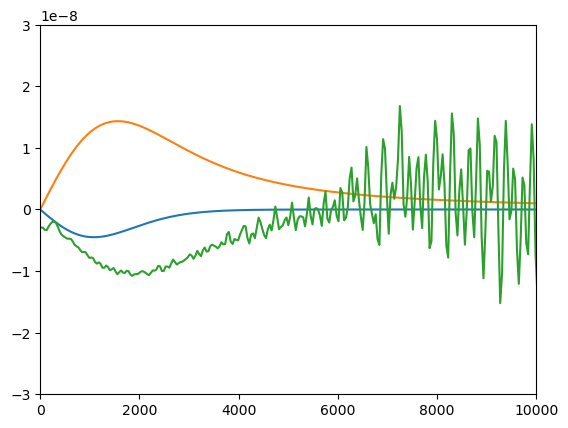

801 66.8917273746473 0.053572221542654244 1.0001281885686317
802 66.97523764602639 0.05356793152347914 1.0001281834732536
803 67.05874791740547 0.05357160892907765 1.000128188744575
804 67.14225818878457 0.05357494296669064 1.0001281822013197
805 67.22576846016365 0.05356778917561627 1.000128189169291
806 67.30927873154273 0.05356923029777793 1.0001281836931286
807 67.39278900292182 0.05357028379531917 1.0001281876232075
808 67.4762992743009 0.053567226864967975 1.000128184648989
809 67.55980954567998 0.05356508908306305 1.0001281877271224
810 67.64331981705907 0.05356779946935169 1.0001281851434969
811 67.72683008843816 0.053567348202744315 1.000128186563598
812 67.81034035981725 0.053567706372255455 1.000128186314502
813 67.89385063119633 0.05356919270803223 1.000128185538889
814 67.97736090257541 0.05357153515944313 1.000128187059004
815 68.0608711739545 0.05357515709410372 1.0001281840304552
816 68.14438144533358 0.05357353323354497 1.0001281879821011
817 68.22789171671266 0.053577

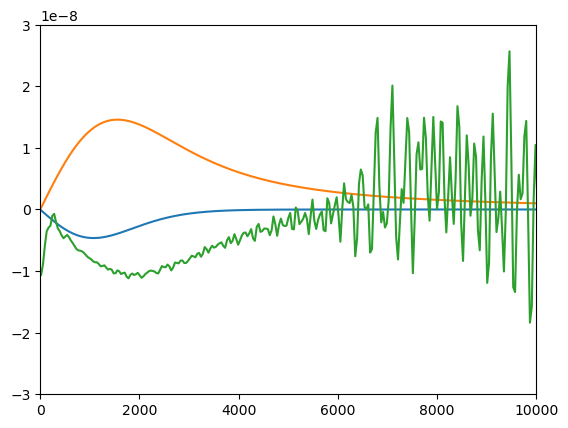

901 75.24275451255583 0.054205569868768406 1.0001281627043157
902 75.32626478393492 0.0542190903580366 1.0001281560302993
903 75.409775055314 0.054236819684327885 1.0001281605063495
904 75.49328532669308 0.05424713444596364 1.0001281546834297
905 75.57679559807217 0.05425928544189417 1.0001281605548664
906 75.66030586945126 0.054279379019956754 1.0001281525770604
907 75.74381614083035 0.054288821021286966 1.0001281586752577
908 75.82732641220943 0.05430249771699128 1.0001281529957537
909 75.91083668358851 0.054320373253769365 1.0001281559085022
910 75.9943469549676 0.05433163218762426 1.000128152136526
911 76.07785722634668 0.05434435035491682 1.0001281550812113
912 76.16136749772576 0.05436096987919878 1.0001281511359517
913 76.24487776910486 0.05437355782649322 1.000128152847219
914 76.32838804048394 0.05438588147071608 1.0001281514033118
915 76.41189831186303 0.0544022896118928 1.0001281506730206
916 76.49540858324211 0.054415410504733995 1.0001281507877344
917 76.5789188546212 0.05

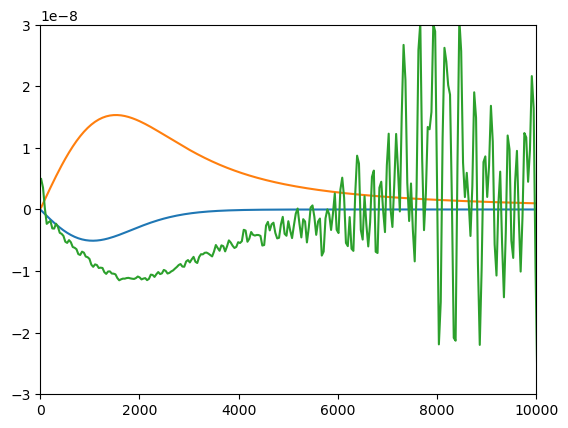

1001 83.59378165046436 0.05613033231090053 1.0001280760866036
1002 83.67729192184345 0.05615702286514998 1.0001280703431057
1003 83.76080219322253 0.05618346594339012 1.0001280736896505
1004 83.84431246460161 0.05621150757918669 1.0001280672560144
1005 83.9278227359807 0.05623672408705253 1.0001280708636358
1006 84.01133300735978 0.05625563417628605 1.0001280652733695
1007 84.09484327873886 0.05627297925838896 1.0001280704652757
1008 84.17835355011796 0.05629753630168045 1.0001280639745385
1009 84.26186382149704 0.056327825085863086 1.000128067461056
1010 84.34537409287613 0.0563586187174308 1.0001280602002345
1011 84.42888436425521 0.056380907713017694 1.0001280645365267
1012 84.5123946356343 0.05640092158016364 1.0001280590101453
1013 84.59590490701338 0.0564164977156996 1.0001280632805631
1014 84.67941517839247 0.05644200213803632 1.000128058525553
1015 84.76292544977156 0.05647819327674634 1.000128058442779
1016 84.84643572115064 0.05650752163321006 1.0001280546048443
1017 84.92994

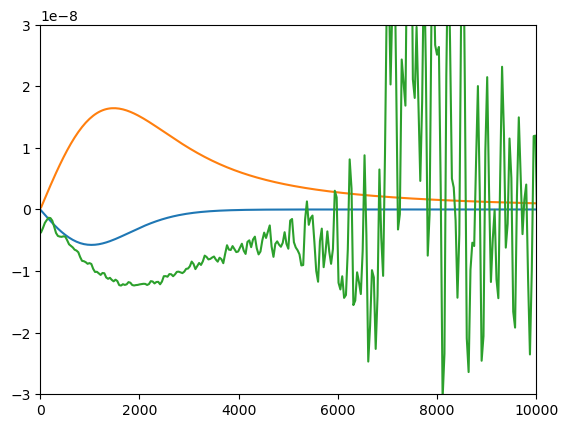

1101 91.94480878837288 0.05891332165125638 1.0001279344653105
1102 92.02831905975198 0.058942116944462844 1.000127931148107
1103 92.11182933113106 0.05897389905457054 1.000127930903633
1104 92.19533960251015 0.058999257786273206 1.0001279276835562
1105 92.27884987388923 0.05902855909785131 1.000127928991127
1106 92.36236014526831 0.05906307829121172 1.0001279233037654
1107 92.4458704166474 0.05909705733365955 1.0001279248486508
1108 92.52938068802648 0.059124618661561594 1.0001279199214876
1109 92.61289095940558 0.059152874661917855 1.0001279224332316
1110 92.69640123078466 0.05918374693223877 1.0001279166234274
1111 92.77991150216374 0.059213393594746346 1.000127918792832
1112 92.86342177354283 0.05923747273273373 1.00012791404779
1113 92.94693204492191 0.05926502534698259 1.0001279163755061
1114 93.03044231630099 0.05929336034093783 1.0001279110847805
1115 93.11395258768007 0.05932637455014766 1.0001279128736362
1116 93.19746285905917 0.05935822172199755 1.0001279065385023
1117 93.28

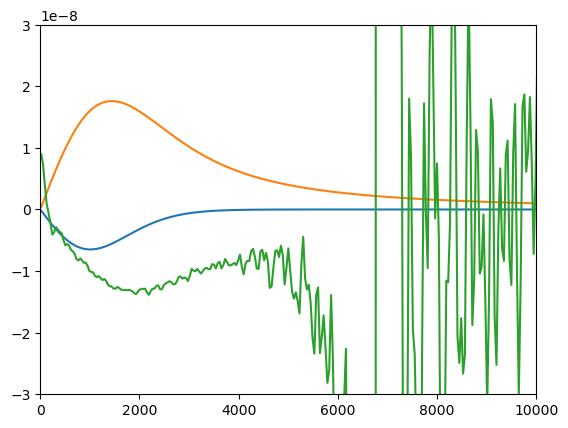

1201 100.29583592628141 0.06172752946311394 1.0001277660998766
1202 100.3793461976605 0.06175188339361623 1.0001277647071325
1203 100.46285646903958 0.06177511863649283 1.000127764438304
1204 100.54636674041868 0.06180983352742116 1.000127759452103
1205 100.62987701179776 0.06183585911061496 1.0001277589435424
1206 100.71338728317684 0.0618569015769576 1.0001277567183586
1207 100.79689755455593 0.061882593094954884 1.0001277560024937
1208 100.88040782593501 0.061905570893420345 1.0001277520050555
1209 100.96391809731409 0.061927341462179764 1.000127753289244
1210 101.04742836869318 0.06194453895603668 1.0001277486991225
1211 101.13093864007227 0.06195988509028197 1.0001277525980712
1212 101.21444891145136 0.06199076357475983 1.000127745013499
1213 101.29795918283044 0.0620162625590738 1.0001277472190282
1214 101.38146945420952 0.062033303631359456 1.0001277428454034
1215 101.4649797255886 0.06205400873395229 1.000127745353628
1216 101.54848999696769 0.06207999621641524 1.0001277394265


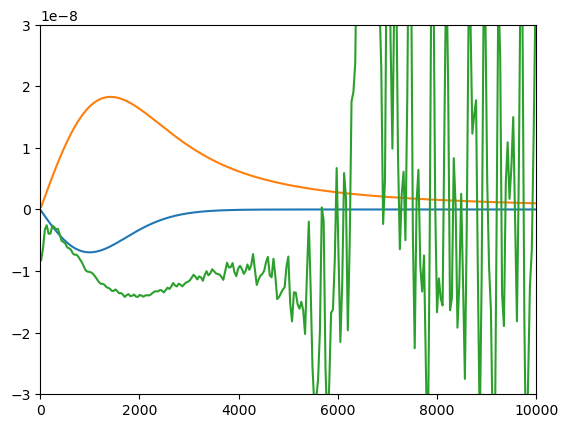

1301 108.64686306418994 0.06337349847153881 1.0001276298542403
1302 108.73037333556903 0.0633787966201775 1.0001276308495075
1303 108.81388360694811 0.06338728425498381 1.0001276276379507
1304 108.8973938783272 0.0633905108208544 1.000127627488465
1305 108.98090414970628 0.06339098479556025 1.0001276261988064
1306 109.06441442108537 0.06339458290679917 1.0001276250195965
1307 109.14792469246446 0.06339645990280324 1.0001276255789793
1308 109.23143496384354 0.06340405806608934 1.0001276225235258
1309 109.31494523522262 0.06340804543381719 1.000127623142224
1310 109.3984555066017 0.06341405371758052 1.000127620825026
1311 109.48196577798079 0.06342435308204396 1.0001276203363432
1312 109.56547604935987 0.06342991909823041 1.0001276177236877
1313 109.64898632073897 0.06343965067017646 1.0001276179209864
1314 109.73249659211805 0.063443990911949 1.0001276137169346
1315 109.81600686349714 0.06344405674952378 1.0001276170908864
1316 109.89951713487622 0.06345431558282237 1.0001276121695217
1

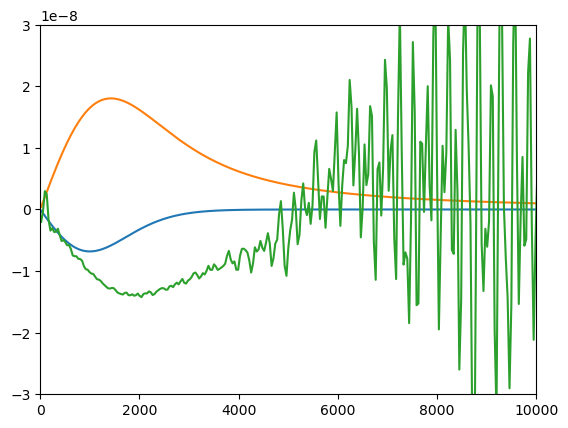

1401 116.99789020209847 0.0628022129124076 1.0001275826089542
1402 117.08140047347756 0.06278162825355157 1.0001275865103179
1403 117.16491074485664 0.06276107892671823 1.0001275842680175
1404 117.24842101623572 0.06273982037838817 1.000127585679916
1405 117.33193128761481 0.06271826222934929 1.0001275846713518
1406 117.41544155899389 0.06270643070339343 1.0001275838079118
1407 117.49895183037297 0.06268411848722964 1.00012758450837
1408 117.58246210175207 0.06266477933227746 1.0001275864099468
1409 117.66597237313115 0.06265216583722104 1.0001275837656831
1410 117.74948264451024 0.06262878566746834 1.000127585056928
1411 117.83299291588932 0.06261111754135404 1.0001275840819919
1412 117.9165031872684 0.06259053205318464 1.000127583240329
1413 118.00001345864749 0.06256640718547457 1.000127585249456
1414 118.08352373002658 0.06254832203680855 1.000127583049282
1415 118.16703400140567 0.06252329129906391 1.00012758564052
1416 118.25054427278475 0.0624990452644971 1.000127583454758
1417 

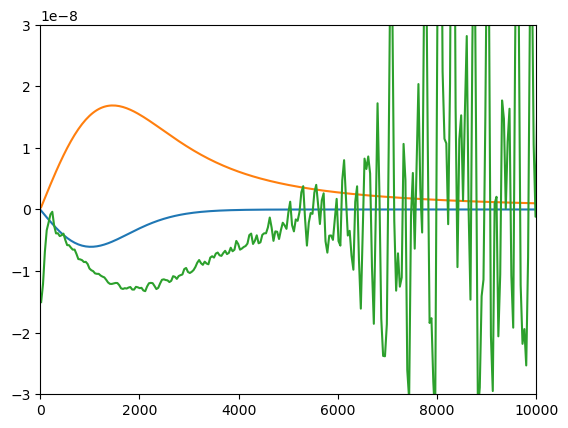

1501 125.34891734000699 0.060004118805391825 1.0001276256095342
1502 125.43242761138607 0.05997313022900724 1.0001276277849538
1503 125.51593788276517 0.059941060312906365 1.000127624836912
1504 125.59944815414426 0.059899345323322854 1.0001276302896895
1505 125.68295842552334 0.05987003838284525 1.0001276254627345
1506 125.76646869690242 0.05983763240735611 1.0001276272569448
1507 125.8499789682815 0.05979856420212473 1.0001276268592723
1508 125.93348923966059 0.05976526333277025 1.0001276279119415
1509 126.01699951103969 0.05973081099012757 1.0001276273240418
1510 126.10050978241877 0.05969492507638898 1.000127628264509
1511 126.18402005379785 0.0596537265734661 1.0001276302846822
1512 126.26753032517693 0.05961788973462753 1.0001276321993027
1513 126.35104059655602 0.059583644441691556 1.0001276314368346
1514 126.4345508679351 0.05953720751699273 1.0001276344423435
1515 126.51806113931418 0.059501385088002436 1.0001276345893166
1516 126.60157141069328 0.05946673675274162 1.000127634

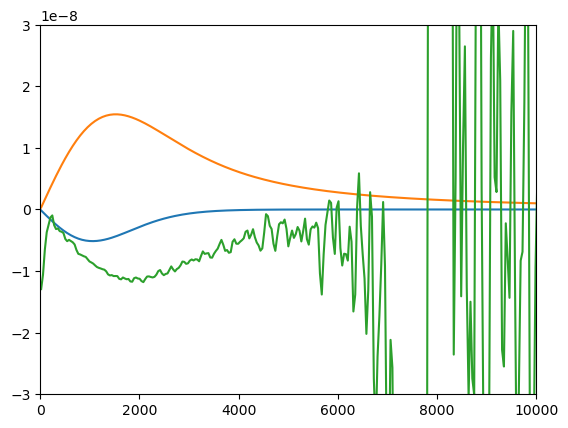

1601 133.69994447791552 0.056330610188563904 1.0001276904504877
1602 133.7834547492946 0.05629021530694609 1.0001276949026403
1603 133.8669650206737 0.05626492987327491 1.0001276898196299
1604 133.95047529205277 0.056231581999810355 1.0001276930882226
1605 134.03398556343186 0.05619584949644798 1.0001276918205209
1606 134.11749583481094 0.05616597461365296 1.000127693809613
1607 134.20100610619002 0.05613815004821888 1.0001276908701098
1608 134.28451637756913 0.05610706140802547 1.0001276926779767
1609 134.36802664894822 0.056068938936999324 1.0001276930335101
1610 134.4515369203273 0.056038498257153554 1.0001276940642716
1611 134.53504719170638 0.05600406226614372 1.0001276928772351
1612 134.61855746308547 0.05597286442233731 1.0001276959842897
1613 134.70206773446455 0.05595018568609892 1.0001276934754069
1614 134.78557800584363 0.05591450316629496 1.000127696405358
1615 134.86908827722272 0.05587872683955496 1.0001276963822288
1616 134.9525985486018 0.05585041637401626 1.00012769680

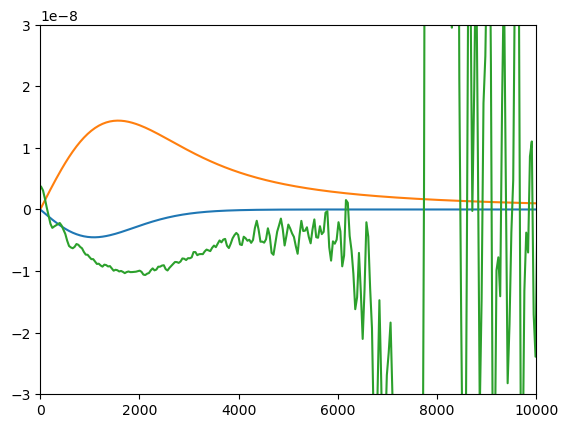

1701 142.05097161582404 0.05367557517547673 1.0001277066168213
1702 142.13448188720312 0.05366023475139136 1.000127709803032
1703 142.21799215858223 0.053643143763688526 1.0001277082854003
1704 142.30150242996132 0.053641787236549415 1.0001277069341883
1705 142.3850127013404 0.053622498655181636 1.000127705253297
1706 142.46852297271948 0.05359345002594536 1.0001277098652401
1707 142.55203324409857 0.053578092853381165 1.0001277045905286
1708 142.63554351547765 0.053560417658354585 1.000127707175317
1709 142.71905378685673 0.05354549196141557 1.000127703248019
1710 142.80256405823582 0.05353289171147368 1.0001277047108115
1711 142.8860743296149 0.05351660580160596 1.0001277010044087
1712 142.96958460099398 0.05349937576643945 1.000127702390105
1713 143.05309487237307 0.05348041822602846 1.0001277006366904
1714 143.13660514375215 0.0534680256438861 1.000127700687726
1715 143.22011541513123 0.053450458278124814 1.000127698695027
1716 143.30362568651034 0.05343608285448354 1.0001276994736

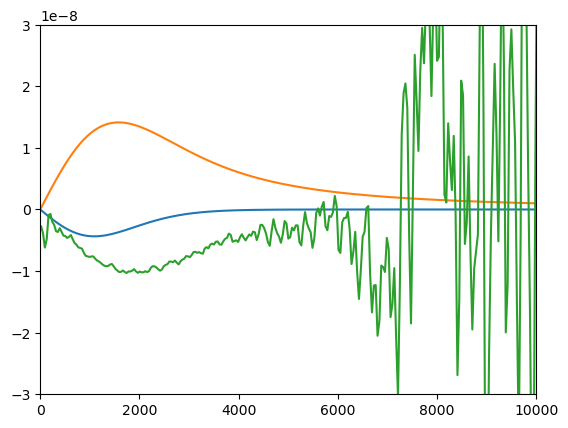

1801 150.40199875373258 0.05295866477755419 1.0001276370967773
1802 150.48550902511167 0.05296471296738648 1.0001276353245228
1803 150.56901929649075 0.05295984040397963 1.000127633471505
1804 150.65252956786983 0.05295353767600343 1.0001276357019089
1805 150.73603983924892 0.05295751939206399 1.0001276314723664
1806 150.819550110628 0.05295714373290832 1.000127633318434
1807 150.90306038200708 0.052963614968409754 1.0001276266543333
1808 150.98657065338617 0.052967068843669717 1.0001276292342345
1809 151.07008092476525 0.05297076793913529 1.0001276248217694
1810 151.15359119614433 0.05297622460383507 1.000127627835312
1811 151.23710146752344 0.05298304828159564 1.0001276246124564
1812 151.32061173890253 0.052986217880120895 1.0001276262342458
1813 151.4041220102816 0.052977814208768764 1.0001276245892483
1814 151.4876322816607 0.05298730179793928 1.0001276258404765
1815 151.57114255303978 0.05299630977183398 1.0001276214368697
1816 151.65465282441886 0.05299185305890404 1.000127628655

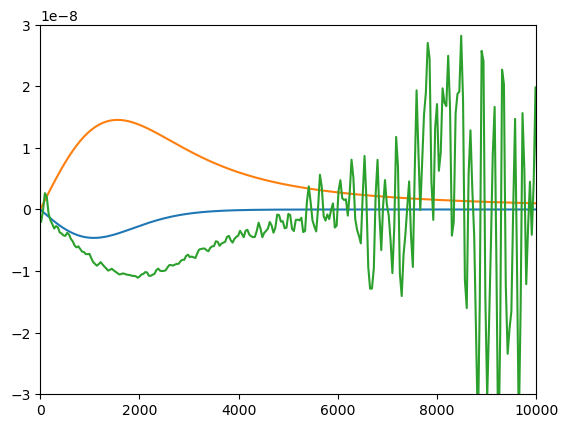

1901 158.7530258916411 0.054078543047135046 1.0001275065837354
1902 158.83653616302018 0.054090616483095974 1.000127504520608
1903 158.92004643439927 0.05410002838090556 1.0001275033503256
1904 159.00355670577835 0.05412143765627944 1.0001274991431373
1905 159.08706697715743 0.054139965410054926 1.0001274951328396
1906 159.17057724853655 0.054159918661744993 1.0001274942619771
1907 159.25408751991563 0.05417922138311284 1.0001274909891875
1908 159.3375977912947 0.05419848640926617 1.0001274907732454
1909 159.4211080626738 0.0542241530204398 1.0001274847982258
1910 159.50461833405288 0.054240717545807456 1.0001274874602224
1911 159.58812860543196 0.05425758923964025 1.0001274826018276
1912 159.67163887681104 0.05427682247758206 1.0001274842726777
1913 159.75514914819013 0.05429744416118867 1.0001274786130359
1914 159.8386594195692 0.05431447498238272 1.0001274805810092
1915 159.9221696909483 0.054331521481233956 1.0001274781370981
1916 160.00567996232738 0.0543583141284642 1.00012747896

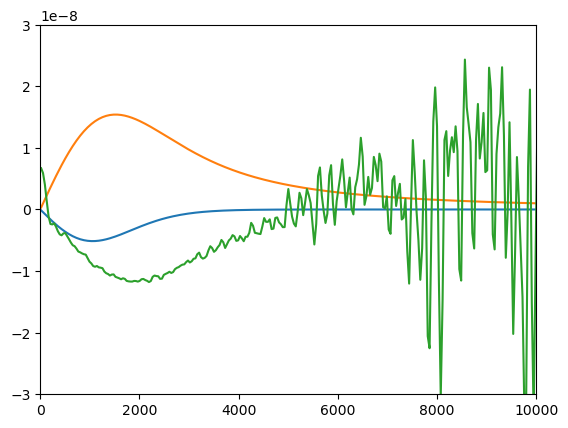

2001 167.10405302954965 0.05633210329735627 1.0001273316052663
2002 167.18756330092873 0.05635577043321866 1.0001273270475264
2003 167.2710735723078 0.05637175400596808 1.0001273283246408
2004 167.3545838436869 0.05639359663879024 1.0001273235150538
2005 167.43809411506598 0.05641961831893832 1.000127323242391
2006 167.52160438644506 0.05644315850753703 1.0001273213883985
2007 167.60511465782415 0.0564662772829179 1.0001273200400784
2008 167.68862492920323 0.05649485322859087 1.000127317553635
2009 167.7721352005823 0.05652088879222745 1.0001273128873631
2010 167.8556454719614 0.056547125387387626 1.0001273113820965
2011 167.93915574334048 0.05657384492983155 1.00012730818513
2012 168.02266601471956 0.05659852797990774 1.0001273097925394
2013 168.10617628609864 0.05662318898213937 1.0001273040695975
2014 168.18968655747773 0.05664947815295672 1.0001273050478305
2015 168.27319682885684 0.05667276290361025 1.000127300617786
2016 168.35670710023592 0.05669680371590973 1.0001273024045032
2

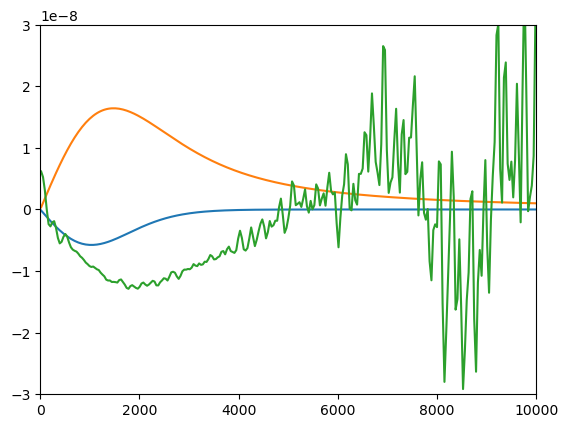

2101 175.45508016745816 0.05891267260662598 1.0001271432491043
2102 175.53859043883725 0.0589311184752954 1.0001271379072911
2103 175.62210071021633 0.058946532345074076 1.000127141919285
2104 175.7056109815954 0.058964221577745314 1.0001271363925714
2105 175.7891212529745 0.05898053182899199 1.0001271389564
2106 175.87263152435358 0.05899869559298819 1.000127132218084
2107 175.95614179573266 0.059012055478496306 1.0001271366358329
2108 176.03965206711175 0.05903332497138343 1.000127131490018
2109 176.12316233849083 0.05904589144652312 1.0001271328969716
2110 176.20667260986994 0.059050373271768444 1.0001271351767576
2111 176.29018288124902 0.05907707781006632 1.0001271330635209
2112 176.3736931526281 0.059097328707732835 1.000127135140997
2113 176.4572034240072 0.05911986791539819 1.0001271333385564
2114 176.54071369538627 0.05914335614363026 1.0001271322856409
2115 176.62422396676536 0.05915580530019738 1.0001271318137595
2116 176.70773423814444 0.05917548018230678 1.0001271322296428

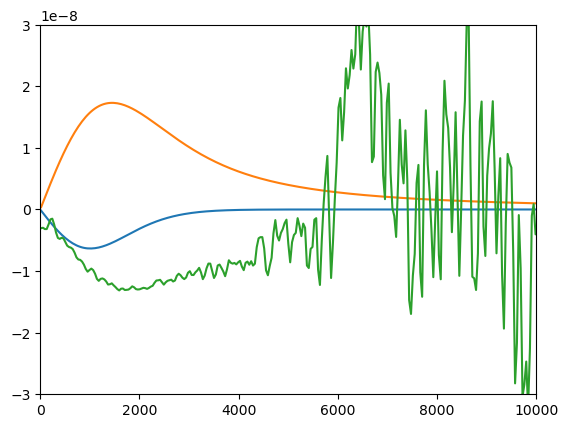

2201 183.80610730536668 0.06111506508209369 1.0001269959237775
2202 183.88961757674576 0.061122655757790474 1.0001269927205532
2203 183.97312784812485 0.06113776757815551 1.0001269971985638
2204 184.05663811950396 0.06114785967341152 1.000126992208833
2205 184.14014839088304 0.061152229130222543 1.0001269971914613
2206 184.22365866226212 0.061161116923172984 1.0001269909235952
2207 184.3071689336412 0.06117257082789619 1.000126993552978
2208 184.3906792050203 0.06118290641962826 1.00012698772101
2209 184.47418947639937 0.06118594239804045 1.0001269908712442
2210 184.55769974777846 0.061195948798284786 1.0001269844570089
2211 184.64121001915754 0.06120479890220392 1.0001269862840823
2212 184.72472029053662 0.06120226191288472 1.0001269861611892
2213 184.8082305619157 0.06120334771922415 1.0001269866080684
2214 184.8917408332948 0.06121576898900722 1.0001269850278514
2215 184.97525110467387 0.061231613339015056 1.0001269838206193
2216 185.05876137605296 0.061241040555230025 1.00012698459

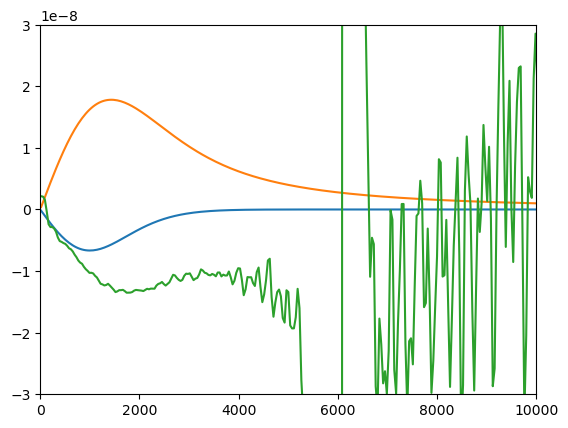

2301 192.15713444327523 0.06234813304040428 1.0001268974258335
2302 192.2406447146543 0.062354594715419646 1.0001268941489074
2303 192.3241549860334 0.062361849767008454 1.0001268960973324
2304 192.40766525741248 0.062362782206693446 1.0001268910114063
2305 192.49117552879156 0.06237138859648885 1.0001268936599677
2306 192.57468580017064 0.06238260052804138 1.00012688651314
2307 192.65819607154972 0.062385403644488545 1.0001268919713233
2308 192.7417063429288 0.062393496363306156 1.0001268840483717
2309 192.8252166143079 0.062402947336956664 1.0001268880229204
2310 192.90872688568697 0.062413293797368485 1.0001268818328055
2311 192.99223715706606 0.06241646055842399 1.000126884961029
2312 193.07574742844514 0.06241622676306201 1.000126879546007
2313 193.15925769982425 0.06241849907799177 1.0001268829419414
2314 193.24276797120334 0.06242093916673175 1.0001268777035655
2315 193.32627824258242 0.06242495702435968 1.0001268794789266
2316 193.4097885139615 0.06242478614905656 1.00012687569

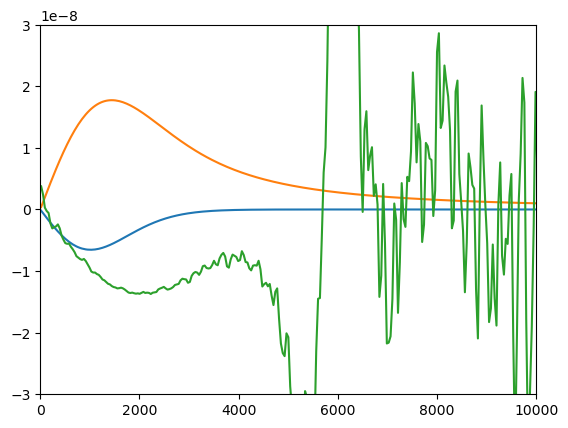

2401 200.50816158118374 0.061915494458714054 1.0001268786445499
2402 200.59167185256283 0.0619206035921283 1.0001268750542294
2403 200.6751821239419 0.06192795435670418 1.00012687709624
2404 200.758692395321 0.0619340338051536 1.0001268720950867
2405 200.84220266670008 0.06193885710556174 1.0001268742945357
2406 200.92571293807916 0.0619448265319136 1.0001268674920691
2407 201.00922320945824 0.061942253295230267 1.0001268733439088
2408 201.09273348083735 0.06194285928777948 1.0001268661294351
2409 201.17624375221644 0.06194970066639131 1.0001268688120288
2410 201.25975402359552 0.06194284979690095 1.000126865292451
2411 201.3432642949746 0.061940872558152275 1.000126871153992
2412 201.42677456635369 0.06195339391868643 1.0001268642430252
2413 201.51028483773277 0.06195509152823343 1.000126868387138
2414 201.59379510911185 0.06195359153364955 1.0001268624063628
2415 201.67730538049094 0.061961481060266395 1.000126864135299
2416 201.76081565187002 0.061963893156660024 1.0001268599675082


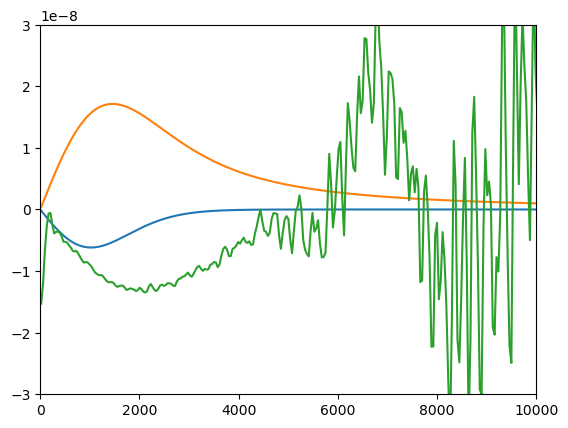

2501 208.85918871909226 0.06051505665508882 1.000126917818521
2502 208.94269899047134 0.060486928607327434 1.000126919274478
2503 209.02620926185045 0.06045747129506658 1.0001269196859435
2504 209.10971953322954 0.06042184361457443 1.0001269224962328
2505 209.19322980460862 0.06039170468307711 1.000126924453309
2506 209.2767400759877 0.06035768010105735 1.0001269245025297
2507 209.3602503473668 0.060325960042141 1.0001269245744766
2508 209.44376061874587 0.06029487842990134 1.0001269239905168
2509 209.52727089012495 0.0602638538830695 1.0001269282300247
2510 209.61078116150404 0.060232474372023566 1.0001269254438525
2511 209.69429143288312 0.06020710785783303 1.000126930392921
2512 209.7778017042622 0.060182218524821224 1.00012692727601
2513 209.86131197564129 0.06014832490875587 1.0001269363769218
2514 209.94482224702037 0.060124738363452154 1.0001269313633574
2515 210.02833251839945 0.060098061136751674 1.0001269365493384
2516 210.11184278977856 0.060069065067776276 1.000126930719956

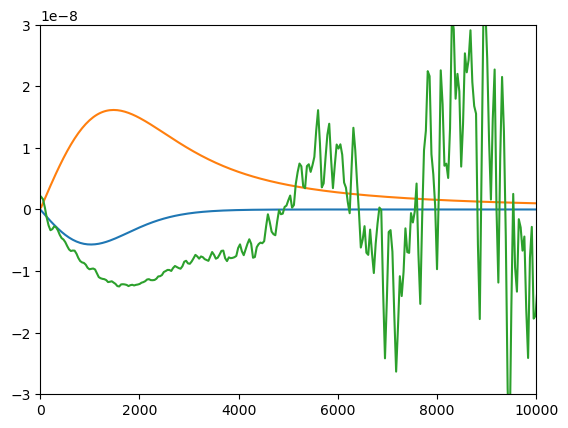

2601 217.2102158570008 0.0584853957599196 1.00012699284992
2602 217.2937261283799 0.05845389791695898 1.000126997250748
2603 217.37723639975897 0.058426946744146904 1.0001269937827069
2604 217.46074667113805 0.05839843301249824 1.0001269957949366
2605 217.54425694251714 0.058368168644130476 1.0001269956600902
2606 217.62776721389622 0.05833303308719559 1.000126997928635
2607 217.7112774852753 0.05830213174622694 1.0001270004246594
2608 217.7947877566544 0.0582702415693066 1.0001269985516847
2609 217.87829802803347 0.058227135065488815 1.0001270043796096
2610 217.96180829941255 0.058192816899323506 1.0001270017856108
2611 218.04531857079166 0.058163449857022514 1.0001270056770784
2612 218.12882884217075 0.05813109455369198 1.000127003381567
2613 218.21233911354983 0.058101652530877505 1.000127008042278
2614 218.2958493849289 0.058068139565898465 1.000127003958677
2615 218.379359656308 0.058029786279000406 1.0001270119248697
2616 218.46286992768708 0.05799405608106762 1.0001270088046847


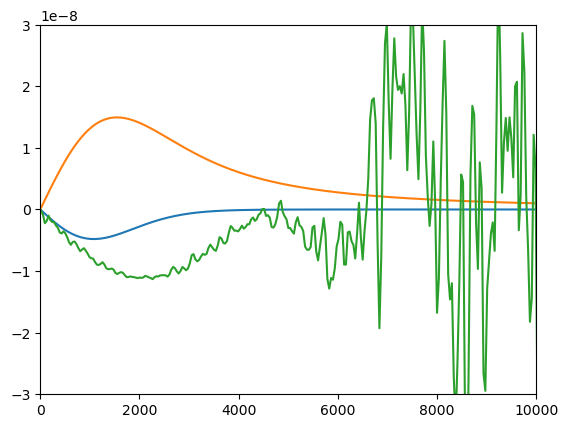

2701 225.56124299490932 0.0549456637220122 1.0001271324176892
2702 225.6447532662884 0.054927615484185906 1.0001271338534117
2703 225.7282635376675 0.05490874740235695 1.0001271318837057
2704 225.81177380904657 0.05488721054360421 1.0001271341808353
2705 225.89528408042565 0.054866666141364595 1.0001271337544984
2706 225.97879435180477 0.0548483624780877 1.0001271356093788
2707 226.06230462318385 0.05482558973555773 1.0001271350315168
2708 226.14581489456293 0.054800842305013864 1.000127136575887
2709 226.22932516594202 0.054790034370690924 1.0001271363579547
2710 226.3128354373211 0.054782972613656215 1.0001271330161081
2711 226.39634570870018 0.05476216924017155 1.0001271330475228
2712 226.47985598007926 0.05474392310000732 1.0001271335475748
2713 226.56336625145835 0.054738347631444605 1.0001271327712247
2714 226.64687652283743 0.0547207322894647 1.000127132512889
2715 226.7303867942165 0.05470400760349669 1.000127135950848
2716 226.8138970655956 0.05469914555834919 1.00012713195290

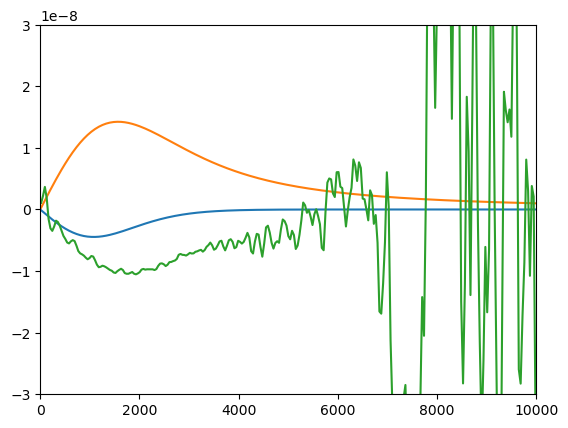

2801 233.91227013281787 0.05334466444950116 1.0001272464635482
2802 233.99578040419695 0.053318428835568824 1.0001272472537988
2803 234.07929067557603 0.053285150365839785 1.000127245297149
2804 234.16280094695512 0.05326604901969699 1.000127243330566
2805 234.2463112183342 0.05323550326135375 1.0001272402309684
2806 234.32982148971328 0.05321674695457866 1.0001272417188674
2807 234.41333176109237 0.053201041139955545 1.0001272343870142
2808 234.49684203247145 0.053170742397650884 1.000127238812125
2809 234.58035230385053 0.05314916902485367 1.0001272344992758
2810 234.66386257522962 0.05312970544991039 1.0001272345700982
2811 234.7473728466087 0.053104579022953756 1.0001272318380072
2812 234.83088311798778 0.05307766959155435 1.0001272340259113
2813 234.91439338936686 0.05305700030954956 1.0001272305988347
2814 234.99790366074595 0.05303223412609154 1.0001272300263198
2815 235.08141393212506 0.05300380804556092 1.0001272308746614
2816 235.16492420350414 0.05298007421710218 1.000127228

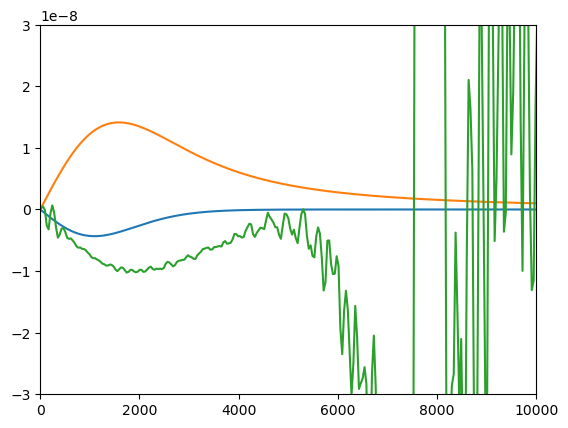

2901 242.26329727072638 0.05289306978741251 1.000127319967104
2902 242.34680754210547 0.0529140091230355 1.0001273261003476
2903 242.43031781348455 0.05293801863000432 1.000127322038015
2904 242.51382808486363 0.052956517856810194 1.0001273275017994
2905 242.59733835624272 0.05298283665831418 1.0001273206042285
2906 242.6808486276218 0.05301106609189546 1.0001273251431366
2907 242.76435889900088 0.05303391828758111 1.0001273234248105
2908 242.84786917037997 0.05305766459535349 1.000127327764297
2909 242.93137944175905 0.05308424585168642 1.0001273259809478
2910 243.01488971313816 0.05311935188211697 1.0001273261165533
2911 243.09839998451724 0.053139724288503234 1.000127326697292
2912 243.18191025589633 0.05316296783249241 1.0001273281822485
2913 243.2654205272754 0.05319007448040428 1.0001273240643294
2914 243.3489307986545 0.053211640121931164 1.000127325625911
2915 243.43244107003358 0.05324356697392721 1.000127321315238
2916 243.51595134141266 0.0532619522575146 1.0001273222643674


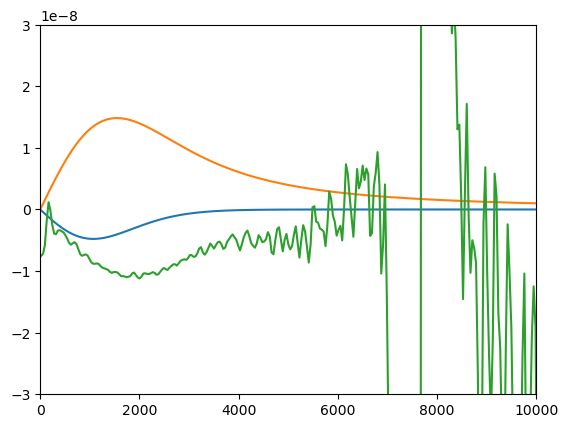

3001 250.6143244086349 0.05484743493662367 1.0001271084227752
3002 250.69783468001398 0.05486782945407102 1.0001271131169527
3003 250.78134495139307 0.05487750780004876 1.0001271106400507
3004 250.86485522277215 0.05488847512318193 1.0001271161006717
3005 250.94836549415126 0.05490536926115929 1.0001271120732618
3006 251.03187576553034 0.05491552216319261 1.0001271209405402
3007 251.11538603690943 0.05493155271055865 1.0001271185744216
3008 251.1988963082885 0.05494313559584959 1.0001271262797982
3009 251.2824065796676 0.054960491955082 1.000127126116054
3010 251.36591685104668 0.054979878077651874 1.0001271315921338
3011 251.44942712242576 0.054989534929788364 1.0001271318772318
3012 251.53293739380484 0.05500531653254228 1.0001271366224451
3013 251.61644766518393 0.05501945384753832 1.0001271347804896
3014 251.699957936563 0.05502873819069246 1.0001271414816033
3015 251.7834682079421 0.05504847391538332 1.0001271430071197
3016 251.86697847932118 0.05506000455998783 1.0001271481673235

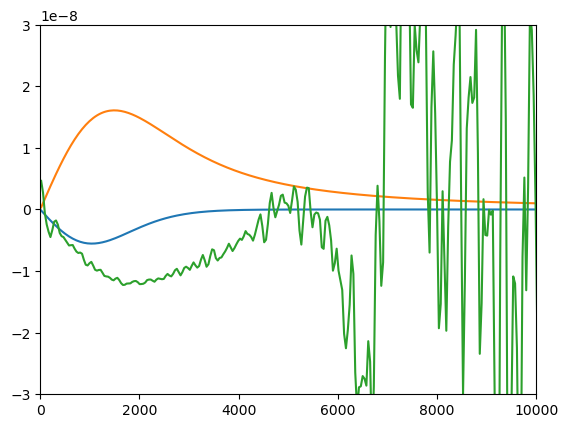

3101 258.96535154654345 0.05807727815289069 1.0001270551621302
3102 259.0488618179225 0.05812582237105723 1.0001270500266888
3103 259.1323720893016 0.05817866450767763 1.0001270395398427
3104 259.21588236068067 0.05822978105696686 1.000127035150187
3105 259.2993926320598 0.058273212393820585 1.0001270271103766
3106 259.3829029034389 0.0583251433747689 1.0001270232542767
3107 259.46641317481794 0.058376007612743655 1.000127010947958
3108 259.54992344619706 0.05842290486996456 1.0001270054856841
3109 259.6334337175761 0.05847919692081368 1.000126991609114
3110 259.7169439889552 0.05852459320876659 1.0001269890452567
3111 259.8004542603343 0.05857436168951767 1.000126978246371
3112 259.8839645317134 0.058633152479500315 1.0001269713513867
3113 259.96747480309244 0.05867692706082936 1.0001269636912944
3114 260.05098507447155 0.05872419028267073 1.0001269615289476
3115 260.1344953458506 0.058779688540610366 1.000126953324683
3116 260.2180056172297 0.05882861817786558 1.0001269474709218
3117

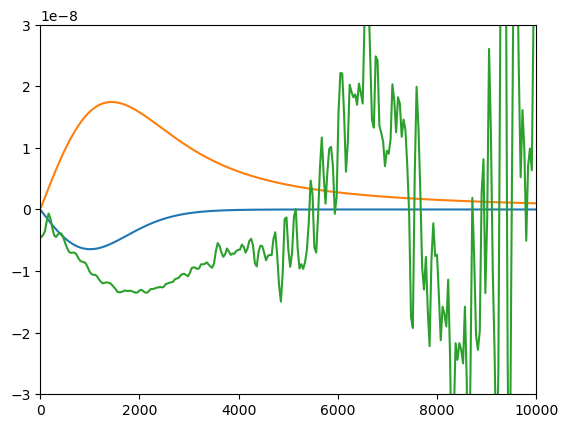

3201 267.316378684452 0.06151129210740081 1.0001269923448812
3202 267.39988895583105 0.06152190913995635 1.0001269942025286
3203 267.48339922721016 0.06153301921119543 1.0001269988908816
3204 267.5669094985892 0.06154718459690728 1.000127003280288
3205 267.6504197699683 0.061559346806841116 1.0001270028896412
3206 267.7339300413474 0.06155936668936024 1.0001270100293547
3207 267.8174403127265 0.06157134611685779 1.000127009166171
3208 267.90095058410554 0.06158384371277799 1.000127014528502
3209 267.98446085548466 0.06158901980811753 1.0001270150558832
3210 268.0679711268637 0.061609604880841266 1.0001270177468193
3211 268.1514813982428 0.06162372321820414 1.0001270161697218
3212 268.2349916696219 0.06162306174265656 1.0001270256918064
3213 268.318501941001 0.061633709736733426 1.0001270235969608
3214 268.40201221238004 0.06164935927013716 1.000127029807084
3215 268.48552248375915 0.061660621250761556 1.0001270269329656
3216 268.56903275513827 0.06167316019825167 1.000127032170514
3217

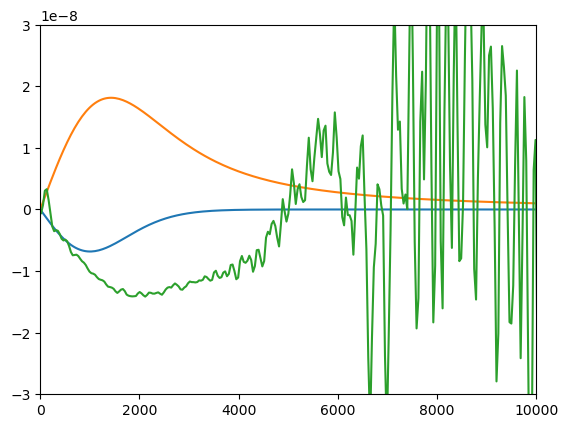

3301 275.6674058223605 0.06293563210454532 1.0001267086173296
3302 275.7509160937396 0.06295707049302918 1.0001267038160535
3303 275.83442636511865 0.06297718452492633 1.0001266991978652
3304 275.91793663649776 0.06300145140949089 1.0001266962463848
3305 276.0014469078768 0.06302455301693158 1.0001266913895035
3306 276.0849571792559 0.06303387668161352 1.0001266923725967
3307 276.168467450635 0.06304563295306273 1.0001266881312791
3308 276.2519777220141 0.06306893419470076 1.000126688785331
3309 276.33548799339314 0.06309438445067597 1.000126682473943
3310 276.41899826477226 0.06311978737605743 1.0001266821610102
3311 276.50250853615137 0.06313754815740821 1.000126673196283
3312 276.5860188075304 0.06314886676418249 1.0001266781326075
3313 276.66952907890953 0.06317326623611928 1.000126667093988
3314 276.7530393502886 0.06319382592707275 1.000126667881261
3315 276.8365496216677 0.06320170984299704 1.0001266636278603
3316 276.92005989304675 0.06322680350579805 1.0001266641282769
3317 27

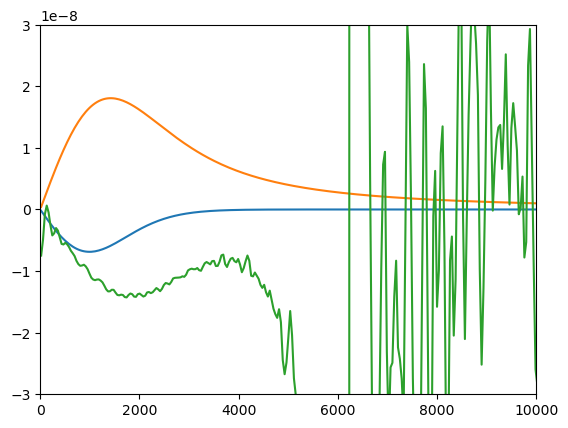

3401 284.018432960269 0.06298975110064878 1.0001270477758746
3402 284.1019432316481 0.06296043447636578 1.0001270528039667
3403 284.1854535030272 0.0629385809727032 1.0001270561392368
3404 284.26896377440625 0.0629136480073835 1.0001270617737956
3405 284.35247404578536 0.06288714568663793 1.0001270647028684
3406 284.43598431716447 0.06286201177575029 1.0001270680114085
3407 284.5194945885435 0.06283382681421283 1.0001270707878513
3408 284.60300485992263 0.06280729967791873 1.0001270769804378
3409 284.6865151313017 0.0627775715212874 1.000127074724803
3410 284.7700254026808 0.06273525674801389 1.000127083814204
3411 284.85353567405986 0.06270554657565222 1.0001270838349623
3412 284.93704594543897 0.06268242681913268 1.0001270895164616
3413 285.020556216818 0.06264776596739374 1.0001270890838891
3414 285.10406648819713 0.06261197163363019 1.0001270964166293
3415 285.1875767595762 0.06258545758308237 1.0001270941692075
3416 285.2710870309553 0.06255618126645505 1.000127098357229
3417 285.

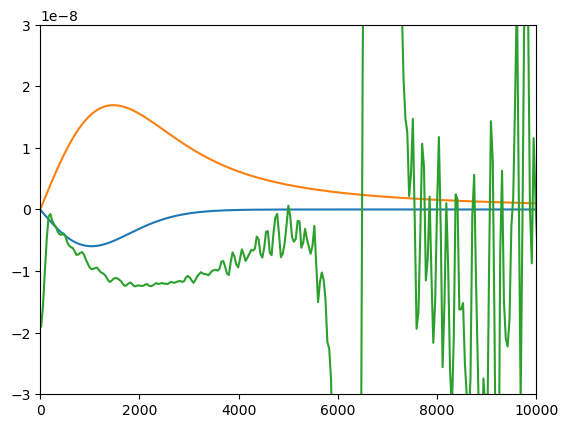

3501 292.36946009817757 0.05981534017263929 1.0001268221310136
3502 292.4529703695566 0.05980226833587032 1.0001268139665835
3503 292.53648064093574 0.05978524421126403 1.000126814139722
3504 292.6199909123148 0.05976313101956897 1.0001268100604264
3505 292.7035011836939 0.059746452975777874 1.0001268066591973
3506 292.78701145507296 0.059718300563695016 1.0001268045537615
3507 292.87052172645207 0.05969318180117939 1.000126803928692
3508 292.9540319978311 0.05967631244616893 1.0001268013446583
3509 293.03754226921023 0.059652135156256454 1.000126802444802
3510 293.1210525405893 0.059625214525040014 1.0001268025133505
3511 293.2045628119684 0.059606511341344884 1.000126800152459
3512 293.28807308334746 0.05959502484077721 1.0001268006893593
3513 293.37158335472657 0.05958014735198816 1.0001267972531909
3514 293.4550936261057 0.05955129144170559 1.0001268024772427
3515 293.53860389748473 0.05953841767581471 1.0001268007914466
3516 293.62211416886385 0.05952243712995029 1.000126800766702

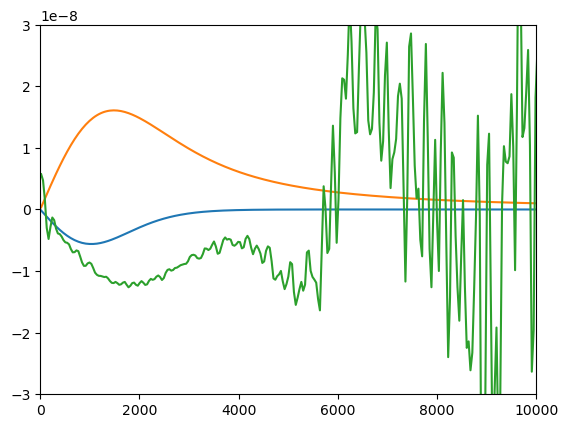

3601 300.72048723608606 0.05820097756164985 1.0001273514346638
3602 300.80399750746517 0.058177332067179864 1.0001273508076824
3603 300.8875077788442 0.058152829511853896 1.0001273612606718
3604 300.97101805022334 0.05813006608048859 1.000127361964289
3605 301.0545283216024 0.05810392757580883 1.0001273735922076
3606 301.1380385929815 0.05807820876436688 1.000127373908644
3607 301.22154886436056 0.058051988127600374 1.0001273855596169
3608 301.30505913573967 0.058027493540482714 1.000127386611239
3609 301.3885694071188 0.05799062451100071 1.0001273988149
3610 301.47207967849783 0.05796074737784272 1.000127401391019
3611 301.55558994987695 0.05793836361066788 1.0001274080191647
3612 301.639100221256 0.05790273012727315 1.000127412365831
3613 301.7226104926351 0.057876988283481375 1.0001274180834965
3614 301.80612076401417 0.05785554120299781 1.0001274194711305
3615 301.8896310353933 0.0578258939783149 1.0001274261736026
3616 301.97314130677233 0.05780543441884771 1.0001274290190236
3617

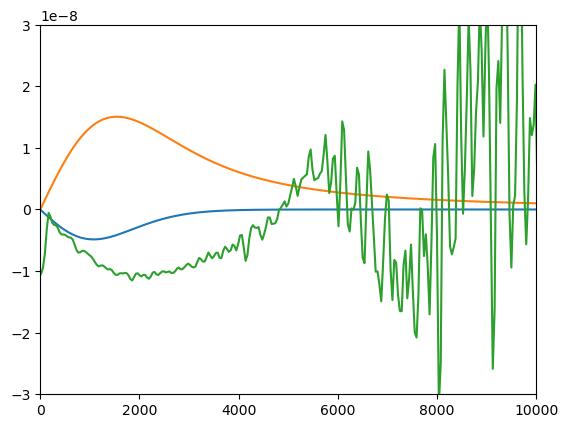

3701 309.0715143739946 0.05520923849663154 1.0001271282769006
3702 309.15502464537366 0.05518297509871336 1.0001271187216263
3703 309.23853491675277 0.05514652754409602 1.0001271177911382
3704 309.3220451881319 0.05511187696618811 1.0001271088756385
3705 309.40555545951094 0.05509716751884425 1.000127105167634
3706 309.48906573089005 0.05507601977291788 1.0001270966293885
3707 309.5725760022691 0.055056051236266654 1.000127093590191
3708 309.6560862736482 0.05502514868629325 1.0001270868365677
3709 309.73959654502727 0.054999187086145714 1.0001270891889935
3710 309.8231068164064 0.05497651849283768 1.0001270789245045
3711 309.90661708778543 0.05494662906652914 1.0001270820127586
3712 309.99012735916455 0.05493028201118084 1.0001270732353633
3713 310.0736376305436 0.054914346176189364 1.0001270726807987
3714 310.1571479019227 0.05489336833929365 1.000127066258616
3715 310.24065817330177 0.05487005873579297 1.0001270656272252
3716 310.3241684446809 0.05485148437246435 1.000127058063187
3

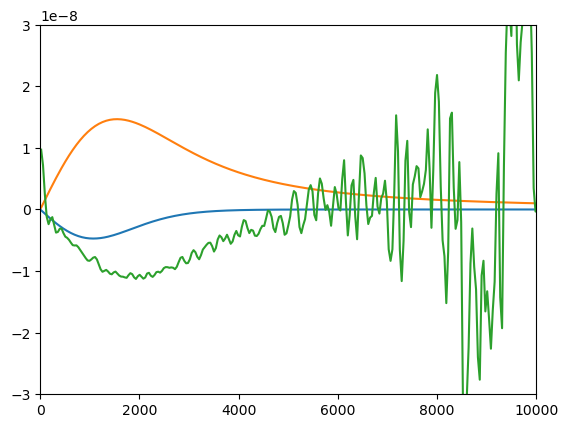

3801 317.42254151190315 0.054495044005128605 1.0001273549339917
3802 317.5060517832822 0.05449364295797583 1.0001273635872416
3803 317.5895620546613 0.05449364151754418 1.0001273753262818
3804 317.67307232604037 0.05449842564067676 1.0001273832957382
3805 317.7565825974195 0.05449948069677625 1.0001273961632848
3806 317.84009286879854 0.0545004349187432 1.0001274007434329
3807 317.92360314017765 0.05450522387321151 1.0001274135412108
3808 318.0071134115567 0.05451469889470504 1.0001274169568055
3809 318.0906236829358 0.05450665105070577 1.0001274306050905
3810 318.17413395431487 0.0545029971977165 1.000127434442361
3811 318.257644225694 0.05451578803184361 1.0001274454775246
3812 318.3411544970731 0.054523670108798605 1.0001274495986168
3813 318.42466476845215 0.05452479172655407 1.0001274625027015
3814 318.50817503983126 0.054529362088010715 1.0001274663099509
3815 318.5916853112103 0.054536909555496844 1.000127476840391
3816 318.6751955825894 0.05453746254038012 1.0001274827113753
38

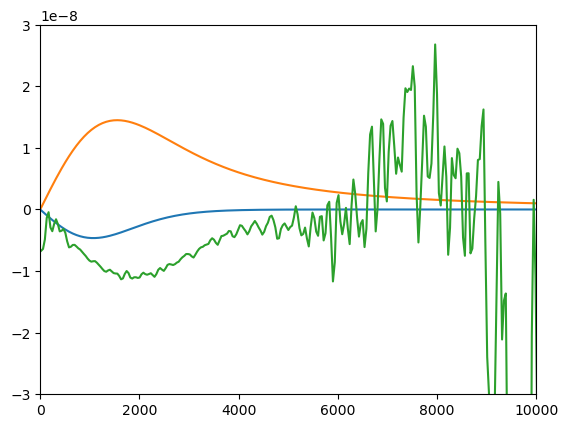

3901 325.77356864981164 0.054105759216966004 1.0001276060531092
3902 325.85707892119075 0.05408744852233253 1.0001275995860777
3903 325.9405891925698 0.05407642613785965 1.0001275929322384
3904 326.0240994639489 0.05407437133974177 1.0001275828547842
3905 326.10760973532797 0.054059957338861424 1.0001275779640844
3906 326.1911200067071 0.054036870339745954 1.0001275706853259
3907 326.2746302780862 0.054026063804006576 1.0001275653783555
3908 326.35814054946525 0.05401389230224074 1.0001275570945993
3909 326.44165082084436 0.05399553958628328 1.0001275528610323
3910 326.5251610922234 0.05397483283643338 1.0001275445905617
3911 326.6086713636025 0.05396421127355859 1.0001275386225872
3912 326.6921816349816 0.05394929920129525 1.0001275291559009
3913 326.7756919063607 0.05393690246056061 1.0001275239074598
3914 326.85920217773975 0.05392663917875799 1.0001275104262664
3915 326.94271244911886 0.05390586292146264 1.0001275079708158
3916 327.0262227204979 0.053885234398224055 1.0001274972391

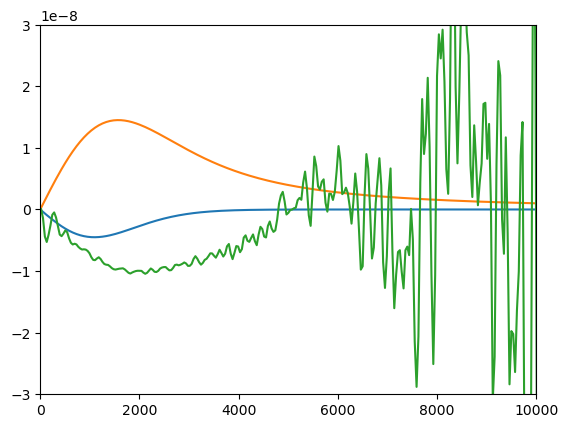

4001 334.1245957877202 0.05372546016681789 1.0001270304694496
4002 334.2081060590993 0.05373079626552128 1.0001270347397992
4003 334.29161633047835 0.05375058347497928 1.0001270343567532
4004 334.37512660185746 0.05375826893757737 1.0001270392534198
4005 334.4586368732365 0.053773489392806434 1.0001270387917827
4006 334.5421471446156 0.053784718354454426 1.000127039655692
4007 334.6256574159947 0.053788046617806576 1.0001270455583604
4008 334.7091676873738 0.05380619838486162 1.0001270452481583
4009 334.79267795875285 0.05382163140555345 1.0001270493237377
4010 334.87618823013196 0.05382522948008403 1.0001270530869968
4011 334.959698501511 0.053839457671140366 1.0001270598834728
4012 335.0432087728901 0.05386228504797597 1.0001270604675594
4013 335.1267190442692 0.053880636009724654 1.000127067650921
4014 335.2102293156483 0.053895195078464964 1.0001270676236738
4015 335.2937395870274 0.053908654223360775 1.000127075582922
4016 335.37724985840646 0.05392910171246974 1.0001270729426932


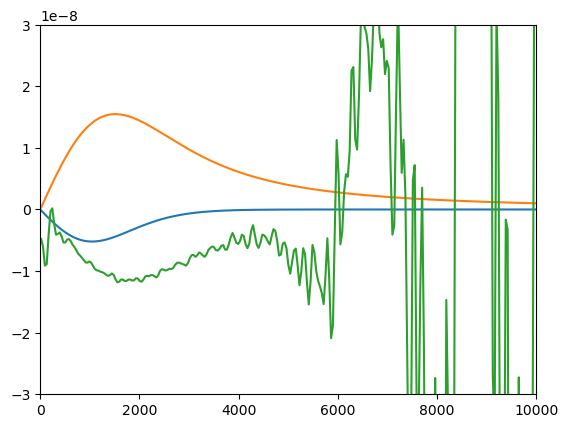

4101 342.4756229256287 0.056645924521142275 1.0001276076483618
4102 342.5591331970078 0.05667944048556648 1.0001276133229138
4103 342.6426434683869 0.05671144794927396 1.0001276181602885
4104 342.72615373976595 0.05672961007903906 1.00012762622323
4105 342.80966401114506 0.05676791719331718 1.0001276252874616
4106 342.8931742825241 0.056797560510301985 1.0001276307707978
4107 342.9766845539032 0.0568281479019438 1.0001276368825864
4108 343.0601948252823 0.05686116681152057 1.0001276412938438
4109 343.1437050966614 0.05688944130366755 1.0001276476220056
4110 343.2272153680405 0.056928383366697595 1.000127648339126
4111 343.31072563941956 0.05695090004256591 1.0001276555580978
4112 343.39423591079867 0.056977688970987296 1.0001276587379138
4113 343.4777461821777 0.05700641073215708 1.0001276637209355
4114 343.56125645355684 0.05703308927979376 1.000127667432137
4115 343.6447667249359 0.05706313764758118 1.000127669764621
4116 343.728276996315 0.057090327180758974 1.0001276734114433
4117 

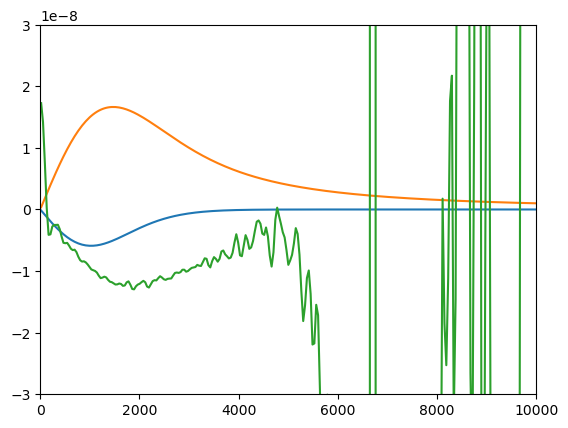

4201 350.8266500635372 0.05945912355685621 1.0001272750269696
4202 350.9101603349163 0.05947245536853807 1.0001272684852371
4203 350.9936706062954 0.05949391796096034 1.0001272577943339
4204 351.0771808776745 0.059519860581442964 1.0001272486537258
4205 351.1606911490536 0.05952997833304619 1.0001272412768492
4206 351.24420142043266 0.05955150311285317 1.000127230892159
4207 351.32771169181177 0.05957162135429432 1.0001272204883558
4208 351.4112219631908 0.059590739257224266 1.0001272140601065
4209 351.49473223456994 0.059615001389710584 1.0001272016847842
4210 351.578242505949 0.05963743969009308 1.000127194568511
4211 351.6617527773281 0.05965858985627354 1.0001271843326436
4212 351.74526304870716 0.059677642056654066 1.0001271763628146
4213 351.82877332008627 0.05969679083399343 1.0001271671964131
4214 351.9122835914653 0.05971873761889953 1.0001271589607974
4215 351.99579386284444 0.059732434387342125 1.0001271501588636
4216 352.0793041342235 0.05974575045038047 1.0001271449796836


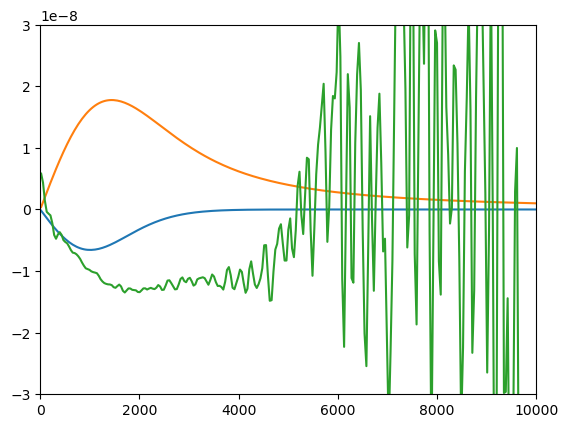

4301 359.17767720144576 0.062077615047210516 1.0001266453970665
4302 359.2611874728249 0.06211805513208941 1.0001266461842742
4303 359.3446977442039 0.06214888459488361 1.000126648176742
4304 359.42820801558304 0.06217770726182014 1.0001266532140443
4305 359.5117182869621 0.06221224974245869 1.000126654337555
4306 359.5952285583412 0.06224822201983812 1.0001266593480012
4307 359.67873882972026 0.06228678616830056 1.0001266584396906
4308 359.76224910109937 0.06232010178768164 1.0001266615987368
4309 359.8457593724784 0.06235038432914773 1.0001266608850619
4310 359.92926964385754 0.062385321190464076 1.0001266662654107
4311 360.0127799152366 0.062421474144243656 1.0001266655708143
4312 360.0962901866157 0.062461982465421347 1.00012666571139
4313 360.17980045799476 0.062491775458574005 1.000126668988596
4314 360.26331072937387 0.06252391234249403 1.000126676677333
4315 360.346821000753 0.06255992994278034 1.0001266744021542
4316 360.43033127213204 0.06259114028587892 1.0001266800211104
43

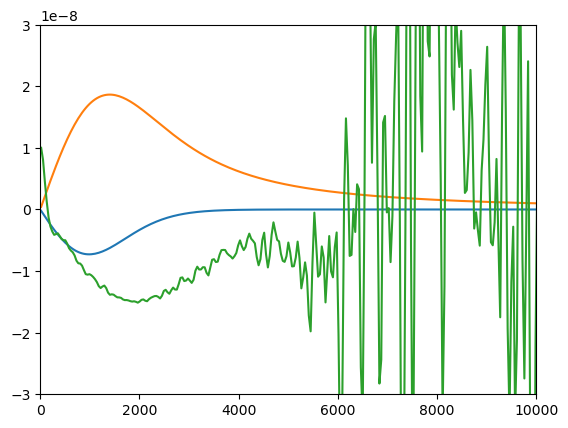

4401 367.5287043393543 0.06441032062418366 1.000127179934427
4402 367.61221461073336 0.06442024561312783 1.0001271908330098
4403 367.6957248821125 0.06442860349742306 1.0001271992538485
4404 367.7792351534915 0.0644359276706033 1.0001272090967008
4405 367.86274542487064 0.06444678031578559 1.0001272154530305
4406 367.9462556962497 0.06447432181463164 1.0001272217369974
4407 368.0297659676288 0.06449219417695336 1.0001272252144042
4408 368.1132762390079 0.06449679892195444 1.0001272361729643
4409 368.19678651038697 0.06450778562501737 1.0001272377703152
4410 368.2802967817661 0.0645137286430076 1.0001272486146364
4411 368.36380705314514 0.06451721159475413 1.0001272528990752
4412 368.44731732452425 0.06452770070350022 1.0001272624057258
4413 368.5308275959033 0.06453372034414614 1.0001272666448904
4414 368.6143378672824 0.06453883977263311 1.0001272765334095
4415 368.69784813866147 0.06454112757599392 1.0001272811659623
4416 368.7813584100406 0.06454918808117939 1.0001272894708686
4417 

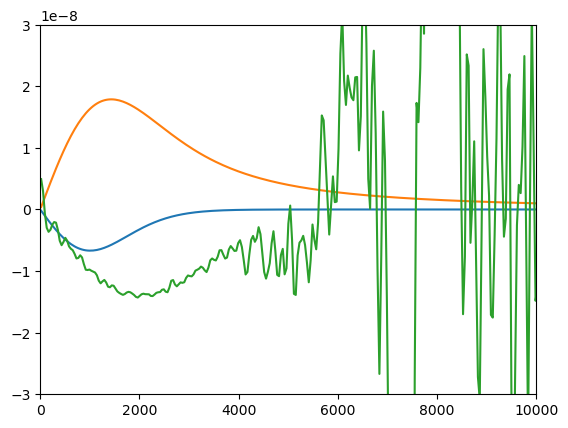

4501 375.8797314772628 0.062344979151249015 1.000127398937212
4502 375.9632417486419 0.06230149710208231 1.0001273976574947
4503 376.046752020021 0.062261190109476006 1.0001273921769565
4504 376.1302622914001 0.06221434953305708 1.0001273927781722
4505 376.2137725627792 0.062165272377973535 1.00012738936615
4506 376.29728283415824 0.06213100178406178 1.000127386194045
4507 376.38079310553735 0.0620860657786655 1.0001273808479416
4508 376.4643033769164 0.0620433778982847 1.0001273819267682
4509 376.5478136482955 0.06200448508362115 1.0001273749186095
4510 376.63132391967457 0.06195940614226235 1.0001273793363747
4511 376.7148341910537 0.06192972829953009 1.0001273677262033
4512 376.79834446243274 0.06187934186531739 1.00012736983241
4513 376.88185473381185 0.061826162544836534 1.0001273631452117
4514 376.9653650051909 0.06179821923210555 1.0001273578569025
4515 377.04887527657 0.06175851568211367 1.0001273524335201
4516 377.13238554794907 0.0617167631991961 1.0001273530469241
4517 377.2

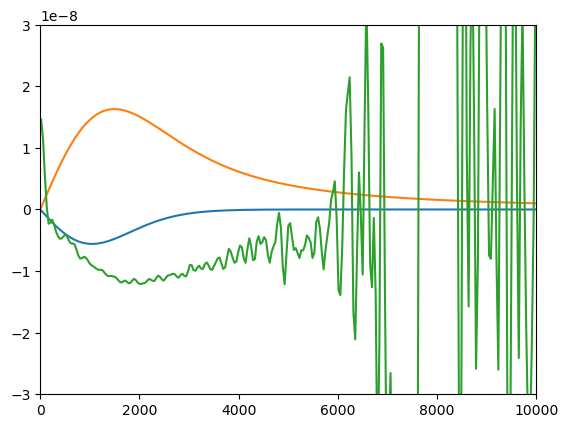

4601 384.23075861517134 0.058297954286251015 1.0001267859730933
4602 384.31426888655045 0.05825637875564553 1.0001267855061766
4603 384.3977791579295 0.05821356454266851 1.000126782556239
4604 384.4812894293086 0.0581715281230787 1.0001267816579449
4605 384.5647997006877 0.058131851908207646 1.0001267765862834
4606 384.6483099720668 0.05810210468547203 1.0001267744499127
4607 384.73182024344584 0.058064882698421506 1.0001267688519215
4608 384.81533051482495 0.05802893049562903 1.000126770327426
4609 384.898840786204 0.0579905724249832 1.0001267671004528
4610 384.9823510575831 0.057949956014059896 1.0001267715717808
4611 385.06586132896217 0.05791150229554796 1.0001267669567293
4612 385.1493716003413 0.05786951582221139 1.000126771509958
4613 385.2328818717204 0.05783088822421167 1.0001267663019193
4614 385.31639214309945 0.05778634717108761 1.0001267700788112
4615 385.39990241447856 0.05775364659738548 1.0001267661759219
4616 385.4834126858576 0.05772417717977758 1.000126764027076
4617

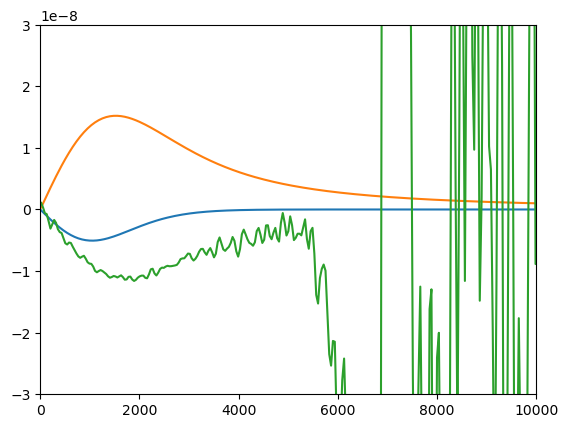

4701 392.5817857530799 0.05596665268499757 1.0001268603493543
4702 392.66529602445894 0.05594410783315173 1.000126865211605
4703 392.74880629583805 0.055929608358853855 1.0001268668121104
4704 392.8323165672171 0.055905207764629934 1.000126875680322
4705 392.9158268385962 0.05588620961884641 1.000126879544796
4706 392.9993371099753 0.05586917232420606 1.0001268873798985
4707 393.0828473813544 0.0558437430184568 1.0001268934657543
4708 393.1663576527335 0.05582279567675401 1.0001269007867668
4709 393.24986792411255 0.055802709656122926 1.0001269068980467
4710 393.33337819549166 0.05577652954161021 1.0001269182604327
4711 393.4168884668707 0.05575377105912948 1.0001269251241793
4712 393.5003987382498 0.05573264717991173 1.0001269326199054
4713 393.5839090096289 0.055709351927639074 1.0001269382247706
4714 393.667419281008 0.05568162418670262 1.000126947487201
4715 393.75092955238705 0.05565408283465184 1.0001269545659157
4716 393.83443982376616 0.05562717874331589 1.000126963483734
4717 

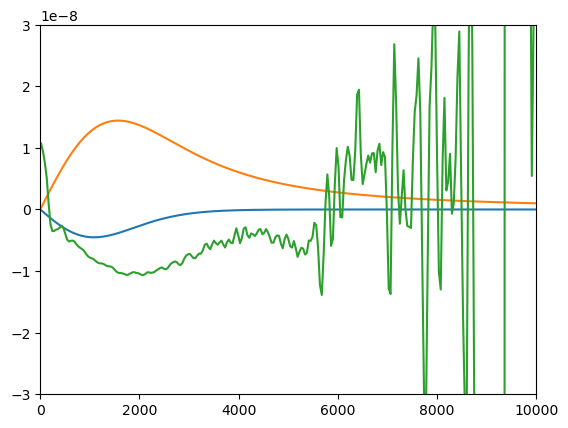

4801 400.9328128909884 0.05367355564813405 1.0001278174652648
4802 401.0163231623675 0.05366359905414987 1.0001278224767043
4803 401.0998334337466 0.053650323334178684 1.0001278306369716
4804 401.18334370512565 0.053656630668968835 1.000127831336146
4805 401.26685397650476 0.053643289423620406 1.0001278389592518
4806 401.3503642478838 0.05363264752657602 1.0001278419767845
4807 401.43387451926293 0.053631280175048715 1.0001278452000957
4808 401.517384790642 0.053623479347400936 1.0001278498268578
4809 401.6008950620211 0.05362335772210752 1.0001278547634702
4810 401.68440533340015 0.05362219832731216 1.0001278573643944
4811 401.76791560477926 0.05361082236879716 1.000127862842983
4812 401.8514258761583 0.05359713134372622 1.0001278665480302
4813 401.9349361475374 0.05358643148659561 1.0001278726248728
4814 402.0184464189165 0.053583357455194464 1.0001278745647404
4815 402.1019566902956 0.05357954637363597 1.0001278769229058
4816 402.1854669616747 0.053568133011226704 1.0001278816417793

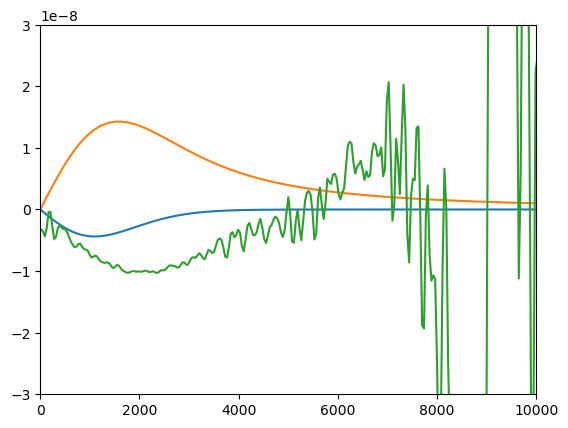

4901 409.2838400288969 0.05313774287299105 1.0001279091254638
4902 409.36735030027603 0.0531394441162249 1.0001279018624496
4903 409.4508605716551 0.05313989803912607 1.0001278967923997
4904 409.5343708430342 0.053142917450991 1.0001278898557806
4905 409.61788111441325 0.05316315002161205 1.0001278816868628
4906 409.70139138579236 0.05316619633957949 1.0001278719103424
4907 409.7849016571714 0.05317020453608594 1.0001278673941174
4908 409.86841192855053 0.053176261467038355 1.000127855325623
4909 409.9519221999296 0.053177692355931824 1.0001278529557167
4910 410.0354324713087 0.0531809617702366 1.0001278411272612
4911 410.1189427426878 0.05318917994324454 1.0001278386767554
4912 410.20245301406686 0.05320905692622784 1.0001278244788288
4913 410.285963285446 0.05321739824055946 1.0001278215642462
4914 410.369473556825 0.053223900008028006 1.000127808398567
4915 410.45298382820414 0.05322712777456264 1.00012780477058
4916 410.5364940995832 0.05323879316741129 1.000127791442526
4917 410.6

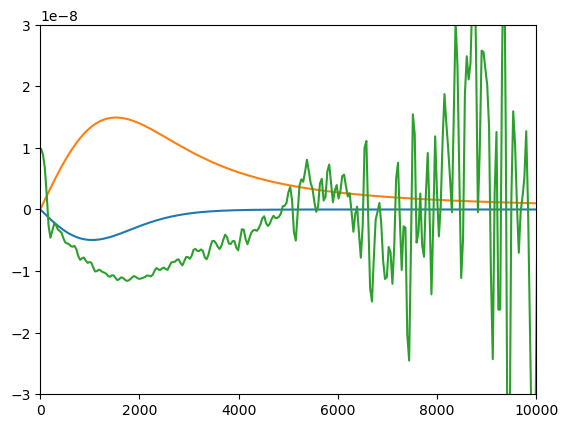

5001 417.63486716680546 0.05546397715881372 1.0001268716627705
5002 417.7183774381845 0.055478899823818165 1.000126865330775
5003 417.80188770956363 0.05549209788020279 1.0001268647897894
5004 417.8853979809427 0.05551332555249265 1.0001268537919072
5005 417.9689082523218 0.05552193609146433 1.000126854908545
5006 418.0524185237009 0.05554021232235676 1.0001268423509484
5007 418.13592879507996 0.055558229198692466 1.0001268411155677
5008 418.2194390664591 0.05557377913566369 1.0001268316585936
5009 418.30294933783813 0.05558737967987552 1.0001268297825812
5010 418.38645960921724 0.05560183439923759 1.0001268212211545
5011 418.4699698805963 0.05562154130022787 1.0001268202329554
5012 418.5534801519754 0.055629493368192916 1.0001268132692525
5013 418.63699042335446 0.0556379237055018 1.0001268154449217
5014 418.7205006947336 0.05565334677162242 1.0001268064319049
5015 418.8040109661126 0.05567472330515978 1.0001268059253103
5016 418.88752123749174 0.0556905469667676 1.000126797270889
501

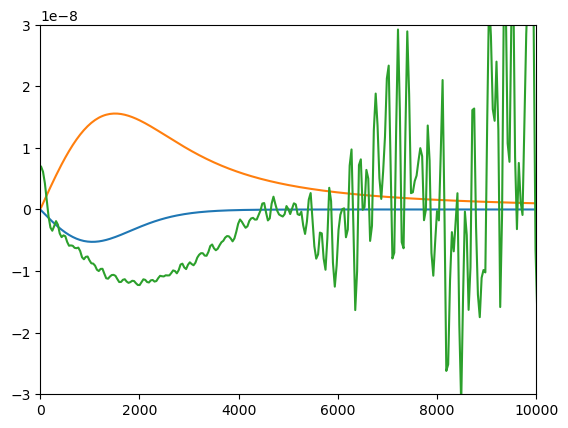

5101 425.985894304714 0.05682909035292511 1.0001263984886033
5102 426.06940457609306 0.05684168358398514 1.000126396124709
5103 426.1529148474722 0.05685270064456332 1.0001263990128615
5104 426.23642511885123 0.05687953059219517 1.0001263930790627
5105 426.31993539023034 0.05689358217855174 1.000126394789988
5106 426.4034456616094 0.05690888764415551 1.0001263923573864
5107 426.4869559329885 0.056931540535174956 1.000126392288045
5108 426.57046620436756 0.05694625823109212 1.0001263920177366
5109 426.6539764757467 0.05696988828635112 1.0001263941985012
5110 426.73748674712573 0.056998403916797266 1.0001263868894397
5111 426.82099701850484 0.05701719279142479 1.000126393894113
5112 426.9045072898839 0.05703445462429712 1.0001263887960978
5113 426.988017561263 0.057057731155027595 1.0001263931912572
5114 427.0715278326421 0.0570761624253447 1.0001263879324893
5115 427.1550381040212 0.05709689846940111 1.0001263948162467
5116 427.2385483754003 0.057120745133604614 1.0001263830968075
5117 

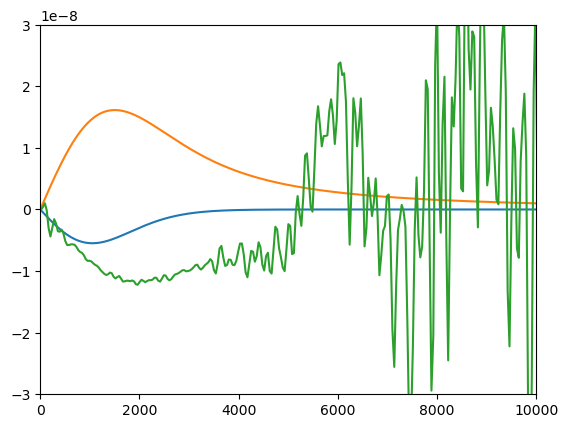

5201 434.3369214426225 0.057914291911209774 1.000127162821391
5202 434.4204317140016 0.057924475990015795 1.000127174339802
5203 434.50394198538066 0.057934228152095514 1.0001271840866308
5204 434.5874522567598 0.057944294634880045 1.0001271906244042
5205 434.67096252813883 0.05794844417988693 1.0001272000308734
5206 434.75447279951794 0.05795824182776795 1.0001272046045653
5207 434.837983070897 0.05796809057547575 1.0001272154940846
5208 434.9214933422761 0.057978144739929495 1.0001272215121804
5209 435.0050036136552 0.05799070262369551 1.0001272336872338
5210 435.0885138850343 0.05800571459753985 1.000127239074658
5211 435.1720241564134 0.05802452774338265 1.0001272493757483
5212 435.25553442779244 0.05803348355665393 1.0001272556101342
5213 435.33904469917155 0.058049506675260154 1.0001272697479169
5214 435.4225549705506 0.058061682165034025 1.0001272744900778
5215 435.5060652419297 0.05807329594015936 1.0001272869100992
5216 435.5895755133088 0.05808767444871334 1.000127288194302
5

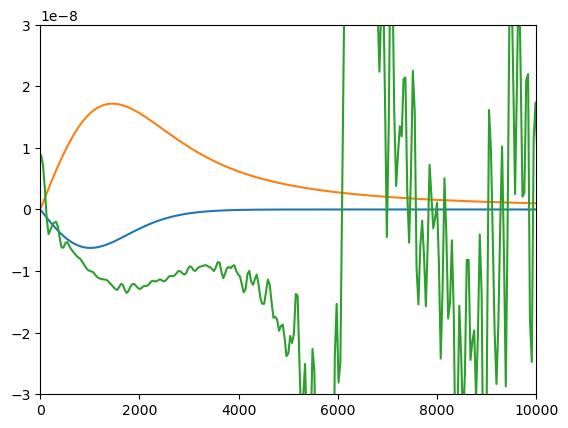

5301 442.68794858053104 0.06081168452020353 1.0001276027579835
5302 442.7714588519101 0.06084409078602663 1.0001276103868868
5303 442.8549691232892 0.060881067103422656 1.0001276097031349
5304 442.9384793946683 0.060920154549547544 1.0001276131043508
5305 443.0219896660474 0.06094436494581418 1.000127616996266
5306 443.1054999374265 0.06097259910428794 1.0001276210400314
5307 443.18901020880554 0.06100609061757146 1.0001276220776742
5308 443.27252048018465 0.0610452427532864 1.0001276253392166
5309 443.3560307515637 0.06108716420080981 1.0001276253451743
5310 443.4395410229428 0.06111714672343085 1.0001276310242229
5311 443.5230512943219 0.06115277690084657 1.0001276325567896
5312 443.606561565701 0.06117623672715559 1.000127634580944
5313 443.69007183708004 0.06119629013951085 1.0001276409997044
5314 443.77358210845915 0.0612357011337891 1.0001276383328077
5315 443.8570923798382 0.06126813790372253 1.0001276437701967
5316 443.9406026512173 0.061295245003773355 1.0001276432801962
5317 

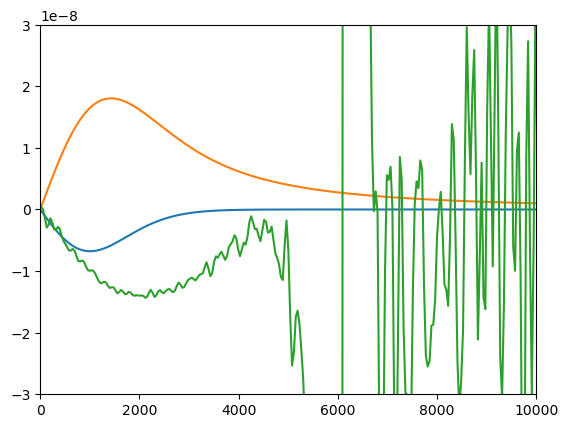

5401 451.0389757184396 0.06276002838224583 1.0001273441802265
5402 451.12248598981864 0.06276771488271683 1.0001273420024857
5403 451.20599626119775 0.0627918780987836 1.0001273245796882
5404 451.2895065325768 0.06281491513398028 1.000127316343356
5405 451.3730168039559 0.06282034901278757 1.0001273029009727
5406 451.456527075335 0.06282661884935177 1.000127297987706
5407 451.5400373467141 0.06284243884874624 1.0001272811193285
5408 451.62354761809314 0.06284963981803084 1.0001272737247053
5409 451.70705788947225 0.06285544111806643 1.0001272621220294
5410 451.7905681608513 0.06287203939186668 1.0001272506761414
5411 451.8740784322304 0.06288218354991049 1.0001272401422112
5412 451.95758870360953 0.06289945939583694 1.0001272281099456
5413 452.0410989749886 0.06291524856456868 1.000127217991167
5414 452.1246092463677 0.06293269172409974 1.0001272061002353
5415 452.20811951774675 0.06295010100636331 1.0001271945007875
5416 452.29162978912586 0.06295673371247051 1.0001271846930269
5417 4

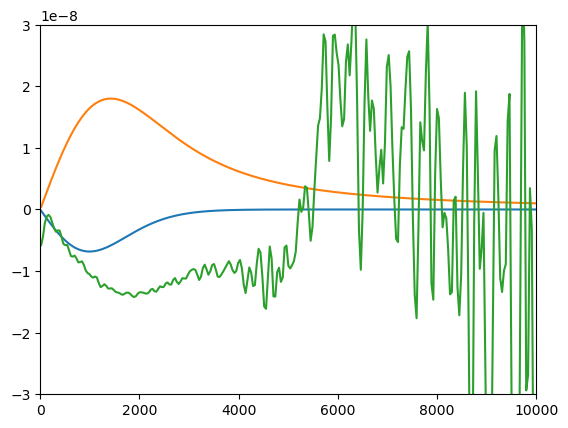

5501 459.3900028563481 0.06282139533839194 1.000126678645946
5502 459.4735131277272 0.06280097130944752 1.0001266775755073
5503 459.55702339910624 0.06277676077211508 1.000126672763766
5504 459.64053367048535 0.06275704353988444 1.0001266732056522
5505 459.7240439418644 0.06273463868648964 1.0001266638112887
5506 459.8075542132435 0.06269331032354332 1.000126670885729
5507 459.89106448462263 0.06266352165573769 1.0001266642163416
5508 459.9745747560017 0.06263394163510597 1.000126667928921
5509 460.0580850273808 0.06260445084465655 1.0001266628813437
5510 460.14159529875985 0.06258159751257497 1.0001266635559638
5511 460.22510557013896 0.06254666160663226 1.0001266626238268
5512 460.308615841518 0.06251718470994239 1.0001266617441351
5513 460.39212611289713 0.06248617258073133 1.0001266559885842
5514 460.4756363842762 0.06245531240995938 1.000126657505453
5515 460.5591466556553 0.06242173817383855 1.000126653235249
5516 460.64265692703435 0.06238216884031274 1.000126653270893
5517 460.

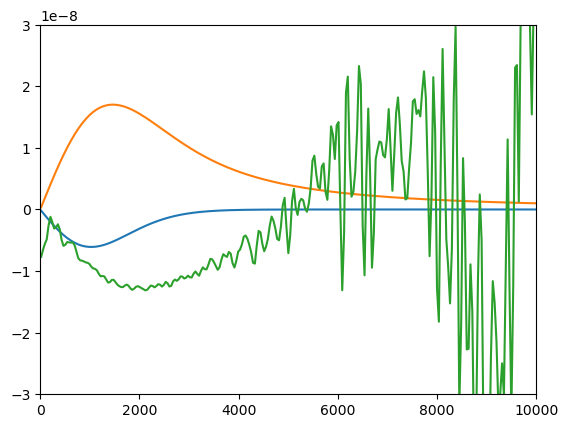

5601 467.7410299942566 0.06019500845774866 1.0001261690198244
5602 467.82454026563573 0.06016898900654152 1.0001261709859293
5603 467.9080505370148 0.060156284469502413 1.0001261619332849
5604 467.9915608083939 0.06013158820935278 1.000126162310217
5605 468.07507107977295 0.060109332450505745 1.0001261550344178
5606 468.15858135115207 0.06009629181674727 1.0001261536544073
5607 468.2420916225311 0.060082491461547746 1.0001261449775292
5608 468.32560189391023 0.060062325898832515 1.0001261437737359
5609 468.4091121652893 0.06004610419421617 1.0001261379321833
5610 468.4926224366684 0.06003121485479078 1.000126142181285
5611 468.57613270804745 0.0600110549621082 1.0001261370758614
5612 468.65964297942656 0.05999899358849679 1.0001261394130172
5613 468.7431532508056 0.059980902659037806 1.000126130702181
5614 468.82666352218473 0.05995819724420536 1.0001261346189487
5615 468.9101737935638 0.05994639340008423 1.0001261279467626
5616 468.9936840649429 0.05993158173627873 1.0001261303827347


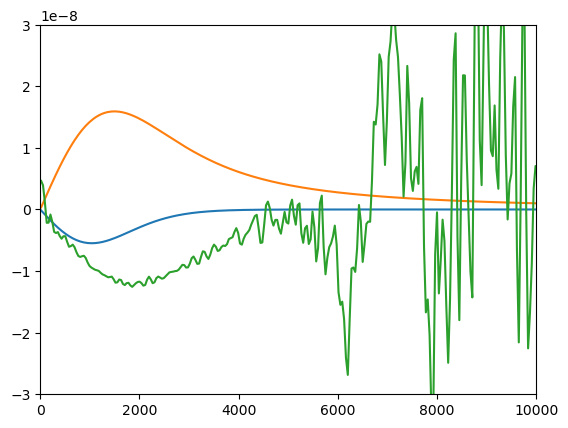

5701 476.09205713216517 0.05769018988202593 1.0001268496095361
5702 476.1755674035442 0.0576548526958382 1.0001268643044172
5703 476.25907767492333 0.05761628225206405 1.000126877219857
5704 476.3425879463024 0.05756342570868545 1.0001268962830547
5705 476.4260982176815 0.05752498547326563 1.0001269036725762
5706 476.50960848906055 0.05748891757830152 1.0001269166291449
5707 476.59311876043967 0.057443649079075745 1.0001269271673017
5708 476.6766290318187 0.05740007393426189 1.000126943889487
5709 476.76013930319783 0.0573624888575243 1.000126954967607
5710 476.84364957457694 0.057329833334649916 1.0001269686430454
5711 476.927159845956 0.057285740570186275 1.0001269766606382
5712 477.0106701173351 0.057244631104272255 1.000126990968212
5713 477.09418038871416 0.05720566698587515 1.0001269989243418
5714 477.1776906600933 0.05716356959355252 1.0001270176143562
5715 477.26120093147233 0.05712298508569014 1.00012702602117
5716 477.34471120285144 0.0570838158303108 1.0001270414686523
5717 

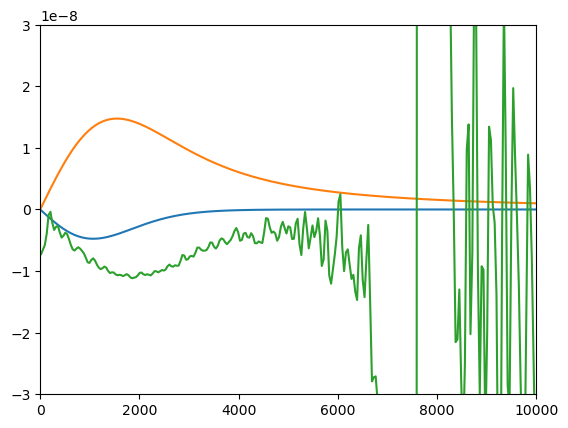

5801 484.44308427007365 0.05466738372511486 1.0001275006506716
5802 484.52659454145277 0.05464405343987326 1.000127501317843
5803 484.6101048128318 0.05462348485305546 1.0001275037696031
5804 484.69361508421093 0.05460017146608285 1.0001275092132214
5805 484.77712535559004 0.05457421898932927 1.0001275127365847
5806 484.8606356269691 0.05455325701888545 1.0001275176987845
5807 484.9441458983482 0.05452712465826657 1.0001275178884295
5808 485.02765616972727 0.05449714979231654 1.000127525761378
5809 485.1111664411064 0.05447718043308395 1.0001275252050155
5810 485.19467671248543 0.054448067933207146 1.0001275344455687
5811 485.27818698386454 0.05442497239043365 1.000127535055331
5812 485.3616972552436 0.054398382516528676 1.0001275440983755
5813 485.4452075266227 0.05437478003879363 1.00012754486069
5814 485.52871779800176 0.0543632930852381 1.0001275499845337
5815 485.6122280693809 0.05432415346249361 1.0001275558247746
5816 485.69573834075993 0.05430428213619528 1.0001275627785855
581

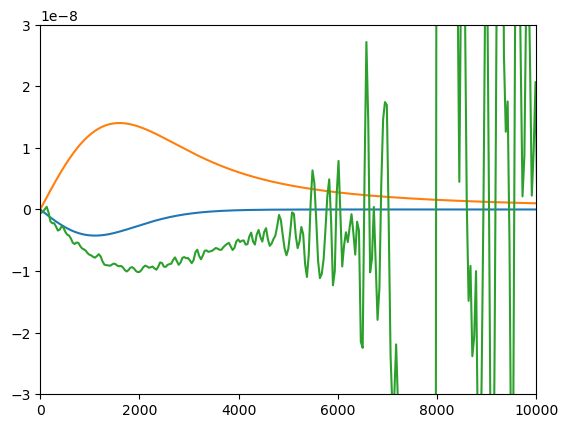

5901 492.7941114079822 0.05246738712092987 1.0001281354834743
5902 492.8776216793613 0.05244863059136411 1.0001281377849243
5903 492.96113195074037 0.052424045279112395 1.0001281463784377
5904 493.0446422221195 0.05241022787096543 1.0001281486055584
5905 493.12815249349853 0.05239688721673846 1.0001281530740012
5906 493.21166276487764 0.052379603724188185 1.0001281574933047
5907 493.2951730362567 0.05236674935792784 1.0001281606647838
5908 493.3786833076358 0.05235314753679293 1.000128164524176
5909 493.46219357901487 0.05233185269927892 1.000128168074901
5910 493.545703850394 0.05230868103650608 1.0001281747954598
5911 493.62921412177303 0.05229812094473717 1.000128175336912
5912 493.71272439315214 0.05229466636768104 1.0001281796698205
5913 493.7962346645312 0.05228150133709622 1.0001281802382702
5914 493.8797449359103 0.052266281855292814 1.0001281870070022
5915 493.9632552072894 0.052261838956551857 1.0001281847768306
5916 494.0467654786685 0.05225597692788459 1.000128190324183
591

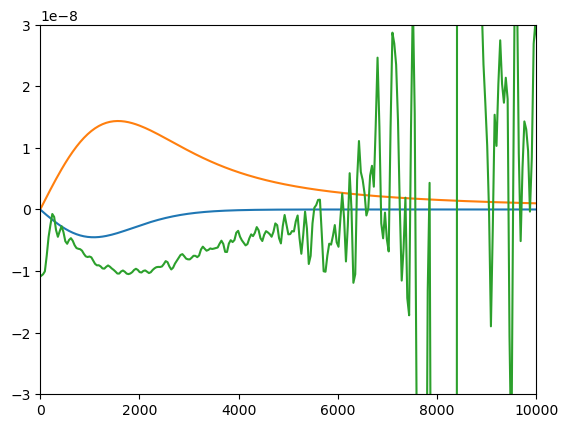

6001 501.14513854589075 0.053661037776844764 1.0001278629729897
6002 501.2286488172698 0.05369378323858901 1.0001278529626079
6003 501.3121590886489 0.05371781634301241 1.000127852737649
6004 501.39566936002797 0.05373683031644093 1.0001278466271133
6005 501.4791796314071 0.05376553812651541 1.000127843894976
6006 501.56268990278613 0.053790495592601115 1.0001278390876136
6007 501.64620017416524 0.053820384331166315 1.000127838071119
6008 501.7297104455443 0.05385229331952056 1.0001278315210202
6009 501.8132207169234 0.05388224318546142 1.0001278296492173
6010 501.8967309883025 0.053923897841746504 1.0001278237091091
6011 501.9802412596816 0.053950371195030385 1.0001278211704934
6012 502.0637515310607 0.05397582091942401 1.0001278173766848
6013 502.14726180243974 0.05400560033465248 1.0001278106310276
6014 502.23077207381886 0.05403399193469208 1.0001278102660083
6015 502.3142823451979 0.05407443628358891 1.000127800592414
6016 502.397792616577 0.054100742324246415 1.0001278018141297
6

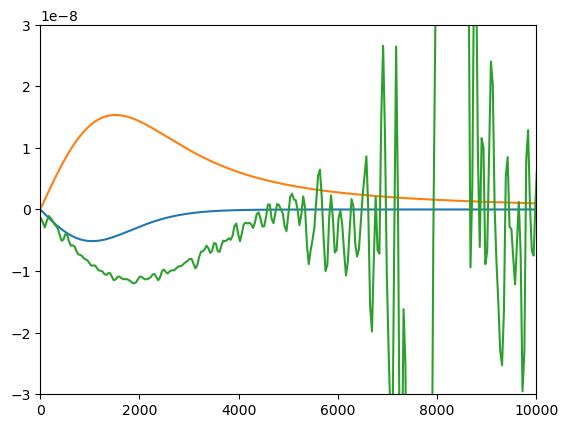

6101 509.49616568379923 0.056308778484330066 1.0001276305025946
6102 509.57967595517835 0.05633842712331431 1.0001276182430496
6103 509.6631862265574 0.05635638278209327 1.0001276214592527
6104 509.7466964979365 0.056369508612621515 1.0001276148742344
6105 509.8302067693156 0.05639414332665056 1.000127614969377
6106 509.9137170406947 0.056424838197228364 1.0001276049298253
6107 509.9972273120738 0.05643668279304425 1.0001276048004166
6108 510.08073758345284 0.05645431670526492 1.0001275977509454
6109 510.16424785483196 0.05648199455044758 1.0001275936299698
6110 510.247758126211 0.05649335797798193 1.0001275913277115
6111 510.3312683975901 0.05651154722686378 1.0001275861455656
6112 510.4147786689692 0.056530140234935446 1.0001275808889907
6113 510.4982889403483 0.05654676637454094 1.000127574361384
6114 510.58179921172734 0.056564611806341494 1.0001275698381553
6115 510.66530948310645 0.05657111750425675 1.0001275648816512
6116 510.7488197544855 0.05658513135826609 1.0001275627184705


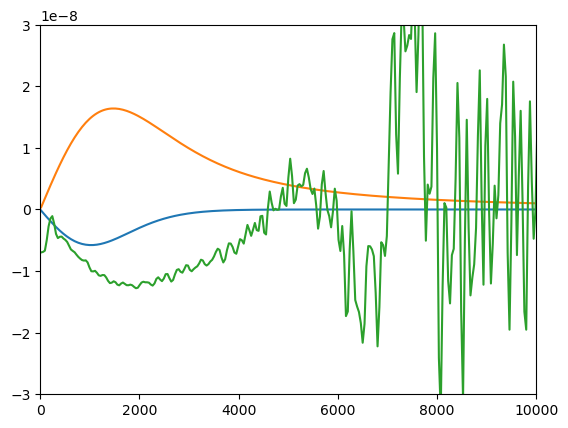

6201 517.8471928217078 0.05897365482659067 1.0001265521765066
6202 517.9307030930869 0.05901208256730315 1.0001265337139993
6203 518.014213364466 0.059044514930571224 1.000126527676422
6204 518.097723635845 0.059073887823455594 1.0001265134066666
6205 518.1812339072242 0.059106693191160464 1.0001265079816866
6206 518.2647441786032 0.05913778661370686 1.0001264951368982
6207 518.3482544499823 0.059167280809836686 1.0001264896370001
6208 518.4317647213613 0.05919043535137911 1.0001264784603017
6209 518.5152749927405 0.05922105111422755 1.0001264717200549
6210 518.5987852641196 0.059246192876875416 1.00012646011213
6211 518.6822955354986 0.05926434883090602 1.000126458420798
6212 518.7658058068778 0.059297366443321224 1.0001264464355495
6213 518.8493160782568 0.059329546642291925 1.000126440014503
6214 518.9328263496359 0.059352761915780795 1.0001264332353497
6215 519.016336621015 0.059379999716793974 1.0001264229061608
6216 519.0998468923941 0.05939975143760523 1.0001264140781643
6217 51

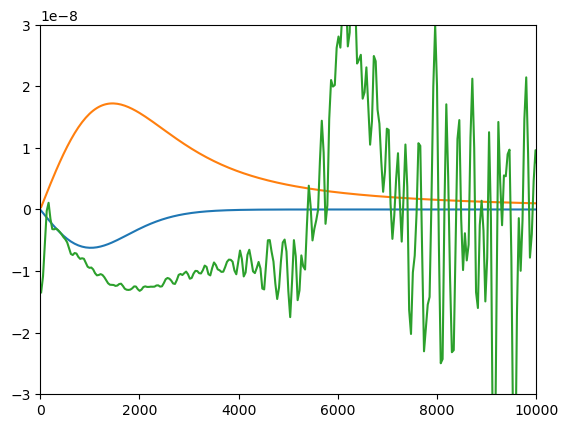

6301 526.1982199596163 0.060753496790858286 1.0001264047768947
6302 526.2817302309954 0.06077247600207149 1.0001264052607943
6303 526.3652405023745 0.060781609195780066 1.0001264217902759
6304 526.4487507737535 0.06079929149681074 1.0001264242270194
6305 526.5322610451326 0.060823349761074515 1.0001264331580058
6306 526.6157713165118 0.06082237581230679 1.0001264397007301
6307 526.6992815878908 0.06082282924636168 1.0001264590714702
6308 526.7827918592699 0.060838528385263414 1.0001264611053615
6309 526.866302130649 0.060847742373869994 1.000126475134393
6310 526.9498124020281 0.06085065550691423 1.0001264788483342
6311 527.0333226734072 0.06085667313051226 1.0001264931631115
6312 527.1168329447862 0.060870564573378715 1.0001264958315177
6313 527.2003432161654 0.06089092497036081 1.0001265079127093
6314 527.2838534875444 0.06089862421391356 1.000126511264473
6315 527.3673637589235 0.06090453998154411 1.0001265257913576
6316 527.4508740303025 0.060922729638217384 1.0001265291407822
6317

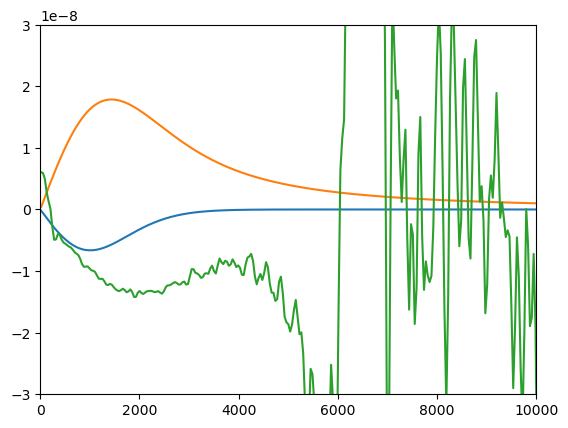

6401 534.5492470975248 0.06229379719432305 1.0001267892168162
6402 534.632757368904 0.06231449853841043 1.000126784145092
6403 534.716267640283 0.06233847995564617 1.000126784097424
6404 534.7997779116621 0.06236389350559607 1.0001267735791748
6405 534.8832881830411 0.06238513770776396 1.0001267771982782
6406 534.9667984544203 0.06240796831325975 1.000126763755624
6407 535.0503087257994 0.06243496440518262 1.0001267640213016
6408 535.1338189971784 0.06246053274223777 1.0001267504491904
6409 535.2173292685575 0.06247495538202945 1.0001267572962802
6410 535.3008395399366 0.06250308356387588 1.0001267442486357
6411 535.3843498113157 0.06253428002903268 1.0001267470716748
6412 535.4678600826948 0.06254921306882456 1.0001267360608443
6413 535.5513703540738 0.06257206085202587 1.0001267383393406
6414 535.634880625453 0.06260261905972729 1.0001267248702568
6415 535.718390896832 0.06261871885891764 1.0001267308659874
6416 535.8019011682111 0.06264241789663764 1.0001267201068043
6417 535.885411

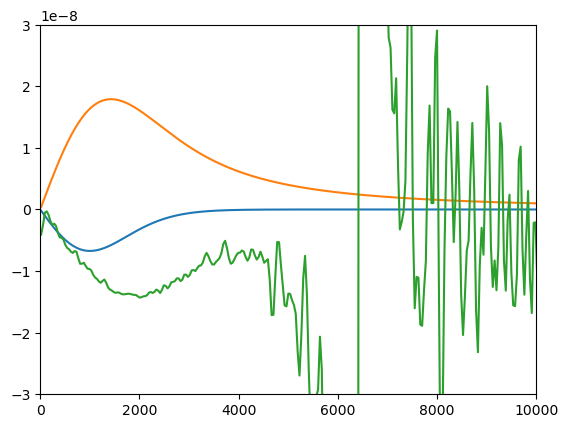

6501 542.9002742354334 0.06250459371882931 1.0001267546986328
6502 542.9837845068124 0.062487466903817276 1.0001267548880284
6503 543.0672947781916 0.062462324419886854 1.0001267610451305
6504 543.1508050495706 0.062435338832698556 1.0001267594774168
6505 543.2343153209497 0.06240789152432751 1.0001267696586258
6506 543.3178255923287 0.062380161440463176 1.0001267705575756
6507 543.4013358637079 0.06235240567058407 1.0001267807264191
6508 543.484846135087 0.06232942762480496 1.000126778963888
6509 543.568356406466 0.062305793839632057 1.0001267894671118
6510 543.6518666778451 0.062291139181983764 1.0001267866103842
6511 543.7353769492242 0.062262640095689076 1.0001267977353263
6512 543.8188872206033 0.062219665836817754 1.0001268022514682
6513 543.9023974919824 0.06220681302154581 1.0001268078056194
6514 543.9859077633615 0.062192525027585294 1.000126807900727
6515 544.0694180347406 0.06216992214965764 1.000126821633081
6516 544.1529283061196 0.06214764944524607 1.000126819092894
6517 

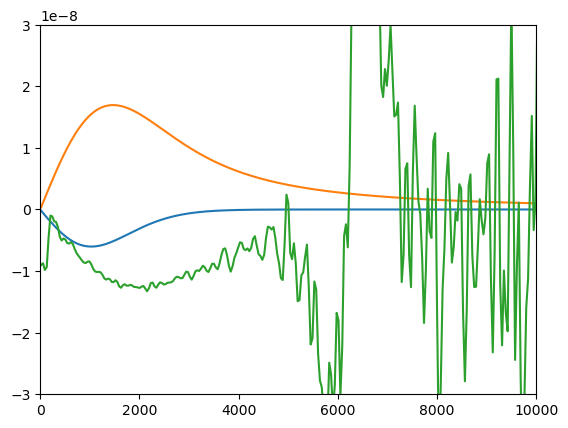

6601 551.2513013733419 0.059974070421439825 1.0001276514965218
6602 551.334811644721 0.05993865482924443 1.0001276646876651
6603 551.4183219161 0.05992242492402028 1.0001276686328842
6604 551.5018321874792 0.05988936188053125 1.0001276810723203
6605 551.5853424588582 0.05986534112051717 1.0001276870195654
6606 551.6688527302373 0.05985426133346565 1.0001276925535925
6607 551.7523630016165 0.05983386873303425 1.0001277031816906
6608 551.8358732729955 0.0598145310005781 1.0001277084583589
6609 551.9193835443746 0.0597868243403799 1.0001277192809797
6610 552.0028938157536 0.05976100036063963 1.0001277249871534
6611 552.0864040871328 0.059742249238845455 1.0001277346282886
6612 552.1699143585118 0.05971358640588483 1.0001277397705295
6613 552.2534246298909 0.059686917886435154 1.0001277513032634
6614 552.33693490127 0.05966836773030495 1.0001277531418764
6615 552.4204451726491 0.05965492797241708 1.0001277646575806
6616 552.5039554440282 0.05963800557198147 1.0001277650061007
6617 552.5874

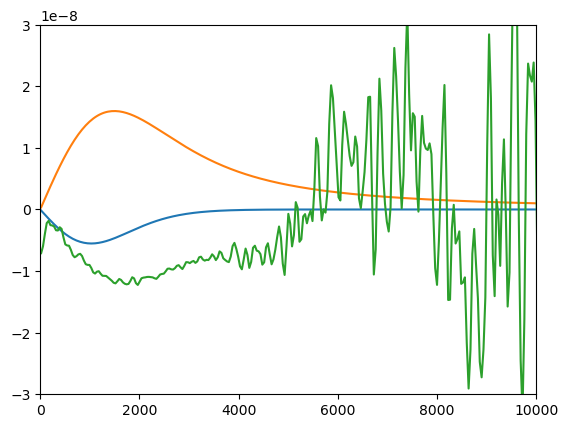

6701 559.6023285112504 0.05788777090132417 1.000127991045344
6702 559.6858387826295 0.05785690908247206 1.0001279974605493
6703 559.7693490540086 0.05783247202299505 1.0001279922964943
6704 559.8528593253877 0.05780533276061561 1.0001279979236297
6705 559.9363695967668 0.05777813534262964 1.0001279933300422
6706 560.0198798681458 0.05773680992854841 1.0001279993750023
6707 560.1033901395249 0.05770149025120784 1.0001279979186573
6708 560.1869004109041 0.05766715267533583 1.0001279996511092
6709 560.2704106822831 0.05762713538182974 1.0001280018077752
6710 560.3539209536622 0.05759184472978527 1.0001280011039353
6711 560.4374312250412 0.057553513176269507 1.0001280043951322
6712 560.5209414964204 0.057515993020408634 1.0001280027916815
6713 560.6044517677994 0.05748006804602396 1.0001280074413519
6714 560.6879620391785 0.05745027674389488 1.00012800288102
6715 560.7714723105577 0.057410280655032224 1.0001280090210662
6716 560.8549825819367 0.05736827712789278 1.0001280065475255
6717 560

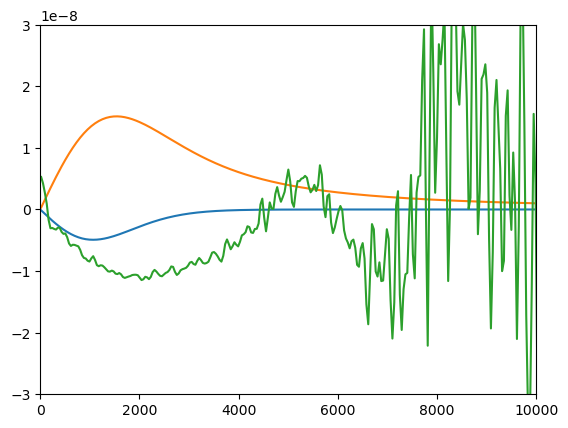

6801 567.953355649159 0.05547086055911898 1.000128075687004
6802 568.036865920538 0.055463920900083744 1.000128081170923
6803 568.1203761919171 0.055460221304721 1.0001280764700395
6804 568.2038864632962 0.0554590600653317 1.0001280793794127
6805 568.2873967346753 0.05545111633325837 1.0001280760443736
6806 568.3709070060544 0.05544278974943126 1.000128079553318
6807 568.4544172774334 0.055442968899579455 1.0001280760611633
6808 568.5379275488125 0.05544431038151871 1.0001280764776788
6809 568.6214378201917 0.055434426339134195 1.0001280755032982
6810 568.7049480915707 0.05541560018151173 1.0001280786946645
6811 568.7884583629498 0.05542242267921634 1.0001280758993378
6812 568.8719686343289 0.05542643691438076 1.0001280722608255
6813 568.955478905708 0.05541047647484192 1.0001280764763967
6814 569.038989177087 0.055412409277167896 1.000128070214765
6815 569.1224994484661 0.055410982096942514 1.0001280724987387
6816 569.2060097198453 0.05541313117040087 1.000128066768311
6817 569.289519

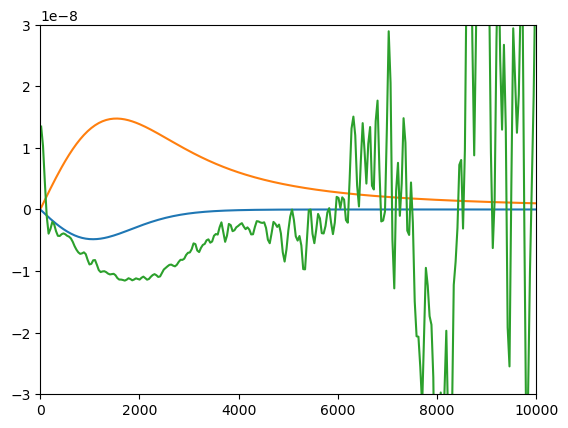

6901 576.3043827870674 0.054872224108573314 1.0001275661313784
6902 576.3878930584466 0.05486167822911091 1.0001275624730854
6903 576.4714033298256 0.05485197861501971 1.000127553419368
6904 576.5549136012047 0.054839281809887314 1.0001275496651083
6905 576.6384238725839 0.054830260420931344 1.000127540722325
6906 576.7219341439629 0.05483758554500531 1.0001275309090025
6907 576.805444415342 0.05483251100752164 1.0001275231764435
6908 576.888954686721 0.0548251779256773 1.0001275168607036
6909 576.9724649581002 0.05481275946669153 1.0001275097842988
6910 577.0559752294793 0.05480769480280424 1.0001275013932958
6911 577.1394855008583 0.054808792054843576 1.0001274923109007
6912 577.2229957722374 0.05480364029523806 1.000127486433915
6913 577.3065060436165 0.05479403044848452 1.000127478477677
6914 577.3900163149956 0.054781020068420665 1.0001274729509417
6915 577.4735265863746 0.05477777335617683 1.000127463021511
6916 577.5570368577537 0.054771762889591395 1.0001274557120048
6917 577.6

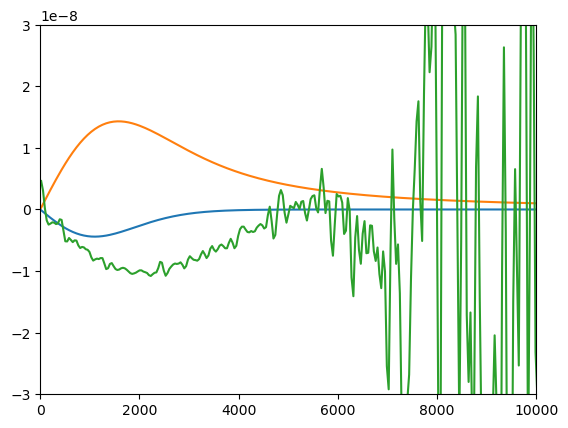

7001 584.655409924976 0.05320821715734043 1.0001269255529437
7002 584.7389201963551 0.053188931335041816 1.0001269236432484
7003 584.8224304677342 0.05318042002636148 1.0001269178762207
7004 584.9059407391132 0.05317962742596692 1.0001269129180221
7005 584.9894510104923 0.053155953439864366 1.0001269081963993
7006 585.0729612818715 0.05313019368151302 1.0001269076852743
7007 585.1564715532505 0.053126401280819885 1.000126900230289
7008 585.2399818246296 0.05311061982253691 1.00012689893313
7009 585.3234920960086 0.05309803779372205 1.000126891411261
7010 585.4070023673878 0.05309612116065805 1.0001268890623085
7011 585.4905126387669 0.053083956642302074 1.0001268855245575
7012 585.5740229101459 0.05307837405299068 1.000126882955894
7013 585.6575331815251 0.05307515282224485 1.000126876596468
7014 585.7410434529041 0.05306614935253843 1.0001268752216024
7015 585.8245537242832 0.053052460904264284 1.0001268726850734
7016 585.9080639956622 0.053042142978013275 1.0001268730263695
7017 585.

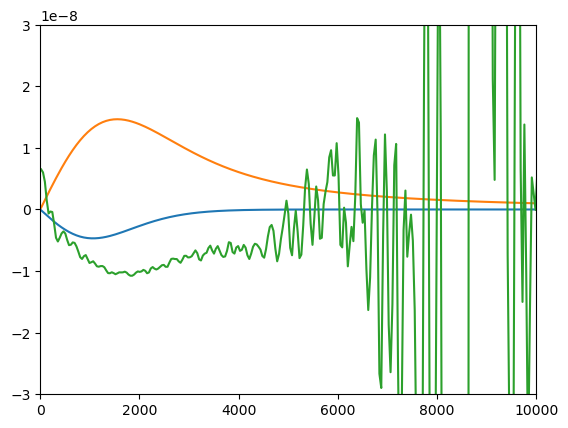

7101 593.0064370628845 0.05444968835829126 1.0001272224206266
7102 593.0899473342636 0.054485985338472286 1.0001272254537499
7103 593.1734576056427 0.05451260889533054 1.0001272282076097
7104 593.2569678770218 0.054534854755013705 1.000127235704231
7105 593.3404781484008 0.0545593970121557 1.0001272394644531
7106 593.4239884197799 0.05458922574540424 1.0001272457896657
7107 593.5074986911591 0.05461859978047087 1.0001272474422214
7108 593.5910089625381 0.05463867774393517 1.0001272556169327
7109 593.6745192339172 0.054658730212781656 1.0001272600614808
7110 593.7580295052963 0.05468466933847768 1.0001272676910595
7111 593.8415397766754 0.05470401943173428 1.0001272691012233
7112 593.9250500480545 0.05472818976541271 1.0001272776932184
7113 594.0085603194335 0.05476263488922258 1.0001272770372207
7114 594.0920705908127 0.05477613947164102 1.0001272855423107
7115 594.1755808621917 0.054792662905844294 1.0001272895606288
7116 594.2590911335708 0.05481724565295995 1.0001272948799744
7117 5

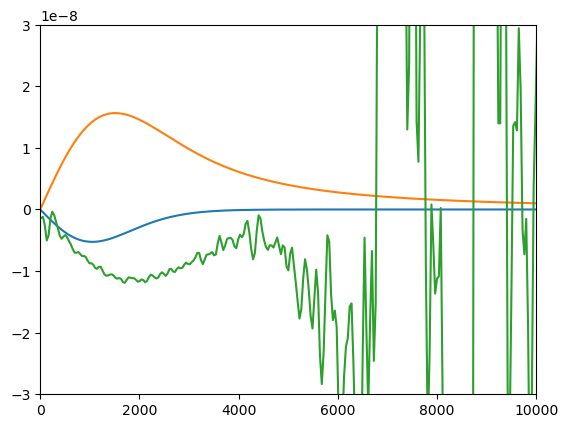

7201 601.3574642007931 0.056916732672321335 1.0001270671484448
7202 601.4409744721721 0.05695447258144845 1.0001270616937186
7203 601.5244847435513 0.05699952712277384 1.0001270524040506
7204 601.6079950149303 0.05702204338901 1.0001270483222227
7205 601.6915052863094 0.057058910000853155 1.0001270427567126
7206 601.7750155576884 0.05709720052370014 1.0001270364237063
7207 601.8585258290676 0.057115836389394756 1.0001270317588322
7208 601.9420361004467 0.057157543160961534 1.0001270235793567
7209 602.0255463718257 0.05719368985180812 1.0001270137774898
7210 602.1090566432048 0.05721602526495782 1.0001270113916738
7211 602.192566914584 0.05725272404850596 1.0001270011178358
7212 602.276077185963 0.057288687162387227 1.00012699613655
7213 602.3595874573421 0.05731570188132063 1.000126990597916
7214 602.4430977287211 0.05734652309793494 1.000126986114838
7215 602.5266080001003 0.05737877467844103 1.0001269793632461
7216 602.6101182714793 0.05741613461197992 1.0001269729169622
7217 602.693

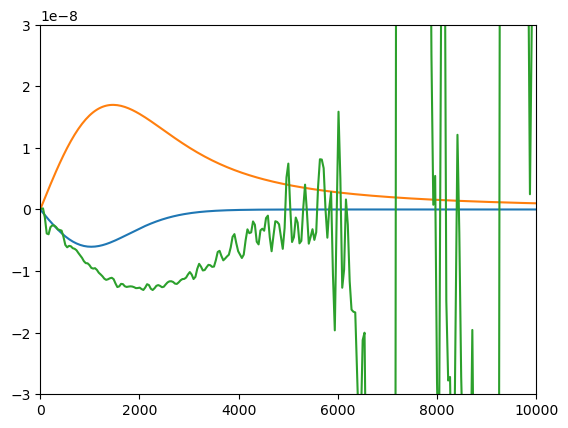

7301 609.7084913387016 0.06013395223693026 1.0001265492229887
7302 609.7920016100807 0.06017103101485695 1.0001265446741439
7303 609.8755118814597 0.0602110769440162 1.000126538691899
7304 609.9590221528389 0.060243650852707734 1.000126529554055
7305 610.0425324242179 0.06028288015154502 1.000126519616076
7306 610.126042695597 0.060315638789435605 1.0001265136214532
7307 610.209552966976 0.06035075007045791 1.000126506837196
7308 610.2930632383552 0.06039135145788551 1.000126497344425
7309 610.3765735097343 0.060423840206643806 1.0001264917401183
7310 610.4600837811133 0.0604667590433369 1.0001264832433905
7311 610.5435940524925 0.06050079860167022 1.0001264790924076
7312 610.6271043238715 0.06054125892747135 1.0001264764244104
7313 610.7106145952506 0.06058131642017089 1.000126471710897
7314 610.7941248666297 0.06061589235146167 1.0001264719699734
7315 610.8776351380088 0.060663583475970353 1.0001264618400623
7316 610.9611454093879 0.06070198783785373 1.0001264596519042
7317 611.04465

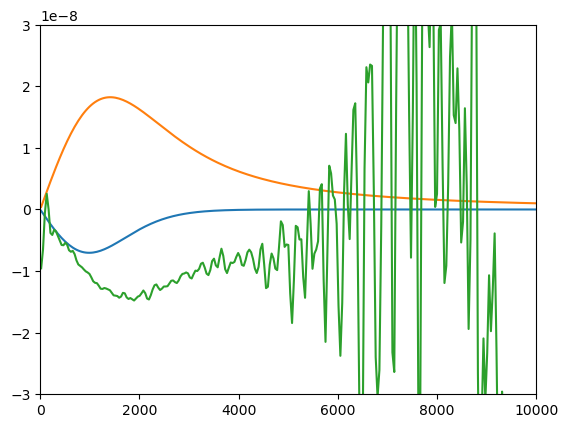

7401 618.0595184766102 0.0635229915166788 1.0001265573209694
7402 618.1430287479892 0.06352372095997208 1.0001265651539495
7403 618.2265390193683 0.06352555368180762 1.0001265786078977
7404 618.3100492907473 0.06352960397407448 1.0001265862762883
7405 618.3935595621265 0.06352932733447081 1.0001265966882207
7406 618.4770698335055 0.06353985711519705 1.0001266071632988
7407 618.5605801048846 0.06354343449281663 1.000126621099718
7408 618.6440903762638 0.06354394256338494 1.0001266344061401
7409 618.7276006476428 0.06355622652412367 1.0001266421097685
7410 618.8111109190219 0.06355904690519816 1.0001266551591195
7411 618.8946211904009 0.0635584327507777 1.0001266680737193
7412 618.9781314617801 0.06355511799928248 1.0001266821204196
7413 619.0616417331591 0.06355732234715683 1.0001266942301692
7414 619.1451520045382 0.06355927023008652 1.0001267058946095
7415 619.2286622759173 0.06354811575838558 1.0001267202240993
7416 619.3121725472964 0.06354073200214588 1.0001267363757507
7417 619.39

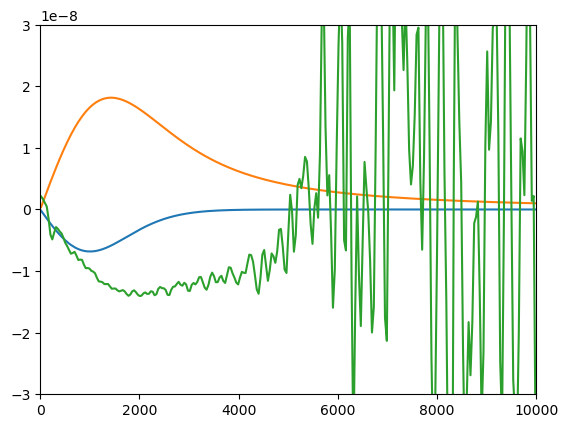

7501 626.4105456145187 0.06294522323969189 1.0001274320636917
7502 626.4940558858978 0.06292840560740254 1.0001274328368916
7503 626.5775661572768 0.06291776378378884 1.00012743832103
7504 626.6610764286559 0.06290607970890594 1.0001274383596963
7505 626.744586700035 0.06289523824715905 1.00012744590937
7506 626.8280969714141 0.0628927037489427 1.000127442377105
7507 626.9116072427931 0.06287645051263835 1.000127450832981
7508 626.9951175141722 0.06286762981527591 1.000127451782005
7509 627.0786277855514 0.06286494164526286 1.0001274561805371
7510 627.1621380569304 0.06285568646717635 1.0001274587179483
7511 627.2456483283095 0.0628524038757174 1.0001274614736346
7512 627.3291585996885 0.06284130622167068 1.0001274638938444
7513 627.4126688710677 0.06283661616469008 1.0001274647828313
7514 627.4961791424467 0.06282969209181044 1.0001274675581573
7515 627.5796894138258 0.06281979946501502 1.0001274696397986
7516 627.663199685205 0.06281429372469217 1.0001274710407617
7517 627.7467099565

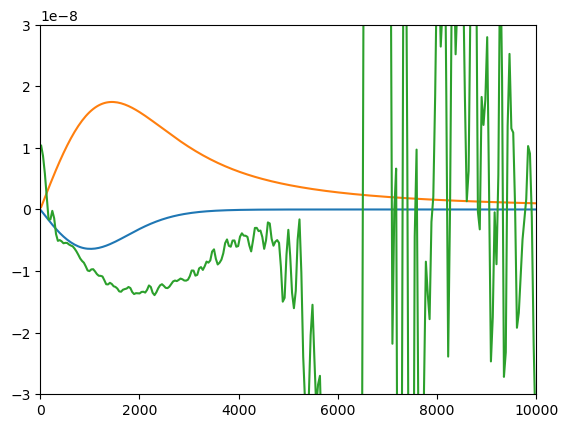

7601 634.7615727524271 0.061316436694631306 1.0001276750391228
7602 634.8450830238063 0.061288112636944954 1.0001276753124142
7603 634.9285932951854 0.06126421370240563 1.0001276806205792
7604 635.0121035665644 0.06124385237486858 1.000127677006006
7605 635.0956138379435 0.06121523284267966 1.000127683012407
7606 635.1791241093226 0.06118856454803978 1.000127681658224
7607 635.2626343807017 0.06116702500612651 1.0001276860728807
7608 635.3461446520807 0.06114916240948698 1.000127682252092
7609 635.4296549234599 0.06112525278189612 1.0001276858823491
7610 635.513165194839 0.061093063758085986 1.0001276868053075
7611 635.596675466218 0.06106110252926949 1.0001276908843681
7612 635.6801857375971 0.06103383026580374 1.0001276900704208
7613 635.7636960089762 0.061008639144063494 1.000127692103534
7614 635.8472062803553 0.06098533279226326 1.000127693302625
7615 635.9307165517343 0.06096552834024287 1.0001276926100207
7616 636.0142268231134 0.06093774930707567 1.0001276942068713
7617 636.097

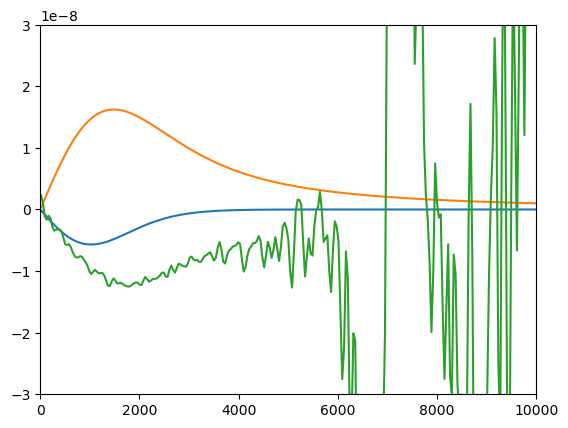

7701 643.1125998903357 0.05851262685162492 1.000127639291155
7702 643.1961101617147 0.05846911406212618 1.0001276368259342
7703 643.2796204330939 0.05842395688426778 1.000127644164497
7704 643.363130704473 0.05838714587525417 1.000127642160441
7705 643.446640975852 0.05834542912687883 1.0001276496466822
7706 643.5301512472312 0.05828964723864872 1.0001276502516498
7707 643.6136615186102 0.058241129872296654 1.0001276573137716
7708 643.6971717899893 0.058194093656511084 1.000127657044381
7709 643.7806820613683 0.058151005478959225 1.000127664141851
7710 643.8641923327475 0.05809445647963659 1.0001276635604002
7711 643.9477026041266 0.05803772816241051 1.000127675066756
7712 644.0312128755056 0.058006932822719605 1.0001276711294222
7713 644.1147231468847 0.05796297900365352 1.000127678389441
7714 644.1982334182638 0.05789946988217811 1.0001276804822652
7715 644.2817436896429 0.05784767270473164 1.0001276889393251
7716 644.365253961022 0.0578038195127695 1.0001276891968767
7717 644.448764

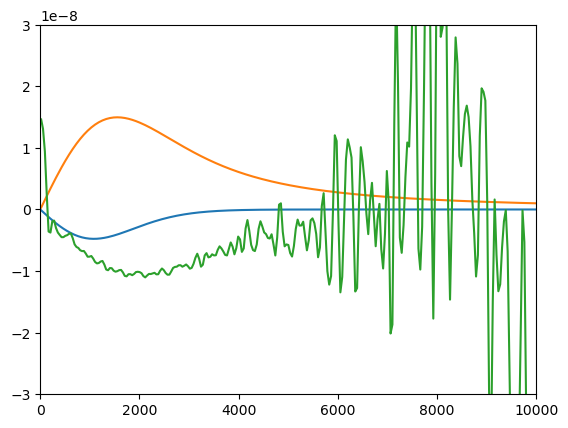

7801 651.4636270282442 0.05487623023684504 1.000128095173672
7802 651.5471372996233 0.05485752745789133 1.0001280963266483
7803 651.6306475710024 0.05483852633263824 1.0001281021686925
7804 651.7141578423815 0.05481530581885303 1.000128101424963
7805 651.7976681137606 0.0547965923415636 1.0001281103066657
7806 651.8811783851396 0.054800219567681364 1.0001281036519265
7807 651.9646886565188 0.05478728522320142 1.0001281126724895
7808 652.0481989278978 0.054778653194144745 1.000128108597949
7809 652.1317091992769 0.05477511577686298 1.0001281141050273
7810 652.2152194706559 0.05476280443100833 1.0001281119567744
7811 652.2987297420351 0.05475089541176531 1.0001281180893529
7812 652.3822400134142 0.05473748342882377 1.0001281157407849
7813 652.4657502847932 0.05472349562024922 1.0001281211971693
7814 652.5492605561724 0.054702785415665554 1.000128120993656
7815 652.6327708275514 0.0547004983698789 1.0001281242432298
7816 652.7162810989305 0.05469858145799106 1.0001281211933382
7817 652.79

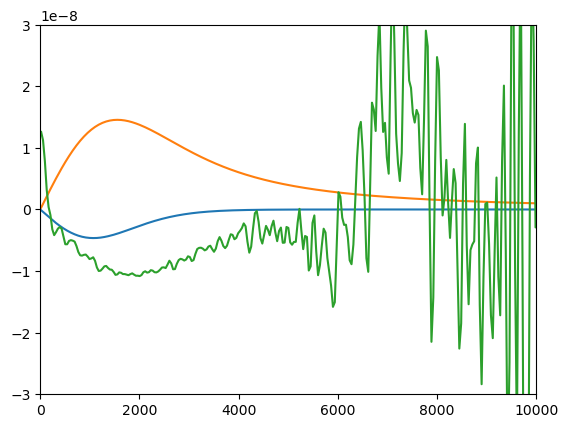

7901 659.8146541661528 0.05418888751534033 1.0001280635979208
7902 659.8981644375318 0.054173529000482674 1.0001280610869363
7903 659.9816747089109 0.054150890266961384 1.000128060674377
7904 660.06518498029 0.0541424790865667 1.0001280556517105
7905 660.1486952516691 0.054129559834000585 1.0001280539608708
7906 660.2322055230482 0.05411113098180349 1.0001280502467773
7907 660.3157157944272 0.05410862936624902 1.0001280470301719
7908 660.3992260658064 0.05409390553266591 1.0001280426325105
7909 660.4827363371854 0.05407727055910712 1.0001280449959644
7910 660.5662466085645 0.05408803245381403 1.0001280334916196
7911 660.6497568799437 0.05407836193378076 1.0001280331169653
7912 660.7332671513227 0.05405481829065433 1.000128026778959
7913 660.8167774227018 0.054044872279029856 1.000128025738988
7914 660.9002876940808 0.05403824832205148 1.0001280175007945
7915 660.98379796546 0.05402838325524838 1.0001280161969226
7916 661.067308236839 0.05400952642164144 1.0001280104370944
7917 661.1508

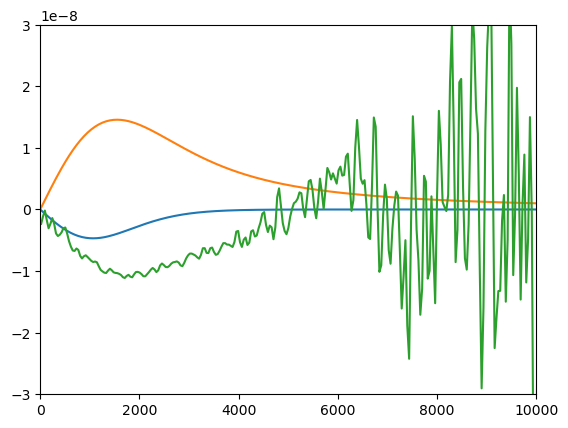

8001 668.1656813040613 0.05434326057764235 1.0001273005985056
8002 668.2491915754404 0.0543498095587553 1.0001272943711885
8003 668.3327018468194 0.054352356605620496 1.0001272874011589
8004 668.4162121181986 0.054355679604717995 1.0001272809755513
8005 668.4997223895776 0.054369249360002356 1.000127272486303
8006 668.5832326609567 0.05438466450242895 1.0001272640210221
8007 668.6667429323358 0.0543958261676717 1.0001272573164521
8008 668.7502532037149 0.054396531390007136 1.0001272485139556
8009 668.833763475094 0.05439080919724482 1.0001272467455178
8010 668.917273746473 0.05440486595355204 1.000127236862019
8011 669.0007840178521 0.05441843442785825 1.0001272300958584
8012 669.0842942892313 0.054420550606252935 1.000127224679518
8013 669.1678045606103 0.05441916150709545 1.000127221231879
8014 669.2513148319894 0.05442174183824579 1.0001272123882858
8015 669.3348251033684 0.05442951875079134 1.00012720433495
8016 669.4183353747476 0.0544270865855247 1.000127198628344
8017 669.501845

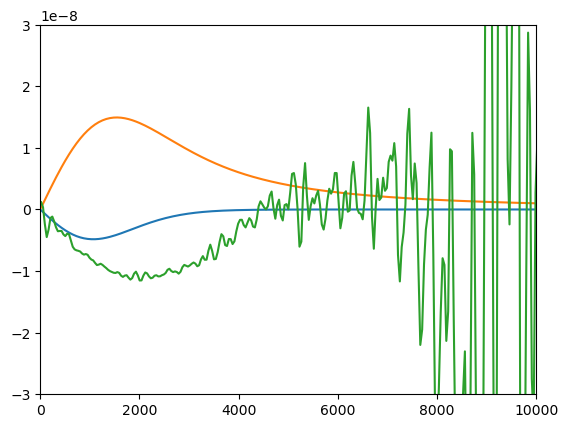

8101 676.5167084419699 0.05508703336203974 1.0001272395979373
8102 676.6002187133489 0.05510046686314876 1.00012724940156
8103 676.683728984728 0.05511829612209727 1.0001272538023216
8104 676.767239256107 0.0551344988589101 1.0001272644115515
8105 676.8507495274862 0.05516179818458719 1.0001272698780461
8106 676.9342597988652 0.05519007186699013 1.0001272776033605
8107 677.0177700702443 0.055204838000640265 1.0001272832960222
8108 677.1012803416234 0.0552197343929274 1.0001272923770603
8109 677.1847906130025 0.05524406507516905 1.0001272966131523
8110 677.2683008843816 0.0552595866907823 1.0001273070244894
8111 677.3518111557606 0.05527343083436798 1.0001273156600836
8112 677.4353214271398 0.05530233192586111 1.0001273223303508
8113 677.5188316985189 0.055320843333264556 1.0001273297871904
8114 677.6023419698979 0.05533105908748934 1.0001273395540065
8115 677.685852241277 0.05535710299465182 1.0001273461418667
8116 677.7693625126561 0.0553898894511253 1.0001273547006364
8117 677.852872

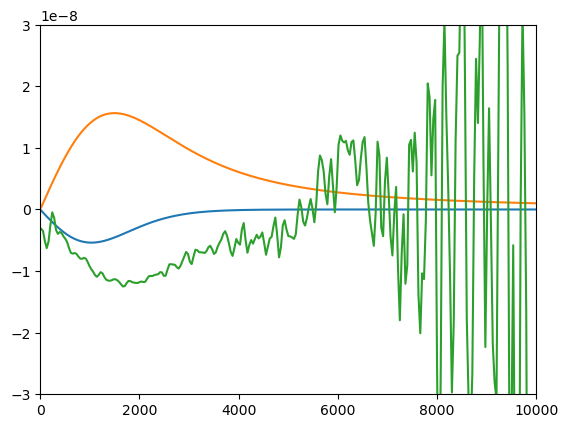

8201 684.8677355798783 0.057268574325507464 1.0001275148865032
8202 684.9512458512575 0.05727982180356148 1.0001275151980566
8203 685.0347561226365 0.057300433642285285 1.0001275086081873
8204 685.1182663940156 0.05730706455248983 1.0001275133234118
8205 685.2017766653946 0.05731143332958122 1.0001275108894905
8206 685.2852869367738 0.057321848567102776 1.0001275129494334
8207 685.3687972081528 0.0573232549125184 1.000127512016426
8208 685.4523074795319 0.0573260279686942 1.000127514796539
8209 685.5358177509111 0.057331195018938325 1.0001275122518645
8210 685.6193280222901 0.05734509402904886 1.0001275139113301
8211 685.7028382936692 0.05735196341689347 1.0001275107917895
8212 685.7863485650482 0.05735521047230846 1.0001275130387273
8213 685.8698588364274 0.05736149460926018 1.0001275097995503
8214 685.9533691078065 0.0573621979010459 1.000127516454053
8215 686.0368793791855 0.057381656680404326 1.0001275120188318
8216 686.1203896505646 0.057384419071078246 1.0001275148459878
8217 686

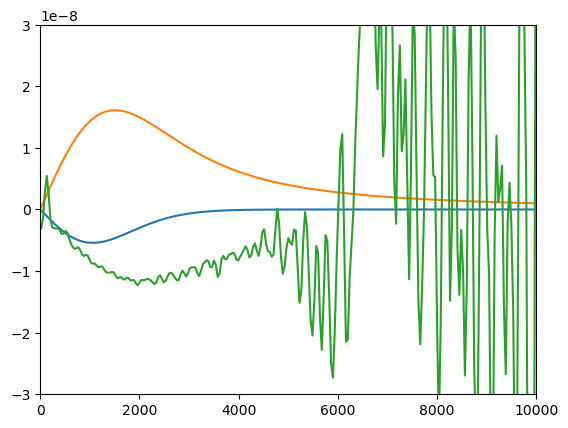

8301 693.2187627177868 0.057702473537937365 1.0001275821679798
8302 693.302272989166 0.05771820140145431 1.000127581209355
8303 693.385783260545 0.057733868577652565 1.000127575857668
8304 693.4692935319241 0.05775980079832086 1.000127573130269
8305 693.5528038033032 0.057792318441210154 1.0001275651823125
8306 693.6363140746823 0.05782095297966666 1.000127564769234
8307 693.7198243460614 0.05784587548831981 1.0001275607383473
8308 693.8033346174404 0.05787008498870936 1.0001275579626179
8309 693.8868448888195 0.05790260079190244 1.0001275486026087
8310 693.9703551601987 0.05793512776731039 1.0001275471662774
8311 694.0538654315777 0.057960837629813106 1.0001275413986201
8312 694.1373757029568 0.05797884722743538 1.0001275415846784
8313 694.2208859743358 0.05801029977572335 1.0001275329741253
8314 694.304396245715 0.05804249792543075 1.0001275308214654
8315 694.387906517094 0.05806320301343807 1.0001275268204017
8316 694.4714167884731 0.05809405962433101 1.0001275236114462
8317 694.554

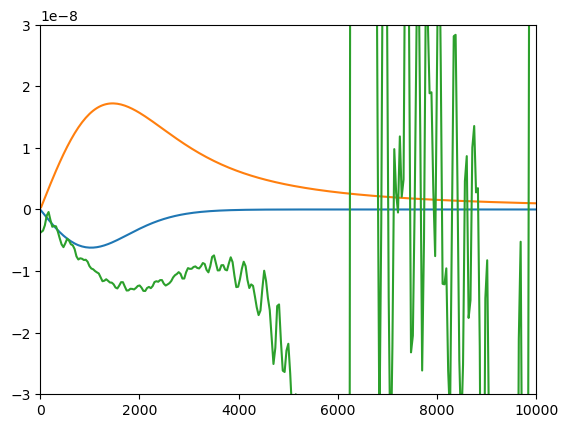

8401 701.5697898556954 0.06071351210482202 1.000126561307394
8402 701.6533001270744 0.060750869123343085 1.0001265401731116
8403 701.7368103984536 0.06077465001880964 1.0001265238963086
8404 701.8203206698327 0.06080550645087618 1.0001265073940497
8405 701.9038309412117 0.06083728334840996 1.000126490087869
8406 701.9873412125908 0.06087024723352341 1.0001264711468334
8407 702.0708514839699 0.060907668679008424 1.0001264469352904
8408 702.154361755349 0.060935865433456436 1.0001264312911475
8409 702.237872026728 0.06097400228452731 1.0001264114227122
8410 702.3213822981072 0.06100664990013349 1.0001264003325445
8411 702.4048925694863 0.061044822056786706 1.0001263809477652
8412 702.4884028408653 0.06108376424739524 1.000126363447922
8413 702.5719131122444 0.06111581605559731 1.000126346287435
8414 702.6554233836235 0.061159293176775806 1.0001263298261724
8415 702.7389336550026 0.06119253740984846 1.000126316373127
8416 702.8224439263817 0.06122618690670798 1.0001263027876526
8417 702.9

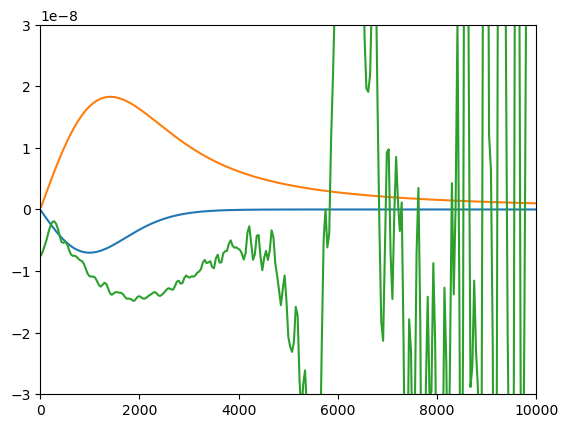

8501 709.9208169936039 0.06351213545621119 1.0001259420857267
8502 710.004327264983 0.06353917749801317 1.0001259424908726
8503 710.087837536362 0.06355790345586812 1.0001259507171383
8504 710.1713478077412 0.063575182005426 1.0001259550844463
8505 710.2548580791203 0.06359041960255464 1.000125967143388
8506 710.3383683504993 0.06360290161455198 1.0001259743701194
8507 710.4218786218785 0.06361678423505167 1.0001259822142705
8508 710.5053888932575 0.0636306904975606 1.000125987376097
8509 710.5888991646366 0.06364894071748517 1.0001259975844545
8510 710.6724094360156 0.0636649204830924 1.0001260031436523
8511 710.7559197073948 0.06367651889118571 1.000126008720015
8512 710.8394299787739 0.06369079709297044 1.000126016590847
8513 710.9229402501529 0.06370304345416647 1.0001260263755938
8514 711.006450521532 0.06372421163614342 1.0001260310080138
8515 711.0899607929111 0.06373356173610284 1.000126037765742
8516 711.1734710642902 0.06373358525637453 1.0001260502207168
8517 711.25698133566

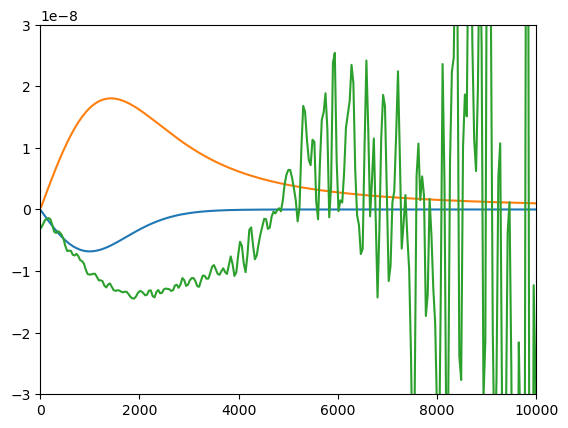

8601 718.2718441315125 0.06278435500200026 1.0001267035127581
8602 718.3553544028915 0.06275312356553264 1.0001267061584667
8603 718.4388646742706 0.06271814671545684 1.0001267190239949
8604 718.5223749456497 0.06268406170642288 1.0001267225355472
8605 718.6058852170288 0.0626491684728069 1.0001267325923413
8606 718.6893954884079 0.06260369163688179 1.0001267379022958
8607 718.7729057597869 0.06256280871448636 1.0001267467610777
8608 718.8564160311661 0.06253027489459483 1.0001267519282895
8609 718.9399263025451 0.06249759252068724 1.0001267618903147
8610 719.0234365739242 0.062466357641408565 1.0001267645000005
8611 719.1069468453032 0.06242590910082922 1.000126775055301
8612 719.1904571166824 0.062388587369357915 1.000126780299222
8613 719.2739673880615 0.06236234218087925 1.0001267888885144
8614 719.3574776594405 0.06232311265159024 1.0001267936960094
8615 719.4409879308197 0.062270713504573943 1.000126804296479
8616 719.5244982021987 0.0622300545974475 1.0001268127784935
8617 719.6

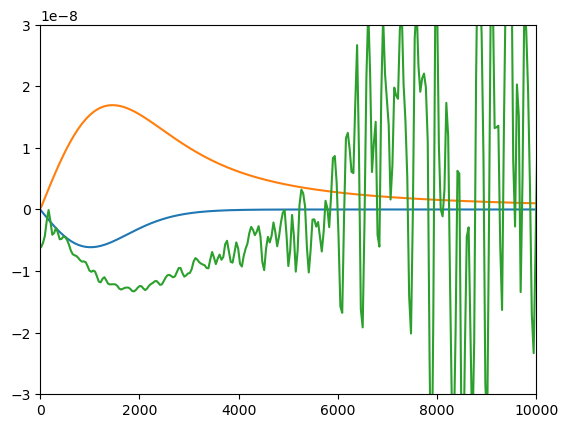

8701 726.622871269421 0.060245961934222166 1.0001271429902547
8702 726.7063815408001 0.06023240140378798 1.0001271407563914
8703 726.7898918121791 0.06019666646204671 1.000127156904351
8704 726.8734020835582 0.06017091292821636 1.0001271566698422
8705 726.9569123549373 0.06015244758785509 1.000127166137844
8706 727.0404226263164 0.060118387107146475 1.0001271734411585
8707 727.1239328976955 0.06009461330205258 1.0001271820595328
8708 727.2074431690746 0.06005424047392788 1.0001271868155002
8709 727.2909534404537 0.060021370095798 1.0001271987495979
8710 727.3744637118327 0.05999876789267288 1.0001272014609992
8711 727.4579739832118 0.059976282242046944 1.0001272103218715
8712 727.541484254591 0.0599438487852579 1.0001272131779058
8713 727.62499452597 0.05990968955449039 1.000127225697996
8714 727.7085047973491 0.05988282956581683 1.000127228510391
8715 727.7920150687281 0.05984670259670538 1.0001272409024335
8716 727.8755253401073 0.059821089278224056 1.0001272422727412
8717 727.959035

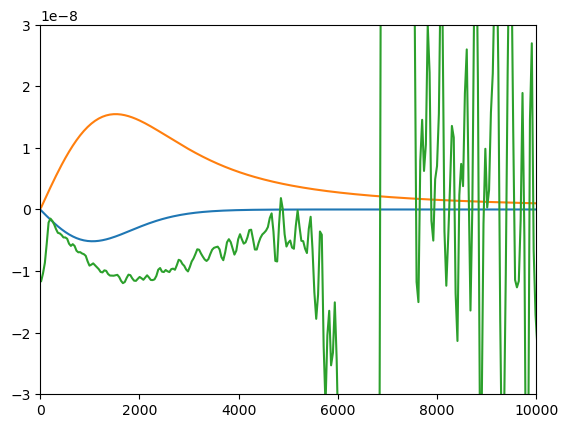

8801 734.9738984073294 0.05643999078423059 1.0001279228717772
8802 735.0574086787086 0.056396202543961424 1.0001279197590518
8803 735.1409189500877 0.05635397781619389 1.0001279246665227
8804 735.2244292214667 0.05630259303349141 1.0001279218326282
8805 735.3079394928459 0.05626939252639771 1.0001279249382653
8806 735.391449764225 0.05622574013827189 1.0001279197942692
8807 735.474960035604 0.056175129058728526 1.0001279294831587
8808 735.558470306983 0.0561471355149655 1.000127919842054
8809 735.6419805783622 0.05611369973502516 1.0001279239453849
8810 735.7254908497413 0.05606822856517365 1.0001279187928902
8811 735.8090011211203 0.05602816753351789 1.000127923211767
8812 735.8925113924994 0.055983781990057394 1.0001279187922405
8813 735.9760216638786 0.0559302609400014 1.0001279249758097
8814 736.0595319352576 0.05588993155277634 1.0001279197840367
8815 736.1430422066367 0.055859516163371474 1.0001279199293245
8816 736.2265524780158 0.055817014623215616 1.0001279167100146
8817 736.3

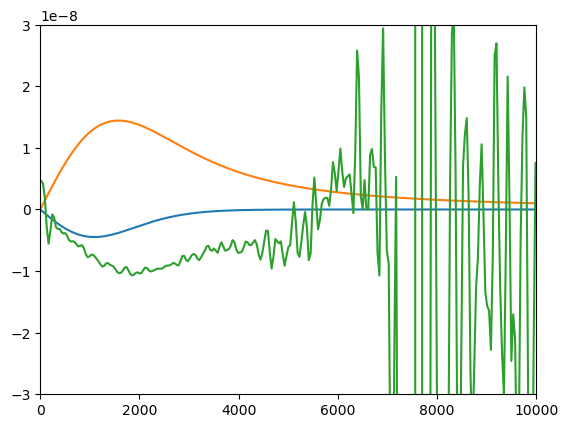

8901 743.324925545238 0.05355345795986429 1.0001275360593331
8902 743.4084358166172 0.0535462949685959 1.000127527932381
8903 743.4919460879962 0.05355420224867123 1.0001275269357446
8904 743.5754563593753 0.0535495558167935 1.0001275145553068
8905 743.6589666307543 0.053543299052475 1.0001275176263846
8906 743.7424769021335 0.05354478850756742 1.0001275045754467
8907 743.8259871735125 0.053534312191022365 1.000127508361026
8908 743.9094974448916 0.053537928084848294 1.0001274945696812
8909 743.9930077162707 0.053532149445898757 1.000127496664031
8910 744.0765179876498 0.053525213865104976 1.000127484918137
8911 744.1600282590289 0.053532247306889005 1.0001274825687994
8912 744.2435385304079 0.053532874221995305 1.0001274716942024
8913 744.3270488017871 0.05352990248430834 1.0001274716416397
8914 744.4105590731662 0.053530984115813515 1.0001274658492294
8915 744.4940693445452 0.053528385776006895 1.0001274657337638
8916 744.5775796159243 0.05351685499317444 1.0001274611710858
8917 744.

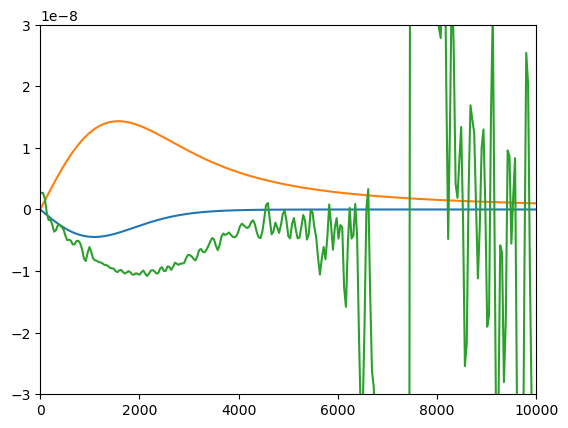

9001 751.6759526831465 0.053437353165983505 1.0001273938179474
9002 751.7594629545256 0.0534380664217528 1.0001273941712308
9003 751.8429732259048 0.05343820969855358 1.0001274031527072
9004 751.9264834972838 0.05345707421604009 1.0001274018836686
9005 752.0099937686629 0.053457423485392994 1.0001274163969205
9006 752.093504040042 0.05345309119833156 1.0001274195602199
9007 752.1770143114211 0.053465814920895895 1.000127424756264
9008 752.2605245828001 0.05347793793289514 1.0001274237945994
9009 752.3440348541792 0.05347841417924702 1.0001274372648408
9010 752.4275451255584 0.05348314276687166 1.0001274381215284
9011 752.5110553969374 0.05350527682155254 1.000127445993131
9012 752.5945656683165 0.053514549412498745 1.0001274480673676
9013 752.6780759396955 0.05352199065800016 1.000127458157611
9014 752.7615862110747 0.053545606650807064 1.0001274561698075
9015 752.8450964824538 0.05354952488521423 1.0001274687362454
9016 752.9286067538328 0.05355750870840359 1.000127470006343
9017 753.

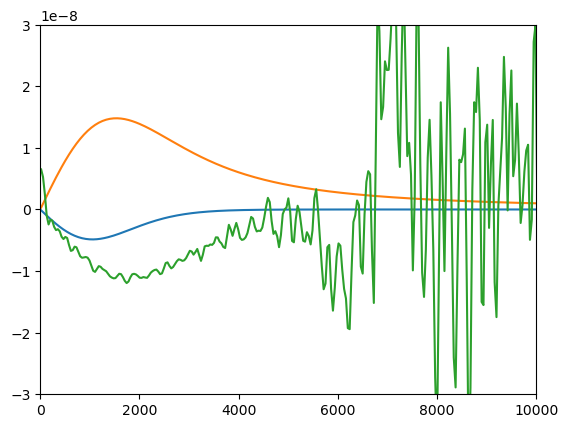

9101 760.0269798210551 0.05507718422522137 1.0001276472180995
9102 760.1104900924341 0.05508768263614472 1.0001276441917057
9103 760.1940003638133 0.055101792218566224 1.000127642381797
9104 760.2775106351924 0.05511518978165451 1.0001276384371571
9105 760.3610209065714 0.05512271308850538 1.0001276386693054
9106 760.4445311779505 0.05512599059124547 1.0001276342994097
9107 760.5280414493296 0.05512849973176519 1.000127636656796
9108 760.6115517207087 0.055141557242017906 1.0001276301760436
9109 760.6950619920877 0.05515900079801156 1.0001276306124744
9110 760.7785722634668 0.055157929203284 1.00012762268818
9111 760.862082534846 0.05515313726024655 1.000127626303169
9112 760.945592806225 0.05516471044253937 1.000127618061393
9113 761.0291030776041 0.05517867802484189 1.0001276211666557
9114 761.1126133489831 0.055181953460166695 1.000127613134619
9115 761.1961236203623 0.05518900821679903 1.00012761470375
9116 761.2796338917414 0.0552078399009984 1.0001276063266398
9117 761.3631441631

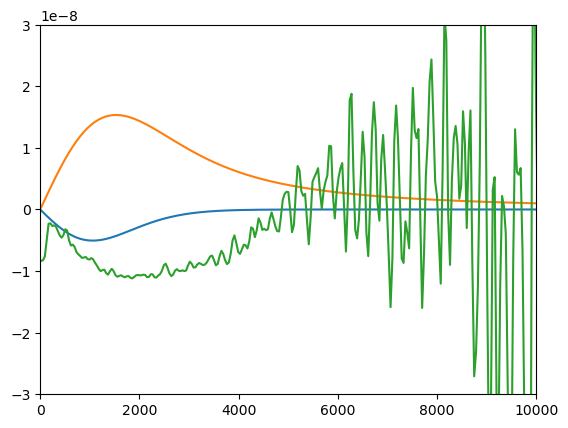

9201 768.3780069589636 0.05606825420455377 1.0001275210194556
9202 768.4615172303427 0.05608408851911583 1.0001275245089392
9203 768.5450275017217 0.05610026615128261 1.0001275250639297
9204 768.6285377731009 0.05611213952841833 1.000127528146198
9205 768.71204804448 0.056135589555398664 1.0001275294365777
9206 768.795558315859 0.05615903445340052 1.0001275306707764
9207 768.8790685872381 0.05617561657323914 1.0001275336919273
9208 768.9625788586172 0.05618435072174465 1.0001275336010278
9209 769.0460891299963 0.05618488006247382 1.0001275401610208
9210 769.1295994013753 0.056202351376819656 1.0001275359492612
9211 769.2131096727545 0.05622823938121278 1.000127541291574
9212 769.2966199441336 0.05624448630977095 1.0001275415258364
9213 769.3801302155126 0.05626074925887221 1.0001275477055784
9214 769.4636404868917 0.05627316628637762 1.0001275460776862
9215 769.5471507582708 0.05628780055840073 1.0001275535477843
9216 769.6306610296499 0.056306523832092566 1.0001275511992007
9217 769.7

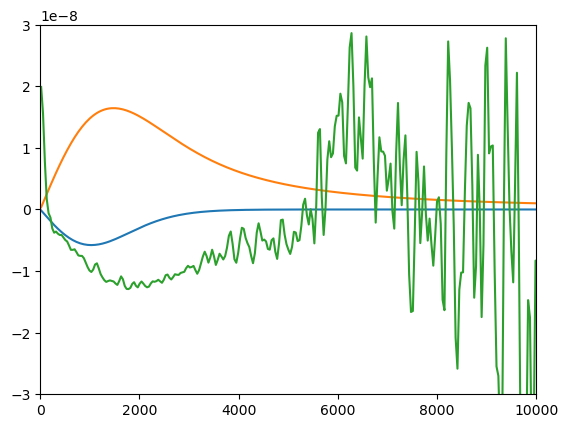

9301 776.7290340968722 0.059027149527096916 1.0001276136374146
9302 776.8125443682512 0.05906936475327456 1.0001276173293043
9303 776.8960546396303 0.0591057664723314 1.0001276152530878
9304 776.9795649110093 0.059162865510782064 1.0001276123353142
9305 777.0630751823885 0.0592032679972959 1.0001276105269545
9306 777.1465854537676 0.059242245187197444 1.000127610025274
9307 777.2300957251466 0.059288262534939976 1.0001276074937506
9308 777.3136059965258 0.059332598789587125 1.000127608056091
9309 777.3971162679048 0.05937589314312581 1.0001276047065881
9310 777.4806265392839 0.05940342002342105 1.0001276065791729
9311 777.564136810663 0.0594454201986294 1.0001276058134878
9312 777.6476470820421 0.05950639374236322 1.0001275993304208
9313 777.7311573534212 0.05954351372666268 1.0001276012429472
9314 777.8146676248002 0.05957646308263575 1.0001275973913666
9315 777.8981778961793 0.0596183289050663 1.0001275971550336
9316 777.9816881675584 0.059659893638310285 1.0001275914999894
9317 778.

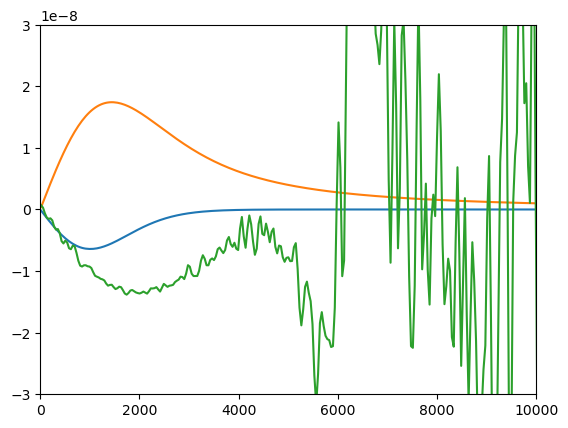

9401 785.0800612347807 0.06134586000327814 1.0001276190893131
9402 785.1635715061598 0.06134456036872069 1.0001276286318206
9403 785.2470817775388 0.0613509676433732 1.0001276228453493
9404 785.3305920489179 0.06134819567062916 1.000127632690719
9405 785.414102320297 0.06134405316294345 1.0001276303752222
9406 785.4976125916761 0.061351342957466054 1.0001276363531704
9407 785.5811228630552 0.061358564678060466 1.0001276318462538
9408 785.6646331344342 0.061356595446407355 1.0001276377611585
9409 785.7481434058134 0.06134840980609869 1.000127638792271
9410 785.8316536771924 0.061350494606667944 1.0001276433596873
9411 785.9151639485715 0.06134756601144442 1.0001276441712303
9412 785.9986742199505 0.061345666887601444 1.0001276487313155
9413 786.0821844913297 0.06135088467330525 1.0001276485100574
9414 786.1656947627088 0.061342200280544636 1.0001276538926225
9415 786.2492050340878 0.061339691068320754 1.0001276564991808
9416 786.332715305467 0.061342497775076554 1.0001276563627437
9417 

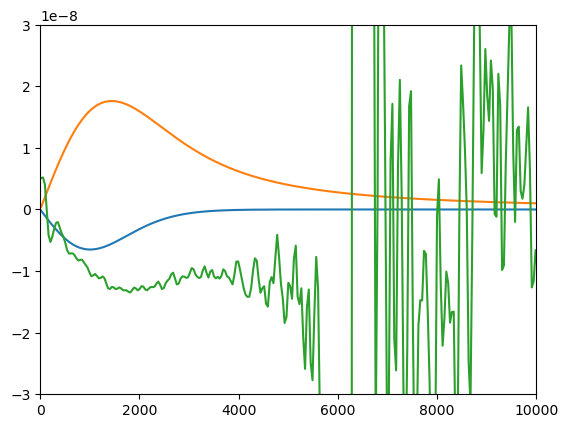

9501 793.4310883726891 0.06176412291387513 1.0001277561986497
9502 793.5145986440683 0.061762439374118655 1.0001277625460538
9503 793.5981089154474 0.0617640171181234 1.000127756301709
9504 793.6816191868264 0.06177900507426984 1.0001277575863998
9505 793.7651294582055 0.06177048072942953 1.0001277532713588
9506 793.8486397295846 0.061765658683084035 1.0001277572375178
9507 793.9321500009637 0.06175931914186988 1.000127750847656
9508 794.0156602723428 0.06174943544533326 1.0001277572489822
9509 794.0991705437219 0.061744450886289395 1.0001277510539401
9510 794.182680815101 0.06173476808634733 1.000127755426078
9511 794.26619108648 0.061722070499162666 1.0001277510009634
9512 794.3497013578591 0.06171291812745507 1.000127754074182
9513 794.4332116292383 0.061718706818199735 1.000127748027771
9514 794.5167219006173 0.06171111494191285 1.0001277484696265
9515 794.6002321719964 0.06169885477277563 1.000127748493948
9516 794.6837424433754 0.06169720084191136 1.000127743506925
9517 794.76725

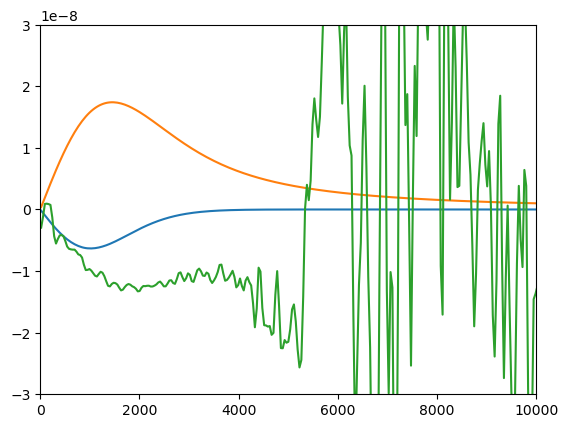

9601 801.7821155105977 0.06113877551990384 1.0001276636181233
9602 801.8656257819767 0.06113669550319973 1.0001276682083795
9603 801.9491360533559 0.06112652170267217 1.0001276666233196
9604 802.032646324735 0.061118465728083916 1.0001276715990814
9605 802.116156596114 0.061108024696383684 1.000127666699785
9606 802.1996668674932 0.06108782011676464 1.000127676343702
9607 802.2831771388722 0.061096083727528006 1.0001276693587868
9608 802.3666874102513 0.06110296762617122 1.0001276722982477
9609 802.4501976816304 0.061086331025224046 1.000127671270665
9610 802.5337079530095 0.06107137591438087 1.000127676581169
9611 802.6172182243886 0.06105542767973465 1.0001276764371114
9612 802.7007284957676 0.06104252195819307 1.0001276806910706
9613 802.7842387671467 0.06103923644608559 1.000127678642348
9614 802.8677490385259 0.0610349874906169 1.00012768059821
9615 802.9512593099049 0.06103044676858699 1.0001276806052393
9616 803.034769581284 0.06102664467081854 1.0001276801634205
9617 803.118279

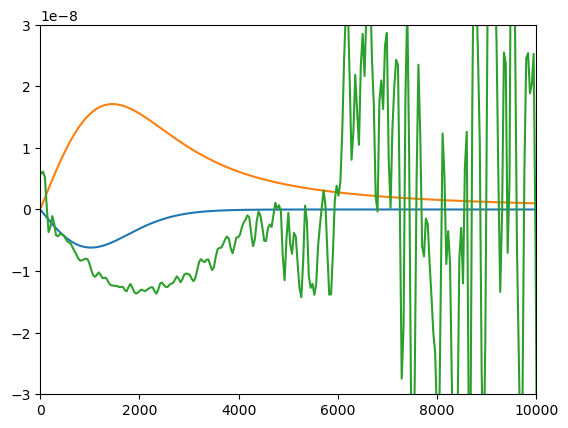

9701 810.1331426485062 0.060533369923644616 1.0001277825929744
9702 810.2166529198853 0.060520605518796504 1.0001277887389908
9703 810.3001631912645 0.06051525906951741 1.000127787323267
9704 810.3836734626435 0.060509660452684945 1.000127792353809
9705 810.4671837340226 0.06050801973567152 1.0001277917951892
9706 810.5506940054016 0.060512460206184095 1.0001277929809371
9707 810.6342042767808 0.060500664506541645 1.0001277959728987
9708 810.7177145481598 0.060500564454571026 1.0001277979921628
9709 810.8012248195389 0.06050510836714423 1.000127796634854
9710 810.884735090918 0.06050371224881691 1.0001277993093423
9711 810.9682453622971 0.06048780963882047 1.0001278016556798
9712 811.0517556336762 0.060490249148846244 1.0001278047649762
9713 811.1352659050552 0.06050336838610913 1.000127799810247
9714 811.2187761764344 0.06049207061942931 1.000127808297901
9715 811.3022864478135 0.06049624973721333 1.0001278055874812
9716 811.3857967191925 0.06049987495073672 1.0001278085900793
9717 81

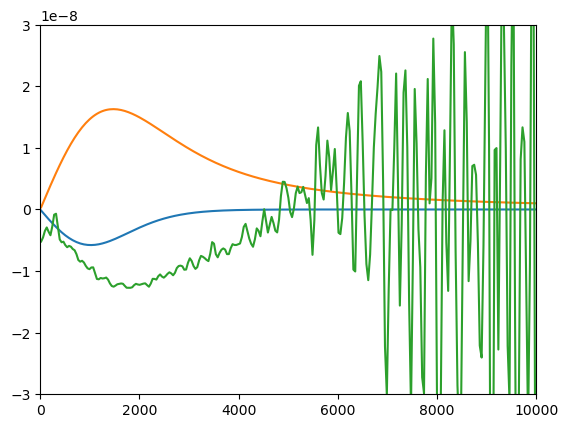

9801 818.4841697864148 0.05880676082671768 1.0001279233907285
9802 818.5676800577938 0.05875463508481345 1.000127925253838
9803 818.6511903291729 0.05871947386294725 1.0001279212575158
9804 818.7347006005521 0.058667948229615054 1.0001279214291263
9805 818.8182108719311 0.05860870436924507 1.000127922125052
9806 818.9017211433102 0.05856264007236924 1.0001279192050772
9807 818.9852314146893 0.05850972100142888 1.0001279186013912
9808 819.0687416860684 0.0584601109041646 1.0001279177894042
9809 819.1522519574474 0.05841666775031358 1.0001279132240146
9810 819.2357622288265 0.05836808054201834 1.0001279130865515
9811 819.3192725002057 0.05831705991362546 1.0001279094580298
9812 819.4027827715847 0.058259853515501864 1.0001279096401454
9813 819.4862930429638 0.058210584537062696 1.0001279047573517
9814 819.5698033143428 0.05816732010445022 1.0001279030569983
9815 819.653313585722 0.058116797618839276 1.0001278985652706
9816 819.7368238571011 0.05806285048926328 1.0001278979392179
9817 819

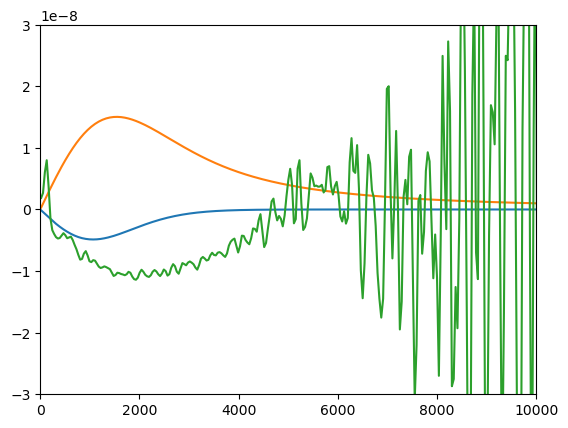

9901 826.8351969243233 0.05526562154689129 1.0001274325322962
9902 826.9187071957024 0.05526252985695075 1.0001274250752072
9903 827.0022174670814 0.055237816846339244 1.0001274230940471
9904 827.0857277384606 0.05521647471355948 1.0001274199170063
9905 827.1692380098397 0.05520926036909363 1.0001274175461026
9906 827.2527482812187 0.05521069628803604 1.0001274105087412
9907 827.3362585525978 0.05519810818769397 1.0001274071363722
9908 827.4197688239769 0.05517500623857858 1.000127407903863
9909 827.503279095356 0.05516483858738617 1.0001274046943012
9910 827.586789366735 0.05515299247538778 1.000127404943891
9911 827.6702996381141 0.055135025445149 1.0001274037099679
9912 827.7538099094933 0.05511707012541801 1.0001274009396997
9913 827.8373201808723 0.055111816371961934 1.000127396695736
9914 827.9208304522514 0.05510311102859098 1.0001273938670336
9915 828.0043407236305 0.0550771540694906 1.0001273932789068
9916 828.0878509950096 0.05506126202031269 1.0001273933792731
9917 828.17136

In [7]:
setupT()
setupQ()
setupV2Grav()
setupU1U2()

#Record
hello = []
hello2 = []
gravitationalForce = []
pressureGradient = []
quantumPressure = []

ts = []
oldGM = GM
newGM = GM*1.2
for t in range(bigT):
    #Pertubation
    if(t*dt<6.0):
        GM = newGM
    if(t*dt>=6.0):
        GM = oldGM

    setupT()
    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    normalization = scipy.integrate.simpson(4.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x=x)
    #if(normalization >= 1.01):
    #    break
    print(t, t*dt, np.absolute(psi[0]), normalization)
    if(GM == oldGM):

        #Record
        rho0 = (np.absolute(psi[14])*np.absolute(psi[14]))/Ra/Ra/Ra*totalMass
        rho1 = (np.absolute(psi[15])*np.absolute(psi[15]))/Ra/Ra/Ra*totalMass
        rho2 = (np.absolute(psi[16])*np.absolute(psi[16]))/Ra/Ra/Ra*totalMass
        rho3 = (np.absolute(psi[17])*np.absolute(psi[17]))/Ra/Ra/Ra*totalMass
        Q0 = -((np.sqrt(rho0) -2*np.sqrt(rho1) + np.sqrt(rho2))/(dx*Ra)/(dx*Ra) + 2.0/(x[15]*Ra)*(np.sqrt(rho1)-np.sqrt(rho0))/(dx*Ra))/np.sqrt(rho1)/2.0/m
        Q1 = -((np.sqrt(rho1) -2*np.sqrt(rho2) + np.sqrt(rho3))/(dx*Ra)/(dx*Ra) + 2.0/(x[16]*Ra)*(np.sqrt(rho2)-np.sqrt(rho1))/(dx*Ra))/np.sqrt(rho2)/2.0/m

        gravitationalForce.append((phi[16]-phi[15])/dx)
        pressureGradient.append(4.0*np.pi*a/m/m/m*(rho2-rho1)/(dx*Ra)/Ra/omegaA/omegaA)
        quantumPressure.append((Q1-Q0)/m/(dx*Ra)/Ra/omegaA/omegaA)

        def findMass():
            for i in range(size):
                if(i != 0):
                    temp = scipy.integrate.simpson(4.0*np.pi*x[:i]*x[:i]*np.absolute(psi[:i])*np.absolute(psi[:i]), x=x[:i])
                    if(temp > 0.99):
                        return i
            return size-1
            
        hello2.append(findMass())

        hello.append(np.absolute(psi[0])*np.absolute(psi[0]))
        ts.append(t*dt)

    if t%100 == 0:
        hBarInCU = 1.1977151493389159e-76
        setupV2Grav()
        np.set_printoptions(threshold=np.inf)

        rhoTemp = np.absolute(psi)*np.absolute(psi)/Ra/Ra/Ra*totalMass*5.1550e96*0.001*1.619e-18
        pressure = 2.0*np.pi*aInCU*hBarInCU*hBarInCU/massInCU/massInCU/massInCU*rhoTemp*rhoTemp
        pressureGradients = np.gradient(pressure, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        gravitationalPotential = phi*Ra*Ra*omegaA*omegaA*1.616e-35*100*6.77193e-6*1.616e-35*100*6.77193e-6/5.391e-44/5.391e-44/2.03017e5/2.03017e5

        dRhodx = np.gradient(np.sqrt(rhoTemp), x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        d2Rhodx = np.gradient(dRhodx, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2)
        quantumPotential = -hBarCU*hBarCU/2.0/massInCU*(d2Rhodx + 2.0/(x*Ra*1.616e-35*100*6.77193e-6)*dRhodx)/np.sqrt(rhoTemp)

        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, pressureGradients/rhoTemp)
        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, np.gradient(gravitationalPotential, x*Ra*1.616e-35*100*6.77193e-6, edge_order=2))
        plt.plot(x*Ra*1.616e-35*100*6.77193e-6, np.gradient(quantumPotential, x*Ra*1.616e-35*100*6.77193e-6)/massInCU)

        plt.xlim(0.0,10000.0)
        plt.ylim(-3e-8,3e-8)
        #print(np.gradient(quantumPotential[100:1500], x[100:1500]*Ra*1.616e-35*100*6.77193e-6)/massInCU)
        #print(x[100]*Ra*1.616e-35*100*6.77193e-6)
        plt.show()

        #plt.plot(x, np.absolute(psi)*np.absolute(psi))

#plt.xlabel(r"$r$ (dimensionless)")
#plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
#plt.show()

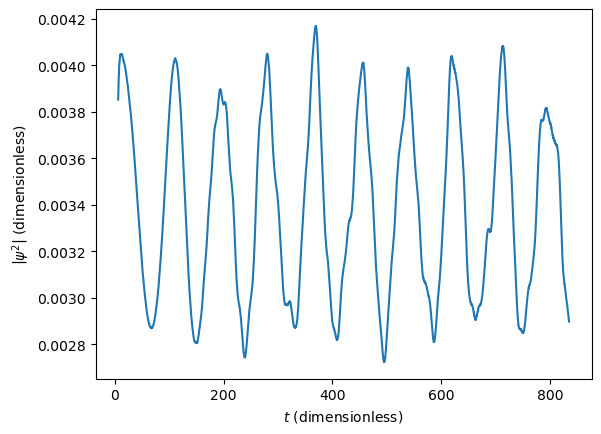

In [8]:
plt.plot(ts, hello)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

Text(0.5, 0, 'f (1/s)')

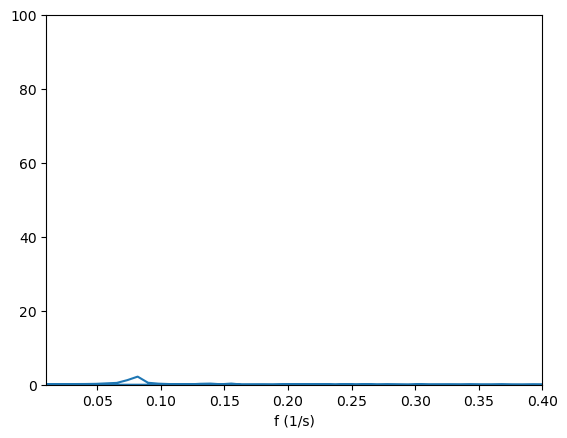

In [9]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100.0)
plt.xlabel("f (1/s)")

In [10]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 0.04 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.008179572925060436
0.08179572925060435 2.191261854457998
0.1390527397260274 0.30609446380331884
0.15541188557614827 0.31141482517654684
0.17177103142626915 0.06982463144568639
0.20448932312651089 0.16149175501938995
0.22902804190169218 0.14003282427210675
0.245387187751813 0.1469447258380427
0.26174633360193394 0.13292301733845513
0.2781054794520548 0.08432525232264731
0.3026441982272361 0.11566016608466495
0.3190033440773569 0.0701294844211928
0.3435420628525383 0.07932586930413753
0.36808078162771957 0.07956119054323253
0.3926195004029009 0.05467529333028817
0.4253377921031426 0.060802342206967105
0.4498765108783239 0.05358664342707498
0.4825948025785657 0.058233317932970395
0.5153130942788074 0.045304845357442114
0.5480313859790491 0.04256141065690803
0.580749677679291 0.04509763160122986


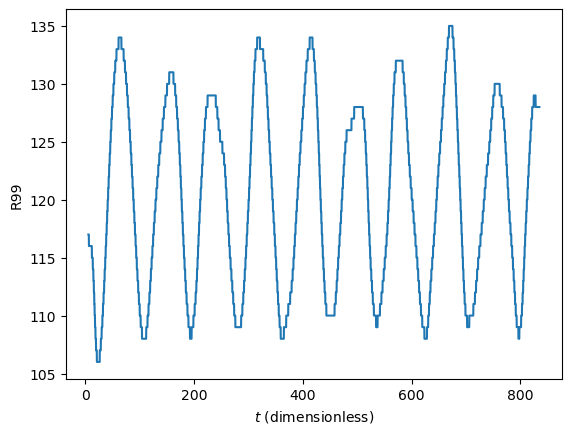

In [11]:
plt.plot(ts, hello2)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"R99")
plt.show()

Text(0.5, 0, 'f (1/s)')

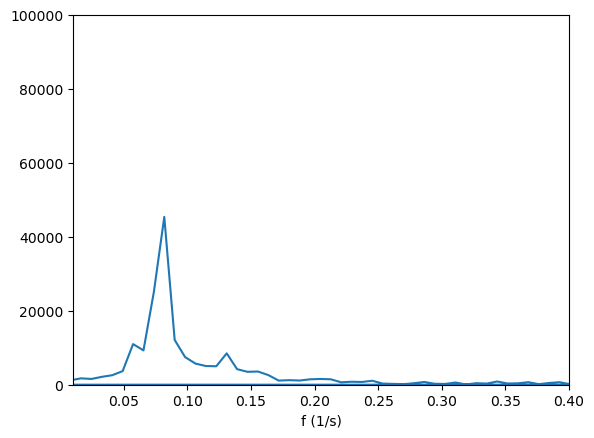

In [12]:
sp = np.fft.fft(hello2)
freq = np.fft.fftfreq(len(hello2), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,100000)
plt.xlabel("f (1/s)")

In [13]:
print(freq[1]-freq[0])
for i in range(len(freq)-1):
    if(freq[i] > 0.0 and np.absolute(sp[i]) > 5000 and np.absolute(sp[i])>np.absolute(sp[i+1]) and np.absolute(sp[i])>np.absolute(sp[i-1])):
        print(freq[i], np.absolute(sp[i]))

0.008179572925060436
0.057257010475423045 10992.61348357588
0.08179572925060435 45408.29188987055
0.13087316680096697 8488.562425843458


[5.38208750e-02 5.37893592e-02 5.37268549e-02 5.36343414e-02
 5.35117909e-02 5.33589803e-02 5.31760778e-02 5.29636018e-02
 5.27218663e-02 5.24511620e-02 5.21519079e-02 5.18246046e-02
 5.14700018e-02 5.10890668e-02 5.06826997e-02 5.02515492e-02
 4.97964486e-02 4.93183200e-02 4.88180286e-02 4.82964379e-02
 4.77544747e-02 4.71931770e-02 4.66136803e-02 4.60171908e-02
 4.54045830e-02 4.47767734e-02 4.41348427e-02 4.34799104e-02
 4.28129156e-02 4.21349294e-02 4.14471996e-02 4.07508158e-02
 4.00468004e-02 3.93360615e-02 3.86196533e-02 3.78985733e-02
 3.71738747e-02 3.64464065e-02 3.57171058e-02 3.49869689e-02
 3.42569123e-02 3.35277792e-02 3.28003113e-02 3.20752879e-02
 3.13533155e-02 3.06352198e-02 2.99217489e-02 2.92136795e-02
 2.85115459e-02 2.78158666e-02 2.71271677e-02 2.64460541e-02
 2.57731033e-02 2.51086458e-02 2.44531294e-02 2.38068960e-02
 2.31703057e-02 2.25435178e-02 2.19269117e-02 2.13207839e-02
 2.07254131e-02 2.01409777e-02 1.95675927e-02 1.90053951e-02
 1.84544537e-02 1.791487

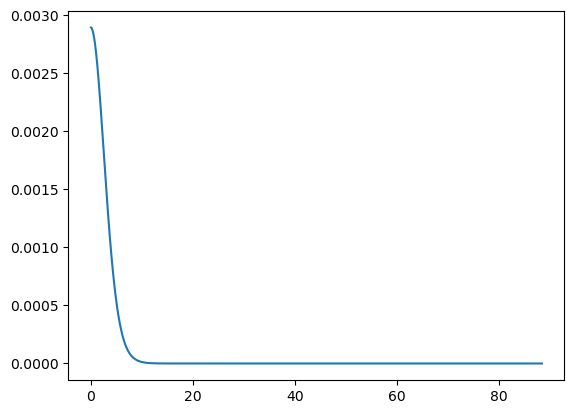

In [14]:
plt.plot(x, np.absolute(psi)*np.absolute(psi))
print(np.absolute(psi))

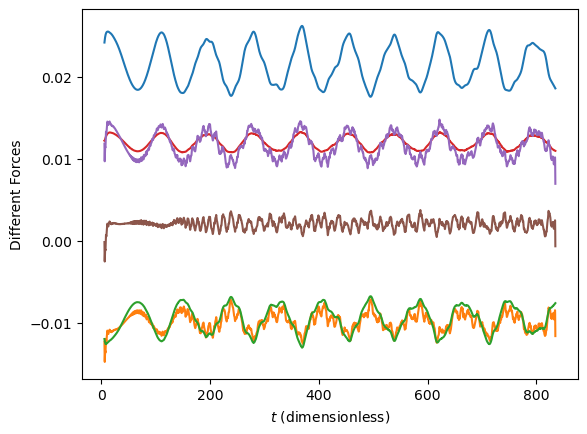

In [24]:
sp = np.fft.fft(quantumPressure)
freq = np.fft.fftfreq(len(quantumPressure), d=dt)*omegaA/5.391247e-44

for i in range(len(freq)):
    if(freq[i]<=-5.0 or freq[i]>=5.0):
        sp[i] = 0.0

quantumPressure = np.fft.ifft(sp)

plt.plot(ts, gravitationalForce)
plt.plot(ts, quantumPressure)
plt.plot(ts, pressureGradient)
plt.plot(ts, np.array(gravitationalForce)+np.array(pressureGradient))
plt.plot(ts, np.array(gravitationalForce)+np.array(quantumPressure))
plt.plot(ts, np.array(gravitationalForce)+np.array(quantumPressure)+np.array(pressureGradient))
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"Different Forces")
plt.show()

Middle
0.071-0.081			M1 (M2: 0.142-0.162, M3: 0.213-0.243, M4: 0.284-0.324, M5: 0.355-0.405)
0.132-0.137			M1?
0.158-0.163			M2
0.193-0.204			M1?
0.239-0.249			M3
0.295-0.305			M4
0.361-0.371			M5

0.076-0.086			M1
0.132-0.142			M1?
0.158-0.168			M2

Small
0.097-0.107		M1
0.163-0.173		M1?
0.214-0.224		M2
0.270-0.280		M1?
0.341-0.351		M3
0.432-0.443		M4
0.534-0.544		M5
0.651-0.661		M6

Heavy
0.031-0.037		M1
0.058-0.065		M2
0.072-0.078		M?
0.082-0.089		M?
0.099-0.167 	M3
0.116-0.123		M4
0.140-0.147		M5
0.167-0.173		M6?
0.194-0.201 	M7?